# Telecom_Churn_Prediction_Machine Learning 2_Case Study 

## Problem Statement

## Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Understanding the business objective and the data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Understanding customer behaviour during churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

## Approach

1. Importing Required Packages
2. Reading & Understanding Data
3. Data Cleaning
4. Data Analysis - EDA
5. Data Preparation
6. Model Building -  1. Apply PCA & Predict Churn with 3 models, 2. Logistic or Tree Model to predict Important Features
7. Data Evaluation
8. Recommendations

## 1. Importing Required Packages

In [1]:
# Importing necessary packages required for the assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing warnings to supress warnings
import warnings
warnings.filterwarnings('ignore')

#importing necesasry liraries for PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Importing necessary pacakges for Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Configuring set_option to view all the rows & columns in the dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## 2. Reading & Understanding Data

In [2]:
# Reading the telecom_churn_data.csv into telecom_data dataframe
telecom_data = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Let's chek the head of the telecom_data
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
# Let's chek the tail of the telecom_data
telecom_data.tail()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
99994            8/31/2014            9/30/2014   18.471   69.161   57.530   
99995            8/31/2014            9/30/2014  112.201   77.811   79.081   
99996            8/31/2014            9/30/2014  229.187    0.000    0.000   
99997            8/31/2014            9/30/2014  322.991  303.386  606.817   
99998            8/31/2014            9/30/2014  687.065    0.000    0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
99994   29.950         5.40         3.36         5.91         0.00   
99995  140.835        29.26        18.13        16.06        49.49   
99996    0.000         1.11          NaN          NaN          NaN   
99997  731.010         0.00         0.00         0.00         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
99994         15.19         54.46         52.79         27.14            0.0   
99995        100.83         69.01         66.39         56.13            0.0   
99996         21.04           NaN           NaN           NaN            0.0   
99997          0.00          0.00          0.00          0.00            0.0   
99998        166.46           NaN           NaN           NaN            0.0   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
99994            0.0            0.0           0.00            0.0   
99995            0.0            0.0           0.95            0.0   
99996            NaN            NaN            NaN            0.0   
99997            0.0            0.0           0.00            0.0   
99998            NaN            NaN            NaN            0.0   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
99994            0.0            0.0           0.00              5.40   
99995            0.0            0.0           4.23             28.93   
99996            NaN            NaN            NaN              1.11   
99997            0.0            0.0           0.00              0.00   
99998            NaN            NaN            NaN             84.34   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
99994              3.36              5.91              0.00             12.78   
99995             18.13             16.06             49.49             91.34   
99996               NaN               NaN               NaN             13.33   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN            166.46   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
99994             54.46             49.58             24.78              0.00   
99995             47.53             57.51             46.71              1.71   
99996               NaN               NaN               NaN              0.00   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN              0.00   

       l

In [5]:
# Let's check the shape of the telecom_data
telecom_data.shape

(99999, 226)

In [6]:
# Let's check the columns names of the telecom_data
telecom_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [7]:
# Let's check the number of rows, columns, datatypes not_null_counts of the telecom_data
telecom_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [8]:
# Let's check the statistical summary of the telecom_data
telecom_data.describe().T

count          mean            std           min  \
mobile_number       99999.0  7.001207e+09  695669.386290  7.000000e+09   
circle_id           99999.0  1.090000e+02       0.000000  1.090000e+02   
loc_og_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
std_og_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
loc_ic_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
arpu_6              99999.0  2.829874e+02     328.439770 -2.258709e+03   
arpu_7              99999.0  2.785366e+02     338.156291 -2.014045e+03   
arpu_8              99999.0  2.791547e+02     344.474791 -9.458080e+02   
arpu_9              99999.0  2.616451e+02     341.998630 -1.899505e+03   
onnet_mou_6         96062.0  1.323959e+02     297.207406  0.000000e+00   
onnet_mou_7         96140.0  1.336708e+02     308.794148  0.000000e+00   
onnet_mou_8         94621.0  1.330181e+02     308.951589  0.000000e+00   
onnet_mou_9         92254.0  1.303023e+02     308.477668  0.000000e+00   
offnet_mou_6        96062.0  1.979356e+02     316.851613  0.000000e+00   
offnet_mou_7        96140.0  1.970451e+02     325.862803  0.000000e+00   
offnet_mou_8        94621.0  1.965748e+02     327.170662  0.000000e+00   
offnet_mou_9        92254.0  1.903372e+02     319.396092  0.000000e+00   
roam_ic_mou_6       96062.0  9.950013e+00      72.825411  0.000000e+00   
roam_ic_mou_7       96140.0  7.149898e+00      73.447948  0.000000e+00   
roam_ic_mou_8       94621.0  7.292981e+00      68.402466  0.000000e+00   
roam_ic_mou_9       92254.0  6.343841e+00      57.137537  0.000000e+00   
roam_og_mou_6       96062.0  1.391134e+01      71.443196  0.000000e+00   
roam_og_mou_7       96140.0  9.818732e+00      58.455762  0.000000e+00   
roam_og_mou_8       94621.0  9.971890e+00      64.713221  0.000000e+00   
roam_og_mou_9       92254.0  8.555519e+00      58.438186  0.000000e+00   
loc_og_t2t_mou_6    96062.0  4.710076e+01     150.856393  0.000000e+00   
loc_og_t2t_mou_7    96140.0  4.647301e+01     155.318705  0.000000e+00   
loc_og_t2t_mou_8    94621.0  4.588781e+01     151.184830  0.000000e+00   
loc_og_t2t_mou_9    92254.0  4.458445e+01     147.995390  0.000000e+00   
loc_og_t2m_mou_6    96062.0  9.334209e+01     162.780544  0.000000e+00   
loc_og_t2m_mou_7    96140.0  9.139713e+01     157.492308  0.000000e+00   
loc_og_t2m_mou_8    94621.0  9.175513e+01     156.537048  0.000000e+00   
loc_og_t2m_mou_9    92254.0  9.046319e+01     158.681454  0.000000e+00   
loc_og_t2f_mou_6    96062.0  3.751013e+00      14.230438  0.000000e+00   
loc_og_t2f_mou_7    96140.0  3.792985e+00      14.264986  0.000000e+00   
loc_og_t2f_mou_8    94621.0  3.677991e+00      13.270996  0.000000e+00   
loc_og_t2f_mou_9    92254.0  3.655123e+00      13.457549  0.000000e+00   
loc_og_t2c_mou_6    96062.0  1.123056e+00       5.448946  0.000000e+00   
loc_og_t2c_mou_7    96140.0  1.368500e+00       7.533445  0.000000e+00   
loc_og_t2c_mou_8    94621.0  1.433821e+00       6.783335  0.000000e+00   
loc_og_t2c_mou_9    92254.0  1.232726e+00       5.619021  0.000000e+00   
loc_og_mou_6        96062.0  1.442012e+02     251.751489  0.000000e+00   
loc_og_mou_7        96140.0  1.416705e+02     248.731086  0.000000e+00   
loc_og_mou_8        94621.0  1.413282e+02     245.914311  0.000000e+00   
loc_og_mou_9        92254.0  1.387100e+02     245.934517  0.000000e+00   
std_og_t2t_mou_6    96062.0  7.982987e+01     252.476533  0.000000e+00   
std_og_t2t_mou_7    96140.0  8.329960e+01     263.631042  0.000000e+00   
std_og_t2t_mou_8    94621.0  8.328267e+01     265.486090  0.000000e+00   
std_og_t2t_mou_9    92254.0  8.234292e+01     267.184991  0.000000e+00   
std_og_t2m_mou_6    96062.0  8.729962e+01     255.617850  0.000000e+00   
std_og_t2m_mou_7    96140.0  9.080414e+01     269.347911  0.000000e+00   
std_og_t2m_mou_8    94621.0  8.983839e+01     271.757783  0.000000e+00   
std_og_t2m_mou_9    92254.0  8.627662e+01     261.407396  0.000000e+00   
std_og_t2f_mou_6    96062.

#### Observations on inspecting the telecom_data
- There are many mising values variables which needs to be dropped & couple of variables to be imputed
- date related columns are in 'object' format needs to be typecasted
- Unnecesary & highly skewed columns needs to be dropped
- On inspecting data we can understand that most revenue generating variables are incoming calls, total_rechr_amnt, 2g& 3g net usage. 

## 3. Data Cleaning

### 3.1 Missing Values Handling

In [9]:
# Lets check the missing values percentages in all the variables in telecom_data
round((telecom_data.isnull().sum()/len(telecom_data.index) * 100) , 2).sort_values(ascending = False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

#### Check the Month-6, June related variables

In [10]:
# Lets understand the data related to the month of June-6 
june_6_cols = [col for col in telecom_data.columns if '_6' in col]
round((telecom_data[june_6_cols].isnull().sum()/len(telecom_data[june_6_cols].index) * 100) , 2).sort_values(ascending = False)

fb_user_6                   74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
max_rech_data_6             74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
roam_og_mou_6                3.94
std_og_t2t_mou_6             3.94
loc_ic_t2t_mou_6             3.94
og_others_6                  3.94
spl_og_mou_6                 3.94
isd_og_mou_6                 3.94
std_og_mou_6                 3.94
std_og_t2c_mou_6             3.94
std_og_t2f_mou_6             3.94
std_og_t2m_mou_6             3.94
loc_og_mou_6                 3.94
loc_og_t2t_mou_6             3.94
loc_og_t2c_mou_6             3.94
loc_og_t2f_mou_6             3.94
loc_og_t2m_mou_6             3.94
loc_ic_t2f_mou_6             3.94
onnet_mou_6                  3.94
offnet_mou_6                 3.94
roam_ic_mou_6                3.94
loc_ic_t2m_mou

In [11]:
# Let's inspect the data related to 2g & 3_g data usage
telecom_data[['fb_user_6','arpu_2g_6','arpu_3g_6','night_pck_user_6','vol_2g_mb_6','vol_3g_mb_6','total_rech_data_6','av_rech_amt_data_6']].head(30)

fb_user_6  arpu_2g_6  arpu_3g_6  night_pck_user_6  vol_2g_mb_6  \
0         1.0     212.17     212.17               0.0        30.13   
1         NaN        NaN        NaN               NaN         0.00   
2         NaN        NaN        NaN               NaN         0.00   
3         NaN        NaN        NaN               NaN         0.00   
4         0.0       0.00       0.00               0.0         0.00   
5         NaN        NaN        NaN               NaN         0.00   
6         NaN        NaN        NaN               NaN         0.00   
7         NaN        NaN        NaN               NaN         0.00   
8         NaN        NaN        NaN               NaN         0.00   
9         NaN        NaN        NaN               NaN         0.00   
10        NaN        NaN        NaN               NaN         0.00   
11        NaN        NaN        NaN               NaN         0.00   
12        NaN        NaN        NaN               NaN         0.00   
13        NaN        NaN        NaN               NaN         0.00   
14        NaN        NaN        NaN               NaN         0.00   
15        NaN        NaN        NaN               NaN         0.00   
16        NaN        NaN        NaN               NaN         0.00   
17        NaN        NaN        NaN               NaN         0.00   
18        NaN        NaN        NaN               NaN         0.00   
19        1.0       3.01       0.00               0.0       514.81   
20        NaN        NaN        NaN               NaN         0.00   
21        NaN        NaN        NaN               NaN         0.00   
22        NaN        NaN        NaN               NaN         0.00   
23        NaN        NaN        NaN               NaN         0.00   
24        NaN        NaN        NaN               NaN         0.00   
25        NaN        NaN        NaN               NaN         0.00   
26        NaN        NaN        NaN               NaN         0.00   
27        NaN        NaN        NaN               NaN         0.00   
28        NaN        NaN        NaN               NaN         0.00   
29        NaN        NaN        NaN               NaN         0.00   

    vol_3g_mb_6  total_rech_data_6  av_rech_amt_data_6  
0         83.57                1.0               252.0  
1          0.00                NaN                 NaN  
2          0.00                NaN                 NaN  
3          0.00                NaN                 NaN  
4          0.00                1.0                56.0  
5          0.00                NaN                 NaN  
6          0.00                NaN                 NaN  
7          0.00                NaN                 NaN  
8          0.00                NaN                 NaN  
9          0.00                NaN                 NaN  
10         0.00                NaN                 NaN  
11         0.00                NaN                 NaN  
12         0.00                NaN                 NaN  
13         0.00                NaN                 NaN  
14         0.00                NaN                 NaN  
15         0.00                NaN                 NaN  
16         0.00                NaN                 NaN  
17         0.00                NaN                 NaN  
18         0.00                NaN                 NaN  
19         0.00                1.0               154.0  
20         0.00                NaN                 NaN  
21         0.00                NaN                 NaN  
22         0.00                NaN                 NaN  
23         0.00                NaN                 NaN  
24         0.00                NaN                 NaN  
25         0.00                NaN                 NaN  
26         0.00                NaN                 NaN  
27         0.00                NaN                 NaN  
28         0.00                NaN                 NaN  
29         0.00                NaN                 NaN

Since the 'total_rech_data_6' & 'av_rech_amt_data_6' are correctly mapped as per the count & volume of 2g & 3g variables, we can impute all missing values with 0

In [12]:
# Lets impute the nan of 'total_rech_data_6' & 'av_rech_amt_data_6' with zero 
telecom_data['total_rech_data_6'].fillna(0, inplace = True)
telecom_data['av_rech_amt_data_6'].fillna(0, inplace = True)
telecom_data['arpu_2g_6'].fillna(0, inplace = True)
telecom_data['arpu_3g_6'].fillna(0, inplace = True)

In [13]:
june_6_cols = [col for col in telecom_data.columns if '_6' in col]
round((telecom_data[june_6_cols].isnull().sum()/len(telecom_data.index)* 100), 2).sort_values(ascending = False)

fb_user_6                   74.85
night_pck_user_6            74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
max_rech_data_6             74.85
date_of_last_rech_data_6    74.85
std_og_t2m_mou_6             3.94
loc_ic_t2f_mou_6             3.94
loc_ic_t2m_mou_6             3.94
loc_ic_t2t_mou_6             3.94
og_others_6                  3.94
spl_og_mou_6                 3.94
isd_og_mou_6                 3.94
std_og_mou_6                 3.94
std_og_t2c_mou_6             3.94
std_og_t2f_mou_6             3.94
loc_og_mou_6                 3.94
std_og_t2t_mou_6             3.94
std_ic_t2t_mou_6             3.94
loc_og_t2c_mou_6             3.94
loc_og_t2f_mou_6             3.94
loc_og_t2m_mou_6             3.94
loc_og_t2t_mou_6             3.94
roam_og_mou_6                3.94
roam_ic_mou_6                3.94
offnet_mou_6                 3.94
onnet_mou_6                  3.94
loc_ic_mou_6                 3.94
std_ic_t2f_mou_6             3.94
std_ic_t2m_mou

On inspecting talktime or incoming & outgoing related varibales, we observed that there are less than 4% of the missing values so we can drop them.
- We can drop the highly missing values variables.

#### Check the Month-7, July related variables

In [14]:
# Lets understand the data related to the month of July-7
july_7_cols = [col for col in telecom_data.columns if '7' in col]
round((telecom_data[july_7_cols].isnull().sum()/len(telecom_data[july_7_cols].index) * 100) , 2).sort_values(ascending = False)

fb_user_7                   74.43
arpu_3g_7                   74.43
total_rech_data_7           74.43
max_rech_data_7             74.43
count_rech_2g_7             74.43
count_rech_3g_7             74.43
av_rech_amt_data_7          74.43
date_of_last_rech_data_7    74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
roam_og_mou_7                3.86
std_og_t2t_mou_7             3.86
loc_ic_t2t_mou_7             3.86
og_others_7                  3.86
spl_og_mou_7                 3.86
isd_og_mou_7                 3.86
std_og_mou_7                 3.86
std_og_t2c_mou_7             3.86
std_og_t2f_mou_7             3.86
std_og_t2m_mou_7             3.86
loc_og_mou_7                 3.86
loc_og_t2t_mou_7             3.86
loc_og_t2c_mou_7             3.86
loc_og_t2f_mou_7             3.86
loc_og_t2m_mou_7             3.86
loc_ic_t2f_mou_7             3.86
onnet_mou_7                  3.86
offnet_mou_7                 3.86
roam_ic_mou_7                3.86
loc_ic_t2m_mou

In [15]:
# Let's inspect the data related to 2g & 3_g data usage for the month of July
telecom_data[['fb_user_7','arpu_2g_7','arpu_3g_7','night_pck_user_7','vol_2g_mb_7','vol_3g_mb_7','total_rech_data_7','av_rech_amt_data_7']].head(30)

fb_user_7  arpu_2g_7  arpu_3g_7  night_pck_user_7  vol_2g_mb_7  \
0         1.0     212.17     212.17               0.0         1.32   
1         1.0      28.61       0.00               0.0       108.07   
2         NaN        NaN        NaN               NaN         0.00   
3         NaN        NaN        NaN               NaN         0.00   
4         NaN        NaN        NaN               NaN         0.00   
5         NaN        NaN        NaN               NaN         0.00   
6         NaN        NaN        NaN               NaN         0.00   
7         NaN        NaN        NaN               NaN         0.00   
8         1.0       0.00       0.00               0.0       356.00   
9         1.0       0.00       0.00               0.0         7.37   
10        NaN        NaN        NaN               NaN         0.00   
11        NaN        NaN        NaN               NaN         0.00   
12        NaN        NaN        NaN               NaN         0.00   
13        NaN        NaN        NaN               NaN         0.00   
14        NaN        NaN        NaN               NaN         0.00   
15        NaN        NaN        NaN               NaN         0.00   
16        NaN        NaN        NaN               NaN         0.00   
17        NaN        NaN        NaN               NaN         0.00   
18        NaN        NaN        NaN               NaN         0.00   
19        1.0      21.40       0.66               0.0       445.26   
20        NaN        NaN        NaN               NaN         0.00   
21        NaN        NaN        NaN               NaN         0.00   
22        NaN        NaN        NaN               NaN         0.00   
23        1.0     301.78     306.57               0.0         0.48   
24        NaN        NaN        NaN               NaN         0.00   
25        NaN        NaN        NaN               NaN         0.00   
26        1.0       0.00       0.00               0.0       189.75   
27        NaN        NaN        NaN               NaN         0.00   
28        NaN        NaN        NaN               NaN         0.00   
29        NaN        NaN        NaN               NaN         0.00   

    vol_3g_mb_7  total_rech_data_7  av_rech_amt_data_7  
0        150.76                1.0               252.0  
1          0.00                1.0               154.0  
2          0.00                NaN                 NaN  
3          0.00                NaN                 NaN  
4          0.00                NaN                 NaN  
5          0.00                NaN                 NaN  
6          0.00                NaN                 NaN  
7          0.00                NaN                 NaN  
8        750.95                2.0               177.0  
9          0.00                1.0               154.0  
10         0.00                NaN                 NaN  
11         0.00                NaN                 NaN  
12         0.00                NaN                 NaN  
13         0.00                NaN                 NaN  
14         0.00                NaN                 NaN  
15         0.00                NaN                 NaN  
16         0.00                NaN                 NaN  
17         0.00                NaN                 NaN  
18         0.00                NaN                 NaN  
19       212.10                1.0               154.0  
20         0.00                NaN                 NaN  
21         0.00                NaN                 NaN  
22         0.00                NaN                 NaN  
23       599.09                2.0               356.0  
24         0.00                NaN                 NaN  
25         0.00                NaN                 NaN  
26         0.00                1.0               154.0  
27         0.00                NaN                 NaN  
28         0.00                NaN                 NaN  
29         0.00                NaN                 NaN

Since the 'total_rech_data_7' & 'av_rech_amt_data_7' are correctly mapped as per the count & volume of 2g & 3g variables, we can impute all missing values with 0

In [16]:
# Lets impute the nan of 'total_rech_data_7' & 'av_rech_amt_data_7' with zero 
telecom_data['total_rech_data_7'].fillna(0, inplace = True)
telecom_data['av_rech_amt_data_7'].fillna(0, inplace = True)
telecom_data['arpu_2g_7'].fillna(0, inplace = True)
telecom_data['arpu_3g_7'].fillna(0, inplace = True)

On inspecting talktime or incoming & outgoing related varibales, we observed that there are less than 4% of the missing values so we can drop them.
- We can drop the highly missing values variables.

#### Check the Month-8, August related variables

In [17]:
# Lets understand the data related to the months of aug-8
aug_8_cols = [col for col in telecom_data.columns if '8' in col]
round((telecom_data[aug_8_cols].isnull().sum()/len(telecom_data[aug_8_cols].index) * 100) , 2).sort_values(ascending = False)

fb_user_8                   73.66
arpu_3g_8                   73.66
total_rech_data_8           73.66
max_rech_data_8             73.66
count_rech_2g_8             73.66
count_rech_3g_8             73.66
av_rech_amt_data_8          73.66
date_of_last_rech_data_8    73.66
arpu_2g_8                   73.66
night_pck_user_8            73.66
roam_og_mou_8                5.38
std_og_t2t_mou_8             5.38
loc_ic_t2t_mou_8             5.38
og_others_8                  5.38
spl_og_mou_8                 5.38
isd_og_mou_8                 5.38
std_og_mou_8                 5.38
std_og_t2c_mou_8             5.38
std_og_t2f_mou_8             5.38
std_og_t2m_mou_8             5.38
loc_og_mou_8                 5.38
loc_og_t2t_mou_8             5.38
loc_og_t2c_mou_8             5.38
loc_og_t2f_mou_8             5.38
loc_og_t2m_mou_8             5.38
loc_ic_t2f_mou_8             5.38
onnet_mou_8                  5.38
offnet_mou_8                 5.38
roam_ic_mou_8                5.38
loc_ic_t2m_mou

In [18]:
# Let's inspect the data related to 2g & 3_g data usage for the month of August
telecom_data[['fb_user_8','arpu_2g_8','arpu_3g_8','night_pck_user_8','vol_2g_mb_8','vol_3g_mb_8','total_rech_data_8','av_rech_amt_data_8']].head(30)

fb_user_8  arpu_2g_8  arpu_3g_8  night_pck_user_8  vol_2g_mb_8  \
0         1.0     212.17     212.17               0.0         5.75   
1         1.0       7.60       0.00               0.0       365.47   
2         NaN        NaN        NaN               NaN         0.00   
3         NaN        NaN        NaN               NaN         0.00   
4         NaN        NaN        NaN               NaN         0.00   
5         NaN        NaN        NaN               NaN         0.00   
6         NaN        NaN        NaN               NaN         0.00   
7         NaN        NaN        NaN               NaN         0.00   
8         1.0       0.00      19.83               0.0         0.03   
9         NaN        NaN        NaN               NaN         0.00   
10        1.0       1.83       0.00               0.0       508.14   
11        1.0       1.19       0.00               0.0         5.88   
12        NaN        NaN        NaN               NaN         0.00   
13        1.0       0.20       0.00               0.0         0.02   
14        NaN        NaN        NaN               NaN         0.00   
15        NaN        NaN        NaN               NaN         0.00   
16        NaN        NaN        NaN               NaN         0.00   
17        NaN        NaN        NaN               NaN         0.00   
18        NaN        NaN        NaN               NaN         0.00   
19        1.0      20.88       4.36               0.0       235.52   
20        NaN        NaN        NaN               NaN         0.00   
21        NaN        NaN        NaN               NaN         0.00   
22        NaN        NaN        NaN               NaN         0.00   
23        1.0     150.67     197.27               0.0         0.01   
24        NaN        NaN        NaN               NaN         0.00   
25        NaN        NaN        NaN               NaN         0.00   
26        1.0       0.01       0.00               0.0      1082.44   
27        NaN        NaN        NaN               NaN         0.00   
28        1.0      38.04      50.44               0.0         6.71   
29        NaN        NaN        NaN               NaN         0.00   

    vol_3g_mb_8  total_rech_data_8  av_rech_amt_data_8  
0        109.61                1.0               252.0  
1          0.00                2.0                50.0  
2          0.00                NaN                 NaN  
3          0.00                NaN                 NaN  
4          0.00                NaN                 NaN  
5          0.00                NaN                 NaN  
6          0.00                NaN                 NaN  
7          0.00                NaN                 NaN  
8         11.94                3.0                69.0  
9          0.00                NaN                 NaN  
10         0.00                2.0                34.0  
11         0.00                1.0               154.0  
12         0.00                NaN                 NaN  
13         0.00                3.0                69.0  
14         0.00                NaN                 NaN  
15         0.00                NaN                 NaN  
16         0.00                NaN                 NaN  
17         0.00                NaN                 NaN  
18         0.00                NaN                 NaN  
19       335.99                1.0               274.0  
20         0.00                NaN                 NaN  
21         0.00                NaN                 NaN  
22         0.00                NaN                 NaN  
23      1009.92                2.0               270.0  
24         0.00                NaN                 NaN  
25         0.00                NaN                 NaN  
26         0.00                2.0                50.0  
27         0.00                NaN                 NaN  
28       145.15                1.0                41.0  
29         0.00                NaN                 NaN

Since the 'total_rech_data_8' & 'av_rech_amt_data_8' are correctly mapped as per the count & volume of 2g & 3g variables, we can impute all missing values with 0

In [19]:
# Lets impute the nan of 'total_rech_data_8' & 'av_rech_amt_data_8' with zero 
telecom_data['total_rech_data_8'].fillna(0, inplace = True)
telecom_data['av_rech_amt_data_8'].fillna(0, inplace = True)
telecom_data['arpu_2g_8'].fillna(0, inplace = True)
telecom_data['arpu_3g_8'].fillna(0, inplace = True)

On inspecting talktime or incoming & outgoing related varibales, we observed that there are less than 4% of the missing values so we can drop them.
- We can drop the highly missing values variables.

#### Check the Month-9, September related variables

In [20]:
# Lets understand the data related to the month of Sep-9
sep_9_cols = [col for col in telecom_data.columns if '9' in col]
round((telecom_data[sep_9_cols].isnull().sum()/len(telecom_data[sep_9_cols].index) * 100) , 2).sort_values(ascending = False)

fb_user_9                   74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
count_rech_2g_9             74.08
count_rech_3g_9             74.08
av_rech_amt_data_9          74.08
date_of_last_rech_data_9    74.08
arpu_2g_9                   74.08
night_pck_user_9            74.08
roam_og_mou_9                7.75
std_og_t2t_mou_9             7.75
loc_ic_t2t_mou_9             7.75
og_others_9                  7.75
spl_og_mou_9                 7.75
isd_og_mou_9                 7.75
std_og_mou_9                 7.75
std_og_t2c_mou_9             7.75
std_og_t2f_mou_9             7.75
std_og_t2m_mou_9             7.75
loc_og_mou_9                 7.75
loc_og_t2t_mou_9             7.75
loc_og_t2c_mou_9             7.75
loc_og_t2f_mou_9             7.75
loc_og_t2m_mou_9             7.75
loc_ic_t2f_mou_9             7.75
onnet_mou_9                  7.75
offnet_mou_9                 7.75
roam_ic_mou_9                7.75
loc_ic_t2m_mou

In [21]:
# Let's inspect the data related to 2g & 3_g data usage for the month of sep
telecom_data[['fb_user_9','arpu_2g_9','arpu_3g_9','night_pck_user_9','vol_2g_mb_9','vol_3g_mb_9','total_rech_data_9','av_rech_amt_data_9']].head(30)

fb_user_9  arpu_2g_9  arpu_3g_9  night_pck_user_9  vol_2g_mb_9  \
0         NaN        NaN        NaN               NaN         0.00   
1         NaN        NaN        NaN               NaN         0.00   
2         1.0       0.00       2.84               0.0         0.00   
3         NaN        NaN        NaN               NaN         0.00   
4         NaN        NaN        NaN               NaN         0.00   
5         NaN        NaN        NaN               NaN         0.00   
6         NaN        NaN        NaN               NaN         0.00   
7         NaN        NaN        NaN               NaN         0.00   
8         NaN        NaN        NaN               NaN         0.00   
9         NaN        NaN        NaN               NaN         0.00   
10        1.0       0.46       0.00               0.0       241.27   
11        NaN        NaN        NaN               NaN         0.00   
12        NaN        NaN        NaN               NaN         0.00   
13        NaN        NaN        NaN               NaN         0.00   
14        NaN        NaN        NaN               NaN         0.00   
15        NaN        NaN        NaN               NaN         0.00   
16        NaN        NaN        NaN               NaN         0.00   
17        NaN        NaN        NaN               NaN         0.00   
18        NaN        NaN        NaN               NaN         0.00   
19        NaN        NaN        NaN               NaN         0.00   
20        NaN        NaN        NaN               NaN         0.00   
21        NaN        NaN        NaN               NaN         0.00   
22        NaN        NaN        NaN               NaN         0.00   
23        1.0     212.17     212.17               0.0        13.93   
24        NaN        NaN        NaN               NaN         0.00   
25        NaN        NaN        NaN               NaN         0.00   
26        1.0       0.01       0.00               0.0      1527.99   
27        NaN        NaN        NaN               NaN         0.00   
28        NaN        NaN        NaN               NaN         0.00   
29        NaN        NaN        NaN               NaN         0.00   

    vol_3g_mb_9  total_rech_data_9  av_rech_amt_data_9  
0          0.00                NaN                 NaN  
1          0.00                NaN                 NaN  
2          8.42                1.0                46.0  
3          0.00                NaN                 NaN  
4          0.00                NaN                 NaN  
5          0.00                NaN                 NaN  
6          0.00                NaN                 NaN  
7          0.00                NaN                 NaN  
8          0.00                NaN                 NaN  
9          0.00                NaN                 NaN  
10         0.00                1.0                17.0  
11         0.00                NaN                 NaN  
12         0.00                NaN                 NaN  
13         0.00                NaN                 NaN  
14         0.00                NaN                 NaN  
15         0.00                NaN                 NaN  
16         0.00                NaN                 NaN  
17         0.00                NaN                 NaN  
18         0.00                NaN                 NaN  
19         0.00                NaN                 NaN  
20         0.00                NaN                 NaN  
21         0.00                NaN                 NaN  
22         0.00                NaN                 NaN  
23       314.74                1.0               252.0  
24         0.00                NaN                 NaN  
25         0.00                NaN                 NaN  
26         0.00                2.0               428.0  
27         0.00                NaN                 NaN  
28         0.00                NaN                 NaN  
29         0.00                NaN                 NaN

Since the 'total_rech_data_9' & 'av_rech_amt_data_9' are correctly mapped as per the count & volume of 2g & 3g variables, we can impute all missing values with 0

In [22]:
# Lets impute the nan of 'total_rech_data_9' & 'av_rech_amt_data_9' with zero 
telecom_data['total_rech_data_9'].fillna(0, inplace = True)
telecom_data['av_rech_amt_data_9'].fillna(0, inplace = True)
telecom_data['arpu_2g_9'].fillna(0, inplace = True)
telecom_data['arpu_3g_9'].fillna(0, inplace = True)

On inspecting talktime or incoming & outgoing related varibales, we observed that there are less than 4% of the missing values so we can drop them.
- We can drop the highly missing values variables.

#### Date related variables

In [23]:
# Now let's insepct the date related column
date_cols = [col for col in telecom_data.columns if 'date' in col]
round((telecom_data[date_cols].isnull().sum()/len(telecom_data[date_cols].index) * 100) , 2).sort_values(ascending = False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
date_of_last_rech_9          4.76
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
last_date_of_month_9         1.66
date_of_last_rech_6          1.61
last_date_of_month_8         1.10
last_date_of_month_7         0.60
last_date_of_month_6         0.00
dtype: float64

From the above, we observe that Date columns do not effect the churn process and imputed with 0 or dropped.

In [24]:
# lets drop the columns as they donot give any insights in churn analysis
for col in date_cols:
    telecom_data.drop(col, axis=1, inplace = True)

In [25]:
# Now let's insepct the remaining columns
other_cols = [col for col in telecom_data.columns if  '6' not in col
                                                  and '7' not in col
                                                  and '8' not in col
                                                  and '9' not in col]
round((telecom_data[other_cols].isnull().sum()/len(telecom_data[other_cols].index) * 100) , 2).sort_values(ascending = False)

loc_ic_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_og_t2o_mou    1.02
sep_vbc_3g        0.00
jun_vbc_3g        0.00
jul_vbc_3g        0.00
aug_vbc_3g        0.00
aon               0.00
circle_id         0.00
mobile_number     0.00
dtype: float64

Since these other columns have less then 1% of missing values we can drop the corresponding rows.

#### Dropping the variables with missing values above 73%

Let's drop the variables with missing values above 73% and impute the variables with mean or median or mode for the missing vaues percentages between 5-8%

In [26]:
# Let's check the missing values for the remaining varibales in the telecom_data
round((telecom_data.isnull().sum()/len(telecom_data.index) * 100) , 2).sort_values(ascending = False)

max_rech_data_6       74.85
night_pck_user_6      74.85
fb_user_6             74.85
count_rech_3g_6       74.85
count_rech_2g_6       74.85
count_rech_2g_7       74.43
max_rech_data_7       74.43
count_rech_3g_7       74.43
night_pck_user_7      74.43
fb_user_7             74.43
night_pck_user_9      74.08
max_rech_data_9       74.08
fb_user_9             74.08
count_rech_3g_9       74.08
count_rech_2g_9       74.08
count_rech_2g_8       73.66
max_rech_data_8       73.66
fb_user_8             73.66
night_pck_user_8      73.66
count_rech_3g_8       73.66
loc_og_t2c_mou_9       7.75
std_og_t2t_mou_9       7.75
loc_og_mou_9           7.75
std_og_t2c_mou_9       7.75
std_ic_t2m_mou_9       7.75
std_og_mou_9           7.75
std_ic_t2f_mou_9       7.75
std_ic_t2o_mou_9       7.75
loc_ic_mou_9           7.75
std_ic_mou_9           7.75
spl_ic_mou_9           7.75
loc_ic_t2m_mou_9       7.75
isd_ic_mou_9           7.75
loc_ic_t2f_mou_9       7.75
ic_others_9            7.75
std_og_t2f_mou_9    

In [27]:
# Dropping all the variables having missing values above 73%
for col in telecom_data.columns:
    if ((telecom_data[col].isnull().sum()/len(telecom_data.index) * 100) >= 73):
        telecom_data.drop(col, axis = 1, inplace = True)

In [28]:
# Let's re-check the missing values for the remaining varibales in the telecom_data
round((telecom_data.isnull().sum()/len(telecom_data.index) * 100) , 2).sort_values(ascending = False)

loc_ic_mou_9          7.75
std_ic_t2t_mou_9      7.75
std_ic_t2m_mou_9      7.75
roam_og_mou_9         7.75
std_ic_t2o_mou_9      7.75
loc_og_t2t_mou_9      7.75
std_ic_mou_9          7.75
std_og_t2c_mou_9      7.75
loc_og_t2m_mou_9      7.75
spl_ic_mou_9          7.75
loc_og_t2f_mou_9      7.75
isd_ic_mou_9          7.75
ic_others_9           7.75
loc_og_t2c_mou_9      7.75
std_og_t2f_mou_9      7.75
std_og_t2m_mou_9      7.75
loc_og_mou_9          7.75
roam_ic_mou_9         7.75
std_ic_t2f_mou_9      7.75
std_og_t2t_mou_9      7.75
spl_og_mou_9          7.75
isd_og_mou_9          7.75
loc_ic_t2m_mou_9      7.75
og_others_9           7.75
onnet_mou_9           7.75
loc_ic_t2f_mou_9      7.75
std_og_mou_9          7.75
offnet_mou_9          7.75
loc_ic_t2t_mou_9      7.75
std_og_t2f_mou_8      5.38
loc_ic_t2t_mou_8      5.38
og_others_8           5.38
spl_og_mou_8          5.38
std_og_t2m_mou_8      5.38
std_og_t2c_mou_8      5.38
isd_og_mou_8          5.38
std_ic_t2t_mou_8      5.38
i

#### Let's check the varibales with missing values less than 7.75%

In [29]:
# Lets check the missing values mean values
missing_values_cols = []

for col in telecom_data.columns:
    if ((telecom_data[col].isnull().sum()/len(telecom_data.index) * 100) >= 0):
        missing_values_cols.append(col)
telecom_data[missing_values_cols].describe().T

count          mean            std           min  \
mobile_number       99999.0  7.001207e+09  695669.386290  7.000000e+09   
circle_id           99999.0  1.090000e+02       0.000000  1.090000e+02   
loc_og_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
std_og_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
loc_ic_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
arpu_6              99999.0  2.829874e+02     328.439770 -2.258709e+03   
arpu_7              99999.0  2.785366e+02     338.156291 -2.014045e+03   
arpu_8              99999.0  2.791547e+02     344.474791 -9.458080e+02   
arpu_9              99999.0  2.616451e+02     341.998630 -1.899505e+03   
onnet_mou_6         96062.0  1.323959e+02     297.207406  0.000000e+00   
onnet_mou_7         96140.0  1.336708e+02     308.794148  0.000000e+00   
onnet_mou_8         94621.0  1.330181e+02     308.951589  0.000000e+00   
onnet_mou_9         92254.0  1.303023e+02     308.477668  0.000000e+00   
offnet_mou_6        96062.0  1.979356e+02     316.851613  0.000000e+00   
offnet_mou_7        96140.0  1.970451e+02     325.862803  0.000000e+00   
offnet_mou_8        94621.0  1.965748e+02     327.170662  0.000000e+00   
offnet_mou_9        92254.0  1.903372e+02     319.396092  0.000000e+00   
roam_ic_mou_6       96062.0  9.950013e+00      72.825411  0.000000e+00   
roam_ic_mou_7       96140.0  7.149898e+00      73.447948  0.000000e+00   
roam_ic_mou_8       94621.0  7.292981e+00      68.402466  0.000000e+00   
roam_ic_mou_9       92254.0  6.343841e+00      57.137537  0.000000e+00   
roam_og_mou_6       96062.0  1.391134e+01      71.443196  0.000000e+00   
roam_og_mou_7       96140.0  9.818732e+00      58.455762  0.000000e+00   
roam_og_mou_8       94621.0  9.971890e+00      64.713221  0.000000e+00   
roam_og_mou_9       92254.0  8.555519e+00      58.438186  0.000000e+00   
loc_og_t2t_mou_6    96062.0  4.710076e+01     150.856393  0.000000e+00   
loc_og_t2t_mou_7    96140.0  4.647301e+01     155.318705  0.000000e+00   
loc_og_t2t_mou_8    94621.0  4.588781e+01     151.184830  0.000000e+00   
loc_og_t2t_mou_9    92254.0  4.458445e+01     147.995390  0.000000e+00   
loc_og_t2m_mou_6    96062.0  9.334209e+01     162.780544  0.000000e+00   
loc_og_t2m_mou_7    96140.0  9.139713e+01     157.492308  0.000000e+00   
loc_og_t2m_mou_8    94621.0  9.175513e+01     156.537048  0.000000e+00   
loc_og_t2m_mou_9    92254.0  9.046319e+01     158.681454  0.000000e+00   
loc_og_t2f_mou_6    96062.0  3.751013e+00      14.230438  0.000000e+00   
loc_og_t2f_mou_7    96140.0  3.792985e+00      14.264986  0.000000e+00   
loc_og_t2f_mou_8    94621.0  3.677991e+00      13.270996  0.000000e+00   
loc_og_t2f_mou_9    92254.0  3.655123e+00      13.457549  0.000000e+00   
loc_og_t2c_mou_6    96062.0  1.123056e+00       5.448946  0.000000e+00   
loc_og_t2c_mou_7    96140.0  1.368500e+00       7.533445  0.000000e+00   
loc_og_t2c_mou_8    94621.0  1.433821e+00       6.783335  0.000000e+00   
loc_og_t2c_mou_9    92254.0  1.232726e+00       5.619021  0.000000e+00   
loc_og_mou_6        96062.0  1.442012e+02     251.751489  0.000000e+00   
loc_og_mou_7        96140.0  1.416705e+02     248.731086  0.000000e+00   
loc_og_mou_8        94621.0  1.413282e+02     245.914311  0.000000e+00   
loc_og_mou_9        92254.0  1.387100e+02     245.934517  0.000000e+00   
std_og_t2t_mou_6    96062.0  7.982987e+01     252.476533  0.000000e+00   
std_og_t2t_mou_7    96140.0  8.329960e+01     263.631042  0.000000e+00   
std_og_t2t_mou_8    94621.0  8.328267e+01     265.486090  0.000000e+00   
std_og_t2t_mou_9    92254.0  8.234292e+01     267.184991  0.000000e+00   
std_og_t2m_mou_6    96062.0  8.729962e+01     255.617850  0.000000e+00   
std_og_t2m_mou_7    96140.0  9.080414e+01     269.347911  0.000000e+00   
std_og_t2m_mou_8    94621.0  8.983839e+01     271.757783  0.000000e+00   
std_og_t2m_mou_9    92254.0  8.627662e+01     261.407396  0.000000e+00   
std_og_t2f_mou_6    96062.

In [30]:
# Imputing with mean for numericl variables as it is the best metric to impute with average value
for col in missing_values_cols:
    telecom_data[col] = telecom_data[col].fillna(telecom_data[col].mean())

In [31]:
# Let's cross verify if there exists any missing values for the remaining varibales in the telecom_data
round((telecom_data.isnull().sum()/len(telecom_data.index) * 100) , 2).sort_values(ascending = False)

sep_vbc_3g            0.0
std_og_t2t_mou_9      0.0
spl_og_mou_7          0.0
spl_og_mou_6          0.0
isd_og_mou_9          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_9          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2c_mou_9      0.0
std_og_t2c_mou_8      0.0
std_og_t2c_mou_7      0.0
std_og_t2c_mou_6      0.0
std_og_t2f_mou_9      0.0
std_og_t2f_mou_8      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_6      0.0
std_og_t2m_mou_9      0.0
std_og_t2m_mou_8      0.0
std_og_t2m_mou_7      0.0
spl_og_mou_8          0.0
spl_og_mou_9          0.0
og_others_6           0.0
loc_ic_t2m_mou_6      0.0
loc_ic_mou_7          0.0
loc_ic_mou_6          0.0
loc_ic_t2f_mou_9      0.0
loc_ic_t2f_mou_8      0.0
loc_ic_t2f_mou_7      0.0
loc_ic_t2f_mou_6      0.0
loc_ic_t2m_mou_9      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2m_mou_7      0.0
loc_ic_t2t_mou_9      0.0
og_others_7           0.0
loc_ic_t2t_m

In [32]:
# Let's check the shpe of the telecom_data
telecom_data.shape

(99999, 194)

### 3.2 Dropping Unncessary Variables

- Incoming -'ic' variables
- Outgoing -'og' variables
- Skewed cols

#### Incoming calls variables

In [33]:
# Let's inspect the incoming calls varibales & retain the importnat & drop the unnecesary or redundant variables

# Lets check for the month 6
incoming_6_cols = [col for col in telecom_data.columns if 'ic' in col and '6' in col]
telecom_data[incoming_6_cols].head(10)

roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
0       9.950013         47.922365         107.47565         12.084305   
1       0.000000          1.610000          17.48000          0.000000   
2       0.000000        115.690000          14.38000         99.480000   
3       0.000000         62.080000         113.96000         57.430000   
4       0.000000        105.680000         106.84000          1.500000   
5       0.000000         28.730000          49.19000          0.000000   
6       0.000000       1857.990000         248.64000         20.240000   
7      16.230000         58.140000         217.56000        152.160000   
8       0.000000         23.840000          57.58000          0.000000   
9       0.000000        129.340000         132.94000          0.400000   

   loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
0    167.491059          9.575993          20.72224          2.156397   
1     19.090000          0.000000           5.90000          0.000000   
2    229.560000         72.410000          45.18000         21.730000   
3    233.480000         43.480000           1.33000          1.180000   
4    214.030000          0.000000           1.93000          0.000000   
5     77.930000          0.000000           0.00000         77.030000   
6   2126.890000          0.000000           1.39000          0.000000   
7    427.880000         36.890000          91.44000         52.190000   
8     81.430000          0.000000          22.43000          0.000000   
9    262.690000          0.300000          32.86000          0.000000   

   std_ic_t2o_mou_6  std_ic_mou_6  total_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  \
0               0.0     32.457179            0.00      0.061557      7.460608   
1               0.0      5.900000           26.83      0.000000      1.830000   
2               0.0    139.330000          370.04      0.210000      0.000000   
3               0.0     45.990000          280.08      0.590000      0.000000   
4               0.0      1.930000          216.44      0.000000      0.000000   
5               0.0     77.030000          155.39      0.430000      0.000000   
6               0.0      1.390000         2128.41      0.000000      0.000000   
7               0.0    180.540000          626.46      0.210000      2.060000   
8               0.0     22.430000          103.86      0.000000      0.000000   
9               0.0     33.160000          303.98      0.000000      8.110000   

   ic_others_6  
0     0.854656  
1     0.000000  
2     0.930000  
3     0.000000  
4     0.480000  
5     0.000000  
6     0.110000  
7    15.740000  
8     0.000000  
9     0.000000

Here, 'total_ic_mou_6' is explained as the sum of roaming, local, std, isd, spl & other incoming calls variables

'total_ic_mou_6'= 'roam_ic_mou_6','loc_ic_mou_6','std_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6'

We can drop all other variables to reduce the dimensionality.

In [34]:
# Let's drop the the unncessary variables
drop_list  = ['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6',
                    'std_ic_t2f_mou_6','std_ic_t2o_mou_6']
telecom_data.drop(drop_list , axis = 1, inplace = True)

In [35]:
# Let's inspect the incoming calls varibales for the month 7 & retain the importnat & drop the unnecesary or redundant variables

incoming_7_cols = [col for col in telecom_data.columns if 'ic' in col and '7' in col]
telecom_data[incoming_7_cols].head(10)

roam_ic_mou_7  loc_ic_t2t_mou_7  loc_ic_t2m_mou_7  loc_ic_t2f_mou_7  \
0       7.149898          47.99052        107.120493         12.599697   
1       0.000000          29.91000         65.380000          8.930000   
2       0.000000          71.11000         15.440000        122.290000   
3      54.860000          19.98000         64.510000         27.090000   
4       0.000000          88.49000        109.540000          0.000000   
5       0.000000          30.03000         57.440000          0.000000   
6       0.000000        1427.04000        336.960000         22.690000   
7      33.490000          32.26000        221.490000        101.460000   
8       0.000000           9.84000         13.980000          0.000000   
9       0.000000         124.34000         96.240000          0.000000   

   loc_ic_mou_7  std_ic_t2t_mou_7  std_ic_t2m_mou_7  std_ic_t2f_mou_7  \
0     167.71954         10.011904         21.656415          2.216923   
1     104.23000          0.000000          0.000000          0.000000   
2     208.86000         71.290000        177.010000         58.340000   
3     111.59000         66.440000         38.560000          0.000000   
4     198.04000          0.000000          0.250000          0.000000   
5      87.48000          0.000000          0.000000         71.060000   
6    1786.71000          0.000000          0.760000          0.000000   
7     355.23000         11.830000        126.990000         34.240000   
8      23.83000          0.580000          4.080000          0.000000   
9     220.59000          0.000000         78.210000          0.000000   

   std_ic_t2o_mou_7  std_ic_mou_7  total_ic_mou_7  spl_ic_mou_7  isd_ic_mou_7  \
0               0.0     33.887833            0.00      0.033585      8.334936   
1               0.0      0.000000          104.23      0.000000      0.000000   
2               0.0    306.660000          519.53      0.000000      0.850000   
3               0.0    105.010000          216.61      0.000000      0.000000   
4               0.0      0.250000          198.29      0.000000      0.000000   
5               0.0     71.060000          158.76      0.210000      0.000000   
6               0.0      0.760000         1788.06      0.000000      0.000000   
7               0.0    173.080000          558.04      0.000000     14.530000   
8               0.0      4.660000           28.49      0.000000      0.000000   
9               0.0     78.210000          327.31      0.000000     28.490000   

   ic_others_7  
0      1.01296  
1      0.00000  
2      3.14000  
3      0.00000  
4      0.00000  
5      0.00000  
6      0.58000  
7     15.19000  
8      0.00000  
9      0.00000

'total_ic_mou_7' is explained as the sum of roaming, local, std, isd, spl & other incoming calls variables

Here, 'total_ic_mou_7'= 'roam_ic_mou_7','loc_ic_mou_7','std_ic_mou_7','spl_ic_mou_7','isd_ic_mou_7','ic_others_7'

So we can drop all other variables to reduce the dimensionality.

In [36]:
# Let's drop the unnecessary variables

cols_to_drop = ['loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7',
                    'std_ic_t2f_mou_7','std_ic_t2o_mou_7']
telecom_data.drop(cols_to_drop , axis = 1, inplace = True)

In [37]:
# Let's inspect the incoming calls varibales for the month 8 & retain the importnat & drop the unnecesary or redundant variables

incoming_8_cols = [col for col in telecom_data.columns if 'ic' in col and '8' in col]
telecom_data[incoming_8_cols].head(10)

roam_ic_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
0           0.00              0.16              4.13              1.15   
1           0.00             29.23            375.58              3.61   
2           0.00             67.46             38.89             49.63   
3          44.38              8.04             20.28             19.84   
4           0.00            233.81            104.13              0.00   
5           0.00             56.26             62.46              0.00   
6           0.00           1896.43            265.28              2.51   
7          31.64             27.31            121.19             39.53   
8           0.00              0.31             15.48              0.00   
9           0.00             49.93            122.58              0.00   

   loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
0          5.44              0.00              0.00              0.00   
1        408.43              2.35             12.49              0.00   
2        155.99             28.69            167.09             43.23   
3         48.18              0.00              4.94              0.00   
4        337.94              0.86              0.00              0.00   
5        118.73              0.00              0.00             37.93   
6       2164.23              0.00              2.60              0.00   
7        188.04             30.39            141.33             22.21   
8         15.79              0.10              0.65              0.00   
9        172.51              0.00              1.74              0.00   

   std_ic_t2o_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  \
0               0.0          0.00            5.44          0.00          0.00   
1               0.0         14.84          423.28          0.00          0.00   
2               0.0        239.03          395.03          0.00          0.00   
3               0.0          4.94           53.13          0.00          0.00   
4               0.0          0.86          338.81          0.00          0.00   
5               0.0         37.93          157.13          0.23          0.00   
6               0.0          2.60         2167.11          0.00          0.00   
7               0.0        193.94          428.74          0.00         31.59   
8               0.0          0.75           16.54          0.00          0.00   
9               0.0          1.74          219.86          0.00         45.59   

   ic_others_8  
0         0.00  
1         0.00  
2         0.00  
3         0.00  
4         0.00  
5         0.23  
6         0.28  
7        15.14  
8         0.00  
9         0.00

'total_ic_mou_8' is explained as the sum of roaming, local, std, isd, spl & other incoming calls variables

Here, 'total_ic_mou_8'= 'roam_ic_mou_8','loc_ic_mou_8','std_ic_mou_8','spl_ic_mou_8','isd_ic_mou_8','ic_others_8'

So we can drop all other variables to reduce the dimensionality.

In [38]:
# Let's drop the unnecessary variables

cols_to_drop = ['loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8',
                    'std_ic_t2f_mou_8','std_ic_t2o_mou_8']

telecom_data.drop(cols_to_drop , axis = 1, inplace = True)

#### Outgoing calls variables

In [39]:
# Let's inspect the outgoing calls varibales & retain the importnat & drop the unnecesary or redundant variables

# Lets check for the month 6
outgoing_6_cols = [col for col in telecom_data.columns if 'og' in col and '6' in col]
telecom_data[outgoing_6_cols].head(10)

roam_og_mou_6  loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  \
0      13.911337         47.100763         93.342088          3.751013   
1       0.000000         23.880000         11.510000          0.000000   
2       0.000000          7.190000         29.340000         24.110000   
3       0.000000         73.680000        107.430000          1.910000   
4       0.000000         50.310000         67.640000          0.000000   
5       0.000000         50.160000         16.390000          0.000000   
6       0.000000         71.030000        252.230000         10.380000   
7      23.740000         51.390000        308.630000         62.130000   
8       0.000000        297.130000         80.960000          0.000000   
9       0.000000         33.890000         38.030000          0.000000   

   loc_og_t2c_mou_6  loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  \
0          1.123056    144.201175          79.82987         87.299624   
1          0.000000     35.390000           0.23000          0.000000   
2          0.000000     60.660000           4.34000         41.810000   
3          0.000000    183.030000          26.23000          2.990000   
4          0.000000    117.960000           0.00000          9.310000   
5          0.000000     66.560000           0.00000          0.000000   
6          0.110000    333.640000           0.00000          0.000000   
7          0.000000    422.160000           4.30000         49.890000   
8          0.000000    378.090000         116.56000         13.690000   
9          0.000000     71.930000           0.00000         25.450000   

   std_og_t2f_mou_6  std_og_t2c_mou_6  std_og_mou_6  isd_og_mou_6  \
0          1.129011               0.0    168.261218      0.798277   
1          0.000000               0.0      0.230000      0.000000   
2          1.480000               0.0     47.640000      0.000000   
3          0.000000               0.0     29.230000      0.000000   
4          0.000000               0.0      9.310000      0.000000   
5          2.880000               0.0      2.880000      0.000000   
6          0.000000               0.0      0.000000      0.000000   
7          6.660000               0.0     60.860000      0.000000   
8          0.000000               0.0    130.260000      0.000000   
9          0.000000               0.0     25.450000      0.000000   

   spl_og_mou_6  og_others_6  total_og_mou_6  
0      3.916811     0.454157            0.00  
1      4.680000     0.000000           40.31  
2     46.560000     0.450000          155.33  
3     10.960000     0.000000          223.23  
4      0.000000     0.000000          127.28  
5      0.000000     0.000000           69.44  
6      0.110000     0.000000          333.76  
7      4.500000     0.000000          487.53  
8      0.000000     0.000000          508.36  
9      0.660000     0.000000           98.04

Here, total_og_mou_6 = roam_og_mou_6 + loc_og_mou_6 + std_og_mou_6 + isd_og_mou_6 + spl_og_mou_6 + og_others_6

We can drop the redundant columns : 

loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6


In [40]:
# Let's drop the unnecessary columns
cols_to_drop = ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','std_og_t2t_mou_6',
                     'std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_t2c_mou_6']

telecom_data.drop(cols_to_drop , axis = 1, inplace = True)

In [41]:
# Lets check for the month 7
outgoing_7_cols = [col for col in telecom_data.columns if 'og' in col and '7' in col]
telecom_data[outgoing_7_cols].head(10)

roam_og_mou_7  loc_og_t2t_mou_7  loc_og_t2m_mou_7  loc_og_t2f_mou_7  \
0       9.818732          46.47301         91.397131          3.792985   
1       0.000000          74.56000         75.940000          0.000000   
2       0.000000          28.74000         16.860000         21.790000   
3      28.090000          34.81000         83.210000          0.650000   
4       0.000000         149.44000         91.880000          0.000000   
5       0.000000          43.63000          8.830000          0.000000   
6       0.000000          45.03000         48.710000          0.000000   
7      12.590000          31.38000        447.380000         55.140000   
8       0.000000         217.59000         70.580000          0.000000   
9       0.000000          30.11000         40.060000          0.000000   

   loc_og_t2c_mou_7  loc_og_mou_7  std_og_t2t_mou_7  std_og_t2m_mou_7  \
0            1.3685    141.670476         83.299598         90.804137   
1            2.9100    150.510000          4.110000          0.460000   
2          135.5400     67.410000         26.490000         67.410000   
3            0.0000    118.680000         14.890000          1.730000   
4            0.0000    241.330000          0.000000          0.000000   
5            0.0000     52.460000          0.000000          0.000000   
6            0.0000     93.740000          0.000000          0.530000   
7            0.0000    533.910000         23.290000         31.760000   
8            0.0000    288.180000        133.430000         10.040000   
9            0.0000     70.180000          0.000000         14.090000   

   std_og_t2f_mou_7  std_og_t2c_mou_7  std_og_mou_7  isd_og_mou_7  \
0           1.11501               0.0    175.221436      0.776572   
1           0.00000               0.0      4.580000      0.000000   
2          14.76000               0.0    108.680000      0.000000   
3           0.00000               0.0     16.630000      0.000000   
4           0.00000               0.0      0.000000      0.000000   
5           4.61000               0.0      4.610000      0.000000   
6           0.00000               0.0      0.530000      0.000000   
7          20.08000               0.0     75.140000      0.180000   
8           0.00000               0.0    143.480000      0.000000   
9           0.00000               0.0     14.090000      0.000000   

   spl_og_mou_7  og_others_7  total_og_mou_7  
0      4.978279     0.030235            0.00  
1     23.430000     0.000000          178.53  
2    236.840000     0.000000          412.94  
3      0.000000     0.000000          135.31  
4      0.000000     0.000000          241.33  
5      0.000000     0.000000           57.08  
6      0.530000     0.000000           94.81  
7      0.000000     0.000000          609.24  
8      0.000000     0.000000          431.66  
9      0.000000     0.000000           84.28

Here, total_og_mou_7 = roam_og_mou_7 + loc_og_mou_7 + std_og_mou_7 + isd_og_mou_7 + spl_og_mou_7 + og_others_7

we can drop the redundant columns:

loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_t2c_mou_7

In [42]:
# Let's drop the unnecessary variables

cols_to_drop = ['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','std_og_t2t_mou_7',
                     'std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_t2c_mou_7']

telecom_data.drop(cols_to_drop , axis = 1, inplace = True)

In [43]:
# Lets check for the month 8
outgoing_8_cols = [col for col in telecom_data.columns if 'og' in col and '8' in col]
telecom_data[outgoing_8_cols].head(10)

roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0           0.00              0.00              0.00              0.00   
1           0.00              7.68            291.86              0.00   
2           0.00             13.58             38.46             15.61   
3          39.04             10.61             22.46              4.91   
4           0.00             83.89            124.26              0.00   
5           0.00             85.48             12.38              0.00   
6           0.00             76.14             80.63              0.00   
7          38.06             40.28            162.28             53.23   
8           0.00             12.49             50.54              0.00   
9           0.00             22.43             34.93              0.00   

   loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
0              0.00          0.00              0.00              0.00   
1              0.00        299.54              0.00              0.13   
2             45.76         67.66             22.58             75.53   
3              0.00         37.99            289.58              6.53   
4              0.00        208.16              0.00              0.00   
5              0.00         97.86              0.00              0.00   
6              0.00        156.78              0.51             11.45   
7              0.00        255.79             12.01             49.14   
8              7.15         63.04             22.58             75.69   
9              0.00         57.36              0.00             43.41   

   std_og_t2f_mou_8  std_og_t2c_mou_8  std_og_mou_8  isd_og_mou_8  \
0              0.00               0.0          0.00          0.00   
1              0.00               0.0          0.13          0.00   
2             22.83               0.0        120.94          0.00   
3              0.00               0.0        296.11          0.00   
4              0.00               0.0          0.00          0.00   
5              2.08               0.0          2.08          0.00   
6              0.00               0.0         11.96          0.00   
7             16.68               0.0         77.84         10.01   
8              0.00               0.0         98.28          0.00   
9              0.00               0.0         43.41          0.00   

   spl_og_mou_8  og_others_8  total_og_mou_8  
0          0.00          0.0            0.00  
1         12.76          0.0          312.44  
2         96.84          0.0          285.46  
3         18.09          0.0          352.21  
4          0.00          0.0          208.16  
5          0.00          0.0           99.94  
6          0.00          0.0          168.74  
7          6.50          0.0          350.16  
8         10.23          0.0          171.56  
9          0.00          0.0          100.78

Here, total_og_mou_8 = roam_og_mou_8 + loc_og_mou_8 + std_og_mou_8 + isd_og_mou_8 + spl_og_mou_8 + og_others_8

we can drop the redundant columns:

loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8

In [44]:
# Lets drop the unnecessary columns
cols_to_drop = ['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','std_og_t2t_mou_8',
                     'std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_t2c_mou_8']

telecom_data.drop(cols_to_drop , axis = 1, inplace = True)

#### Skewed variables

In [45]:
# Let's drop all the columns with only 1 unique value
telecom_data.nunique().sort_values(ascending = True)

circle_id                 1
loc_og_t2o_mou            1
std_og_t2o_mou            1
loc_ic_t2o_mou            1
std_og_t2c_mou_9          1
std_ic_t2o_mou_9          1
monthly_2g_6              5
monthly_2g_9              5
monthly_2g_7              6
monthly_2g_8              6
monthly_3g_9             11
monthly_3g_6             12
monthly_3g_8             12
monthly_3g_7             15
sachet_3g_6              25
sachet_3g_9              27
sachet_3g_7              27
sachet_3g_8              29
sachet_2g_6              32
sachet_2g_9              32
sachet_2g_8              34
sachet_2g_7              35
total_rech_data_9        38
total_rech_data_6        38
total_rech_data_7        43
total_rech_data_8        47
spl_ic_mou_6             85
total_rech_num_8         96
total_rech_num_9         97
total_rech_num_7        101
total_rech_num_6        102
spl_ic_mou_8            103
spl_ic_mou_7            108
last_day_rch_amt_7      173
max_rech_amt_7          183
last_day_rch_amt_9  

In [46]:
cols= ['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']
for col in cols:
    print(telecom_data[col].value_counts())

109    99999
Name: circle_id, dtype: int64
0.0    99999
Name: loc_og_t2o_mou, dtype: int64
0.0    99999
Name: std_og_t2o_mou, dtype: int64
0.0    99999
Name: loc_ic_t2o_mou, dtype: int64


In [47]:
#Let's drop the highly skewed variables
telecom_data.drop(cols , axis = 1, inplace = True)

In [48]:
# Let's check the shape of the data after dropping all the unnecesasry columns
telecom_data.shape

(99999, 145)

In [49]:
telecom_data.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100   132.395875   
1     7001865778   34.047  355.074  268.321   86.285    24.110000   
2     7001625959  167.690  189.058  210.226  290.714    11.540000   
3     7001204172  221.338  251.102  508.054  389.500    99.910000   
4     7000142493  261.636  309.876  238.174  163.426    50.310000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0   133.670805         0.00   130.302327    197.935577    197.045133   
1    78.680000         7.68    18.340000     15.740000     99.840000   
2    55.240000        37.26    74.810000    143.330000    220.590000   
3    54.390000       310.98   241.710000    123.310000    109.010000   
4   149.440000        83.89    58.780000     76.960000     91.880000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00    190.337222       9.950013       7.149898           0.00   
1        304.76     53.760000       0.000000       0.000000           0.00   
2        208.36    118.910000       0.000000       0.000000           0.00   
3         71.68    113.540000       0.000000      54.860000          44.38   
4        124.26     45.810000       0.000000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0       6.343841      13.911337       9.818732           0.00       8.555519   
1       0.000000       0.000000       0.000000           0.00       0.000000   
2      38.490000       0.000000       0.000000           0.00      70.940000   
3       0.000000       0.000000      28.090000          39.04       0.000000   
4       0.000000       0.000000       0.000000           0.00       0.000000   

   loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  \
0         44.584446         90.463192          3.655123          1.232726   
1         18.340000         53.760000          0.000000          0.000000   
2         14.390000         28.160000         22.240000          0.480000   
3         15.490000         65.460000          2.060000          0.000000   
4         58.780000         37.890000          1.930000          0.000000   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_9  \
0    144.201175    141.670476          0.00     138.70997         82.342919   
1     35.390000    150.510000        299.54      72.11000          0.000000   
2     60.660000     67.410000         67.66      64.81000          8.760000   
3    183.030000    118.680000         37.99      83.03000        226.210000   
4    117.960000    241.330000        208.16      98.61000          0.000000   

   std_og_t2m_mou_9  std_og_t2f_mou_9  std_og_t2c_mou_9  std_og_mou_6  \
0         86.276622          1.042362               0.0    168.261218   
1          0.000000          0.000000               0.0      0.230000   
2          9.280000          0.000000               0.0     47.640000   
3          9.990000          0.000000               0.0     29.230000   
4          0.000000          0.000000               0.0      9.310000   

   std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  \
0    175.221436          0.00    169.664466      0.798277      0.776572   
1      4.580000          0.13      0.000000      0.000000      0.000000   
2    108.680000        120.94     18.040000      0.000000      0.000000   
3     16.630000        296.11    236.210000      0.000000      0.000000   
4      0.000000          0.00      0.000000      0.000000      0.000000   

   isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0           0.0      0.723892      3.916811      4.978279          0.00   
1           0.0      0.000000      4.680000     23.430000         12.76   
2           0.0      0.000000     46.560000    236.840000         96.84   
3           0.0      0.000000     10.960000      0.000000         18.09   
4 

## 4. Data Preparation 

#### 1. Derive new features
1. Lets derive total talktime & data recharge amount for 6, 7, & 8 months
2. Let derive total 2g & 3g  volume consumed for 6, 7, & 8 months
3. Lets derive total 'arpu' variables for 6,7 & 8 months

#### 4.1. Lets derive total talktime & data recharge amount for 6, 7, & 8 months

In [50]:
# Lets create 'total_rech_amt_data' for each month - June, july & aug & months

# Lets check the total columns
total_cols = [col for col in telecom_data.columns if ('total' in col or 'av' in col or 'vol' in col) and '6' in col]
telecom_data[total_cols].head(30)

total_og_mou_6  total_ic_mou_6  total_rech_num_6  total_rech_amt_6  \
0             0.00            0.00                 4               362   
1            40.31           26.83                 4                74   
2           155.33          370.04                 5               168   
3           223.23          280.08                10               230   
4           127.28          216.44                 5               196   
5            69.44          155.39                 2               120   
6           333.76         2128.41                15               499   
7           487.53          626.46                 5              1580   
8           508.36          103.86                19               437   
9            98.04          303.98                 4               220   
10            0.13           26.35                 1                 0   
11          599.23          111.74                 6               366   
12           43.48           79.53                 2               110   
13          907.09          968.61                 6               507   
14           49.48          389.83                 7                60   
15            0.00            0.00                 1                 0   
16          346.81          364.86                10               570   
17         1249.53           91.88                19               816   
18            2.76           30.91                 1                 0   
19            4.56           33.19                 2               154   
20          271.26          202.24                 6               437   
21          860.34          207.09                22               600   
22          425.11          148.84                 4               255   
23          134.38          119.58                 3                 0   
24          564.63          439.04                 5               440   
25          416.53          180.99                 5               256   
26            0.00            0.00                 0                 0   
27           73.29            6.14                 4                60   
28           69.76          329.18                 3                90   
29          168.99           25.73                 8               196   

    total_rech_data_6  av_rech_amt_data_6  vol_2g_mb_6  vol_3g_mb_6  
0                 1.0               252.0        30.13        83.57  
1                 0.0                 0.0         0.00         0.00  
2                 0.0                 0.0         0.00         0.00  
3                 0.0                 0.0         0.00         0.00  
4                 1.0                56.0         0.00         0.00  
5                 0.0                 0.0         0.00         0.00  
6                 0.0                 0.0         0.00         0.00  
7                 0.0                 0.0         0.00         0.00  
8                 0.0                 0.0         0.00         0.00  
9                 0.0                 0.0         0.00         0.00  
10                0.0                 0.0         0.00         0.00  
11                0.0                 0.0         0.00         0.00  
12                0.0                 0.0         0.00         0.00  
13                0.0                 0.0         0.00         0.00  
14                0.0                 0.0         0.00         0.00  
15                0.0                 0.0         0.00         0.00  
16                0.0                 0.0         0.00         0.00  
17                0.0                 0.0         0.00         0.00  
18                0.0                 0.0         0.00         0.00  
19                1.0               154.0       514.81         0.00  
20                0.0                 0.0         0.00         0.00  
21                0.0                 0.0         0.00         0.00  
22                0.0                 0.0         0.00         0.00  
23                0.0        

In [51]:
# Let's Create new variable 'total_rech_amt_data_6' as a sum of the total_rech_amt_6 + ('total_rech_data_6' * 'av_rech_amt_data_6')

telecom_data['total_rech_amt_data_6'] = telecom_data['total_rech_amt_6'] + (telecom_data['total_rech_data_6'] * telecom_data['av_rech_amt_data_6'])
telecom_data['total_rech_amt_data_6'].head()  

0    614.0
1     74.0
2    168.0
3    230.0
4    252.0
Name: total_rech_amt_data_6, dtype: float64

In [52]:
# Let's Create new variable 'total_rech_amt_data_7'  & 'total_rech_amt_data_8' 
telecom_data['total_rech_amt_data_7'] = telecom_data['total_rech_amt_7'] + (telecom_data['total_rech_data_7'] * telecom_data['av_rech_amt_data_7'])
telecom_data['total_rech_amt_data_8'] = telecom_data['total_rech_amt_8'] + (telecom_data['total_rech_data_8'] * telecom_data['av_rech_amt_data_8'])

#### 4.2 Let derive total 2g & 3g  volume consumed for 6, 7, & 8 months

In [53]:
# Lets check the vol columns
vol_cols = [col for col in telecom_data.columns if 'vol' in col]
telecom_data[vol_cols].head(15)

vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  \
0         30.13         1.32         5.75         0.00        83.57   
1          0.00       108.07       365.47         0.00         0.00   
2          0.00         0.00         0.00         0.00         0.00   
3          0.00         0.00         0.00         0.00         0.00   
4          0.00         0.00         0.00         0.00         0.00   
5          0.00         0.00         0.00         0.00         0.00   
6          0.00         0.00         0.00         0.00         0.00   
7          0.00         0.00         0.00         0.00         0.00   
8          0.00       356.00         0.03         0.00         0.00   
9          0.00         7.37         0.00         0.00         0.00   
10         0.00         0.00       508.14       241.27         0.00   
11         0.00         0.00         5.88         0.00         0.00   
12         0.00         0.00         0.00         0.00         0.00   
13         0.00         0.00         0.02         0.00         0.00   
14         0.00         0.00         0.00         0.00         0.00   

    vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  
0        150.76       109.61         0.00  
1          0.00         0.00         0.00  
2          0.00         0.00         8.42  
3          0.00         0.00         0.00  
4          0.00         0.00         0.00  
5          0.00         0.00         0.00  
6          0.00         0.00         0.00  
7          0.00         0.00         0.00  
8        750.95        11.94         0.00  
9          0.00         0.00         0.00  
10         0.00         0.00         0.00  
11         0.00         0.00         0.00  
12         0.00         0.00         0.00  
13         0.00         0.00         0.00  
14         0.00         0.00         0.00

In [54]:
# Lets derive total_vol_mb_6 = vol_2g_mb_6 + vol_3g_mb_6  and also, total_vol_mb_7, total_vol_mb_8 variables
telecom_data['total_vol_mb_6'] = telecom_data['vol_2g_mb_6'] + telecom_data['vol_3g_mb_6']
telecom_data['total_vol_mb_7'] = telecom_data['vol_2g_mb_7'] + telecom_data['vol_3g_mb_7']
telecom_data['total_vol_mb_8'] = telecom_data['vol_2g_mb_8'] + telecom_data['vol_3g_mb_8']

In [55]:
# Lets check the vol columns
vol_cols = [col for col in telecom_data.columns if 'vol' in col]
telecom_data[vol_cols].head(15)

vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  \
0         30.13         1.32         5.75         0.00        83.57   
1          0.00       108.07       365.47         0.00         0.00   
2          0.00         0.00         0.00         0.00         0.00   
3          0.00         0.00         0.00         0.00         0.00   
4          0.00         0.00         0.00         0.00         0.00   
5          0.00         0.00         0.00         0.00         0.00   
6          0.00         0.00         0.00         0.00         0.00   
7          0.00         0.00         0.00         0.00         0.00   
8          0.00       356.00         0.03         0.00         0.00   
9          0.00         7.37         0.00         0.00         0.00   
10         0.00         0.00       508.14       241.27         0.00   
11         0.00         0.00         5.88         0.00         0.00   
12         0.00         0.00         0.00         0.00         0.00   
13         0.00         0.00         0.02         0.00         0.00   
14         0.00         0.00         0.00         0.00         0.00   

    vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  total_vol_mb_6  total_vol_mb_7  \
0        150.76       109.61         0.00           113.7          152.08   
1          0.00         0.00         0.00             0.0          108.07   
2          0.00         0.00         8.42             0.0            0.00   
3          0.00         0.00         0.00             0.0            0.00   
4          0.00         0.00         0.00             0.0            0.00   
5          0.00         0.00         0.00             0.0            0.00   
6          0.00         0.00         0.00             0.0            0.00   
7          0.00         0.00         0.00             0.0            0.00   
8        750.95        11.94         0.00             0.0         1106.95   
9          0.00         0.00         0.00             0.0            7.37   
10         0.00         0.00         0.00             0.0            0.00   
11         0.00         0.00         0.00             0.0            0.00   
12         0.00         0.00         0.00             0.0            0.00   
13         0.00         0.00         0.00             0.0            0.00   
14         0.00         0.00         0.00             0.0            0.00   

    total_vol_mb_8  
0           115.36  
1           365.47  
2             0.00  
3             0.00  
4             0.00  
5             0.00  
6             0.00  
7             0.00  
8            11.97  
9             0.00  
10          508.14  
11            5.88  
12            0.00  
13            0.02  
14            0.00

#### 4.3 Lets derive total 'arpu' variables for 6,7 & 8 months

In [56]:
# Lets check the arpu columns
arpu_cols = [col for col in telecom_data.columns if 'arpu' in col]
telecom_data[arpu_cols].head(15)

arpu_6    arpu_7    arpu_8   arpu_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  \
0    197.385   214.816   213.803   21.100     212.17     212.17     212.17   
1     34.047   355.074   268.321   86.285       0.00       0.00       0.00   
2    167.690   189.058   210.226  290.714       0.00       0.00       0.00   
3    221.338   251.102   508.054  389.500       0.00       0.00       0.00   
4    261.636   309.876   238.174  163.426       0.00       0.00       0.00   
5     50.258    58.810    83.386  170.826       0.00       0.00       0.00   
6    429.023   190.704   255.114  114.751       0.00       0.00       0.00   
7   1069.180  1349.850  3171.480  500.000       0.00       0.00       0.00   
8    378.721   492.223   137.362  166.787       0.00       0.00      19.83   
9    119.518   247.435   170.231  160.042       0.00       0.00       0.00   
10     0.400     0.000   281.858   82.638       0.00       0.00       0.00   
11   298.126    21.000   131.617    0.000       0.00       0.00       0.00   
12    48.570   120.874    80.498   39.660       0.00       0.00       0.00   
13   492.846   205.671   593.260  322.732       0.00       0.00       0.00   
14    63.611    36.634    63.241   55.577       0.00       0.00       0.00   

    arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  
0        0.00     212.17     212.17     212.17       0.00  
1        0.00       0.00      28.61       7.60       0.00  
2        2.84       0.00       0.00       0.00       0.00  
3        0.00       0.00       0.00       0.00       0.00  
4        0.00       0.00       0.00       0.00       0.00  
5        0.00       0.00       0.00       0.00       0.00  
6        0.00       0.00       0.00       0.00       0.00  
7        0.00       0.00       0.00       0.00       0.00  
8        0.00       0.00       0.00       0.00       0.00  
9        0.00       0.00       0.00       0.00       0.00  
10       0.00       0.00       0.00       1.83       0.46  
11       0.00       0.00       0.00       1.19       0.00  
12       0.00       0.00       0.00       0.00       0.00  
13       0.00       0.00       0.00       0.20       0.00  
14       0.00       0.00       0.00       0.00       0.00

In [57]:
# # Lets create total_arpu_2g_3g_6 = arpu_2g_6 + arpu_3g_6 and also, total_arpu_2g_3g_7, total_arpu_2g_3g_8
telecom_data['total_arpu_2g_3g_6'] = telecom_data['arpu_2g_6'] + telecom_data['arpu_3g_6']
telecom_data['total_arpu_2g_3g_7'] = telecom_data['arpu_2g_7'] + telecom_data['arpu_3g_7']
telecom_data['total_arpu_2g_3g_8'] = telecom_data['arpu_2g_8'] + telecom_data['arpu_3g_8']

In [58]:
# Lets check the arpu columns
arpu_cols = [col for col in telecom_data.columns if 'arpu' in col]
telecom_data[arpu_cols].head()

arpu_6   arpu_7   arpu_8   arpu_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  \
0  197.385  214.816  213.803   21.100     212.17     212.17     212.17   
1   34.047  355.074  268.321   86.285       0.00       0.00       0.00   
2  167.690  189.058  210.226  290.714       0.00       0.00       0.00   
3  221.338  251.102  508.054  389.500       0.00       0.00       0.00   
4  261.636  309.876  238.174  163.426       0.00       0.00       0.00   

   arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  total_arpu_2g_3g_6  \
0       0.00     212.17     212.17     212.17        0.0              424.34   
1       0.00       0.00      28.61       7.60        0.0                0.00   
2       2.84       0.00       0.00       0.00        0.0                0.00   
3       0.00       0.00       0.00       0.00        0.0                0.00   
4       0.00       0.00       0.00       0.00        0.0                0.00   

   total_arpu_2g_3g_7  total_arpu_2g_3g_8  
0              424.34              424.34  
1               28.61                7.60  
2                0.00                0.00  
3                0.00                0.00  
4                0.00                0.00

###  Filter High Value Customers

In [59]:
# Let's Create new variable 'avg_rech_amt_6_7' for the good months - 6 & 7
telecom_data['avg_total_amt_6_7'] = (telecom_data['total_rech_amt_data_6'] + telecom_data['total_rech_amt_data_7']) / 2

In [60]:
telecom_data.head(10)

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0     7000842753   197.385   214.816   213.803   21.100   132.395875   
1     7001865778    34.047   355.074   268.321   86.285    24.110000   
2     7001625959   167.690   189.058   210.226  290.714    11.540000   
3     7001204172   221.338   251.102   508.054  389.500    99.910000   
4     7000142493   261.636   309.876   238.174  163.426    50.310000   
5     7000286308    50.258    58.810    83.386  170.826    50.160000   
6     7001051193   429.023   190.704   255.114  114.751    71.030000   
7     7000701601  1069.180  1349.850  3171.480  500.000    57.840000   
8     7001524846   378.721   492.223   137.362  166.787   413.690000   
9     7001864400   119.518   247.435   170.231  160.042    33.890000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0   133.670805         0.00   130.302327    197.935577    197.045133   
1    78.680000         7.68    18.340000     15.740000     99.840000   
2    55.240000        37.26    74.810000    143.330000    220.590000   
3    54.390000       310.98   241.710000    123.310000    109.010000   
4   149.440000        83.89    58.780000     76.960000     91.880000   
5    43.630000        85.48   138.790000     19.280000     13.440000   
6    45.030000        76.66    15.230000    262.730000     49.240000   
7    54.680000        52.29   130.302327    453.430000    567.160000   
8   351.030000        35.08    33.460000     94.660000     80.630000   
9    30.110000        22.43    27.840000     63.480000     54.160000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00    190.337222       9.950013       7.149898           0.00   
1        304.76     53.760000       0.000000       0.000000           0.00   
2        208.36    118.910000       0.000000       0.000000           0.00   
3         71.68    113.540000       0.000000      54.860000          44.38   
4        124.26     45.810000       0.000000       0.000000           0.00   
5         14.46     46.910000       0.000000       0.000000           0.00   
6         92.08     50.330000       0.000000       0.000000           0.00   
7        325.91    190.337222      16.230000      33.490000          31.64   
8        136.48    108.710000       0.000000       0.000000           0.00   
9         78.34    123.480000       0.000000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0       6.343841      13.911337       9.818732           0.00       8.555519   
1       0.000000       0.000000       0.000000           0.00       0.000000   
2      38.490000       0.000000       0.000000           0.00      70.940000   
3       0.000000       0.000000      28.090000          39.04       0.000000   
4       0.000000       0.000000       0.000000           0.00       0.000000   
5       0.000000       0.000000       0.000000           0.00       0.000000   
6       0.000000       0.000000       0.000000           0.00       0.000000   
7       6.343841      23.740000      12.590000          38.06       8.555519   
8       0.000000       0.000000       0.000000           0.00       0.000000   
9       0.000000       0.000000       0.000000           0.00       0.000000   

   loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  \
0         44.584446         90.463192          3.655123          1.232726   
1         18.340000         53.760000          0.000000          0.000000   
2         14.390000         28.160000         22.240000          0.480000   
3         15.490000         65.460000          2.060000          0.000000   
4         58.780000         37.890000          1.930000          0.000000   
5        138.790000         44.780000          2.130000          0.000000   
6         15.230000         50.330000          0.000000          0.000000   
7         44.584446         90.463192          3.655123      

In [61]:
# Let's find the 70th quantile of the the 'avg_total_amt_6_7' to identify the top 30% high values customers

telecom_data['avg_total_amt_6_7'].quantile(0.7)

478.0

In [62]:
# Let's filter the high valued customers data who have recharged with or above 70th quantile ie, 494.0
# Lets store the data in the telecom_data dataframe

telecom_data = telecom_data[telecom_data['avg_total_amt_6_7'] >= telecom_data['avg_total_amt_6_7'].quantile(0.7) ]

In [63]:
# Let's check the head of the telecom_data
telecom_data.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100   132.395875   
7      7000701601  1069.180  1349.850  3171.480  500.000    57.840000   
8      7001524846   378.721   492.223   137.362  166.787   413.690000   
21     7002124215   514.453   597.753   637.760  578.596   102.410000   
23     7000887461    74.350   193.897   366.966  811.480    48.960000   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0    133.670805         0.00   130.302327    197.935577    197.045133   
7     54.680000        52.29   130.302327    453.430000    567.160000   
8    351.030000        35.08    33.460000     94.660000     80.630000   
21   132.110000        85.14   161.630000    757.930000    896.680000   
23    50.660000        33.58    15.740000     85.410000     89.360000   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00    190.337222       9.950013       7.149898           0.00   
7         325.91    190.337222      16.230000      33.490000          31.64   
8         136.48    108.710000       0.000000       0.000000           0.00   
21        983.39    869.890000       0.000000       0.000000           0.00   
23        205.89    111.880000       0.000000       0.000000           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0        6.343841      13.911337       9.818732           0.00       8.555519   
7        6.343841      23.740000      12.590000          38.06       8.555519   
8        0.000000       0.000000       0.000000           0.00       0.000000   
21       0.000000       0.000000       0.000000           0.00       0.000000   
23       0.000000       0.000000       0.000000           0.00       0.000000   

    loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  \
0          44.584446         90.463192          3.655123          1.232726   
7          44.584446         90.463192          3.655123          1.232726   
8          26.130000         34.580000          0.000000          0.000000   
21         29.980000        107.540000          0.000000          0.000000   
23         15.740000         83.730000          2.450000          4.080000   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_9  \
0     144.201175    141.670476          0.00     138.70997         82.342919   
7     422.160000    533.910000        255.79     138.70997         82.342919   
8     378.090000    288.180000         63.04      60.71000          7.330000   
21     97.040000     94.090000        129.74     137.53000        131.640000   
23    131.910000    133.680000        182.14     101.93000          0.000000   

    std_og_t2m_mou_9  std_og_t2f_mou_9  std_og_t2c_mou_9  std_og_mou_6  \
0          86.276622          1.042362               0.0    168.261218   
7          86.276622          1.042362               0.0     60.860000   
8          74.130000          0.000000               0.0    130.260000   
21        762.340000          0.000000               0.0    763.290000   
23         11.440000          3.890000               0.0      2.360000   

    std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  \
0     175.221436          0.00    169.664466      0.798277      0.776572   
7      75.140000         77.84    169.664466      0.000000      0.180000   
8     143.480000         98.28     81.460000      0.000000      0.000000   
21    934.690000        938.79    893.990000      0.000000      0.000000   
23      6.350000         39.61     15.340000      0.000000      0.010000   

    isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0           0.00      0.723892      3.916811      4.978279          0.00   
7          10.01      0.723892      4.500000      0.000000          6.50   
8           0.00      0.000000      0.000000      0.000000         10.23   
21      

In [64]:
# Lets check the shape of the telecom_data
telecom_data.shape

(30001, 155)

### Derive churn column

In [65]:
# Let's create the target variable 'churn' in the telecom_hvc_data and ssign 1 if the customer will churn else  0  non-churn
telecom_data['churn'] = telecom_data.apply(lambda x : 1 if (x.total_ic_mou_9 ==0 and 
                                                            x.total_og_mou_9 == 0 and
                                                            x.vol_2g_mb_9 == 0 and
                                                            x.vol_3g_mb_9 == 0)
                                                        else 0 , axis = 1)


In [66]:
# Let's check the churn percentage
round(sum(telecom_data['churn']) / len(telecom_data.index)* 100 , 2)

8.14

In [67]:
# Dropping all the columns related to month september - 9
sep_month_cols = [col for col in telecom_data.columns if '9' in col]
print(len(sep_month_cols))
sep_month_cols

46


['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [68]:
# Lets drop all the variables for the month September or 9
telecom_data.drop(sep_month_cols , axis = 1, inplace = True)

In [69]:
# Lets check the shape of the telecom_data
telecom_data.shape

(30001, 110)

In [70]:
telecom_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 110 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   mobile_number          int64  
 1   arpu_6                 float64
 2   arpu_7                 float64
 3   arpu_8                 float64
 4   onnet_mou_6            float64
 5   onnet_mou_7            float64
 6   onnet_mou_8            float64
 7   offnet_mou_6           float64
 8   offnet_mou_7           float64
 9   offnet_mou_8           float64
 10  roam_ic_mou_6          float64
 11  roam_ic_mou_7          float64
 12  roam_ic_mou_8          float64
 13  roam_og_mou_6          float64
 14  roam_og_mou_7          float64
 15  roam_og_mou_8          float64
 16  loc_og_mou_6           float64
 17  loc_og_mou_7           float64
 18  loc_og_mou_8           float64
 19  std_og_mou_6           float64
 20  std_og_mou_7           float64
 21  std_og_mou_8           float64
 22  isd_og_mou_6         

###  Check for Outliers & cap at Quantile 1 & Quantile 99

In [71]:
# Let's check the outliers for the numerical variables-

telecom_data.describe(percentiles = [0.01, 0.25, 0.5, 0.75, 0.99]).T

count          mean            std           min  \
mobile_number          30001.0  7.001206e+09  690878.417340  7.000000e+09   
arpu_6                 30001.0  5.584908e+02     460.640461 -2.258709e+03   
arpu_7                 30001.0  5.607822e+02     479.776947 -2.014045e+03   
arpu_8                 30001.0  5.085980e+02     501.961981 -9.458080e+02   
onnet_mou_6            30001.0  2.631981e+02     458.618668  0.000000e+00   
onnet_mou_7            30001.0  2.702119e+02     478.985086  0.000000e+00   
onnet_mou_8            30001.0  2.393178e+02     456.511907  0.000000e+00   
offnet_mou_6           30001.0  3.772897e+02     480.458445  0.000000e+00   
offnet_mou_7           30001.0  3.816302e+02     496.930631  0.000000e+00   
offnet_mou_8           30001.0  3.427694e+02     478.207088  0.000000e+00   
roam_ic_mou_6          30001.0  1.629111e+01      76.275558  0.000000e+00   
roam_ic_mou_7          30001.0  1.277048e+01      75.770480  0.000000e+00   
roam_ic_mou_8          30001.0  1.278594e+01      74.090633  0.000000e+00   
roam_og_mou_6          30001.0  2.682426e+01     116.162582  0.000000e+00   
roam_og_mou_7          30001.0  2.032784e+01      96.072386  0.000000e+00   
roam_og_mou_8          30001.0  2.025584e+01     104.662818  0.000000e+00   
loc_og_mou_6           30001.0  2.567000e+02     377.067811  0.000000e+00   
loc_og_mou_7           30001.0  2.576521e+02     374.163523  0.000000e+00   
loc_og_mou_8           30001.0  2.412586e+02     360.806698  0.000000e+00   
std_og_mou_6           30001.0  3.501826e+02     607.299066  0.000000e+00   
std_og_mou_7           30001.0  3.671209e+02     638.435337  0.000000e+00   
std_og_mou_8           30001.0  3.141958e+02     606.467399  0.000000e+00   
isd_og_mou_6           30001.0  2.186027e+00      45.851627  0.000000e+00   
isd_og_mou_7           30001.0  2.119643e+00      45.544700  0.000000e+00   
isd_og_mou_8           30001.0  1.979933e+00      44.710938  0.000000e+00   
spl_og_mou_6           30001.0  5.889423e+00      17.551451  0.000000e+00   
spl_og_mou_7           30001.0  7.197754e+00      21.769220  0.000000e+00   
spl_og_mou_8           30001.0  6.754968e+00      20.271612  0.000000e+00   
og_others_6            30001.0  6.693419e-01       4.107080  0.000000e+00   
og_others_7            30001.0  4.344643e-02       2.676788  0.000000e+00   
og_others_8            30001.0  5.891299e-02       3.315109  0.000000e+00   
total_og_mou_6         30001.0  6.098663e+02     690.873430  0.000000e+00   
total_og_mou_7         30001.0  6.283660e+02     717.219171  0.000000e+00   
total_og_mou_8         30001.0  5.516788e+02     700.478180  0.000000e+00   
loc_ic_mou_6           30001.0  2.341964e+02     313.378483  0.000000e+00   
loc_ic_mou_7           30001.0  2.373095e+02     314.548137  0.000000e+00   
loc_ic_mou_8           30001.0  2.298167e+02     305.264815  0.000000e+00   
std_ic_mou_6           30001.0  4.737905e+01     137.369089  0.000000e+00   
std_ic_mou_7           30001.0  4.965269e+01     148.028384  0.000000e+00   
std_ic_mou_8           30001.0  4.569907e+01     138.546919  0.000000e+00   
total_ic_mou_6         30001.0  2.899505e+02     365.523475  0.000000e+00   
total_ic_mou_7         30001.0  2.967570e+02     373.747232  0.000000e+00   
total_ic_mou_8         30001.0  2.799229e+02     361.175175  0.000000e+00   
spl_ic_mou_6           30001.0  6.215354e-02       0.187875  0.000000e+00   
spl_ic_mou_7           30001.0  2.036582e-02       0.181848  0.000000e+00   
spl_ic_mou_8           30001.0  2.814654e-02       0.110595  0.000000e+00   
isd_ic_mou_6           30001.0  1.092022e+01      76.716716  0.000000e+00   
isd_ic_mou_7           30001.0  1.202499e+01      80.164828  0.000000e+00   
isd_ic_mou_8           30001.0  1.132861e+01      70.568143  0.000000e+00   
ic_others_6            30001.0  1.168975e+00      13.985120  0.000000e+00   
ic_others_7            30001.0  1.518469e+00      15.996170  0.000000e+00   
ic_others_8          

In [72]:
# Capping Outliers with 1 & 99 percentile, let's cap each variable less than quantile 1 with quantile 1 value & values  the variables

capped_cols = [col for col in telecom_data.columns if 'mobile_number' not in col]

for col in capped_cols:
    Q_1 = telecom_data[col].quantile(0.01)
    Q_99 = telecom_data[col].quantile(0.99)
    
    telecom_data[col][telecom_data[col] <= Q_1] = Q_1
    telecom_data[col][telecom_data[col] >= Q_99] = Q_99

## 4. Data Analysis - EDA

In [73]:
# Lets create fuctions to understand univariate & multivariate plots for telecom_data

In [74]:
# writing a Function for distplot, barplot & boxplot
def univariate_dist_bar_boxplot(num_col):
    plt.style.use('ggplot')
    plt.figure(figsize = (20,6))
    
    print("Plots for -" , num_col)
    plt.subplot(1,3,1)
    sns.distplot(telecom_data[num_col])
    plt.title("Distplot" , fontsize = 15)

    plt.subplot(1,3,2)    
    sns.barplot(x = telecom_data['churn'], y = telecom_data[num_col],hue = telecom_data['churn'])
    plt.title("Barplot" , fontsize = 15)
    
    plt.subplot(1,3,3)    
    sns.boxplot(x = telecom_data['churn'], y = telecom_data[num_col], hue = telecom_data['churn'])
    plt.title("Boxplot" , fontsize = 15)
    
    plt.show()

### Univariate Analysis

#### Target variable 'churn'

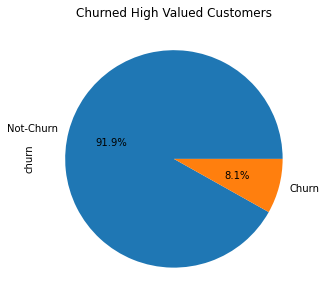

In [75]:
# Lets check the target variable to understand the percentage churned
plt.figure(figsize = (8,5))
telecom_data['churn'].value_counts().plot.pie(labels = ['Not-Churn','Churn'],autopct ='%.1f%%')
plt.title("Churned High Valued Customers")
plt.show()

#### Observations:
8.1 % of the High Valued Customers have churned from the telecom services

#### Lets analyse the Incoming Variables

Plots for - roam_ic_mou_6


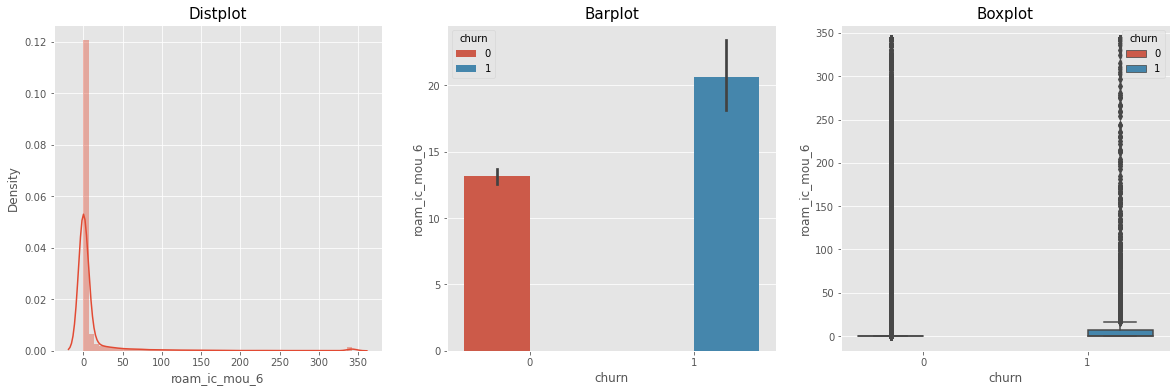

Plots for - roam_ic_mou_7


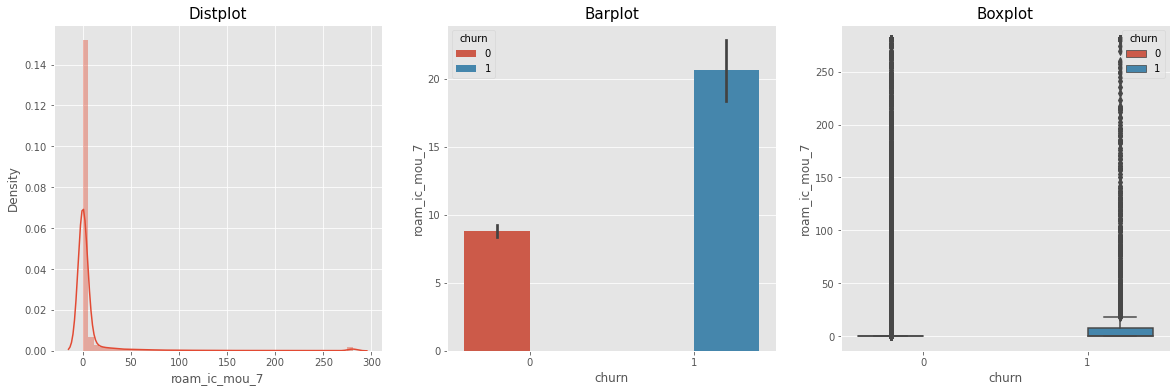

Plots for - roam_ic_mou_8


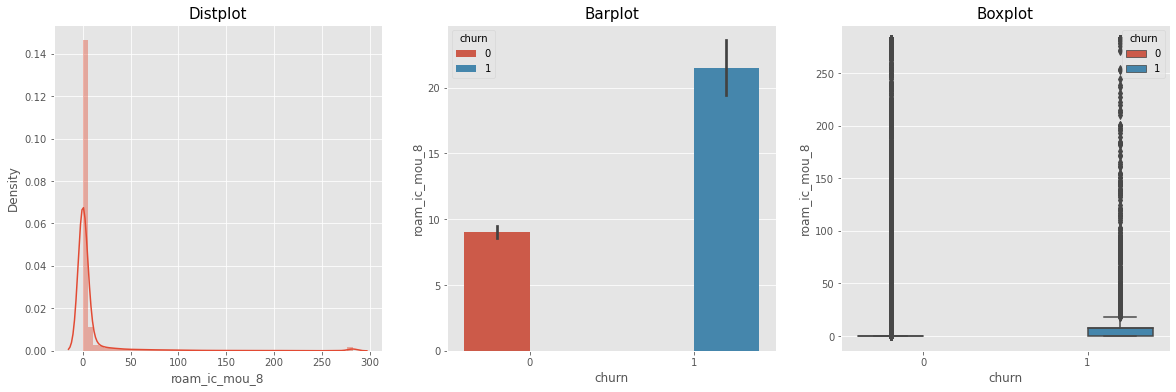

Plots for - loc_ic_mou_6


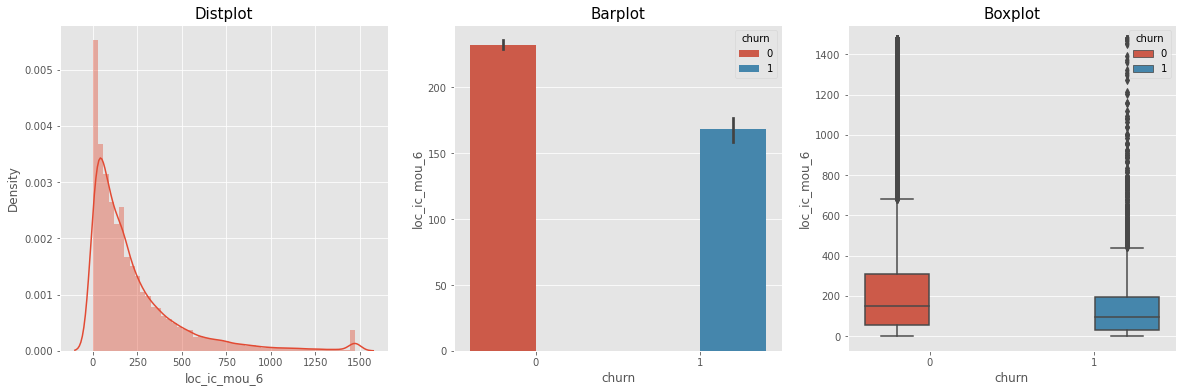

Plots for - loc_ic_mou_7


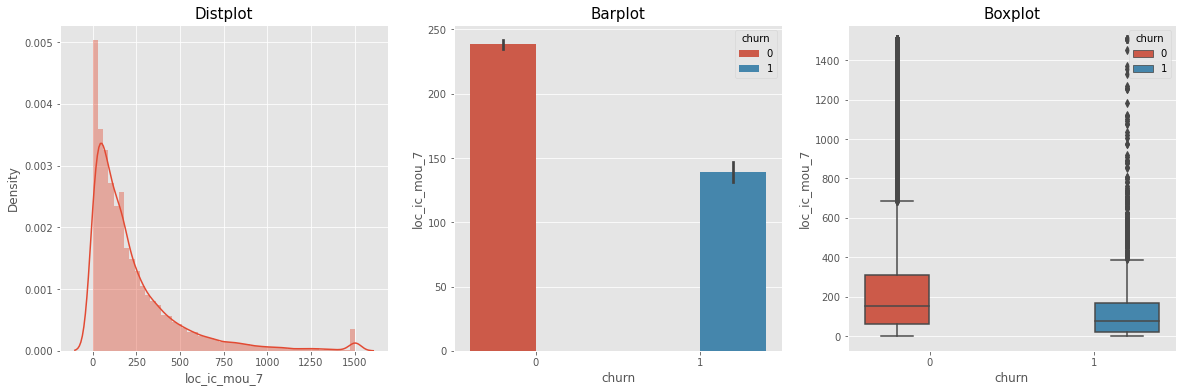

Plots for - loc_ic_mou_8


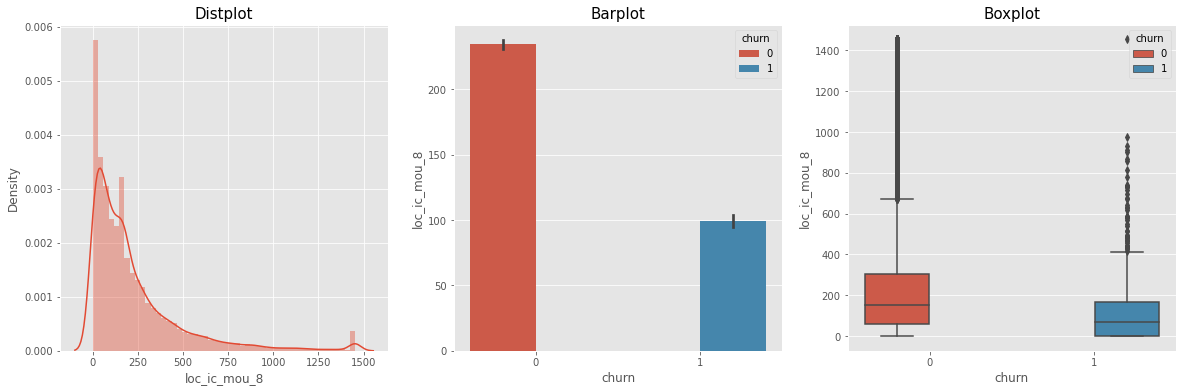

Plots for - std_ic_mou_6


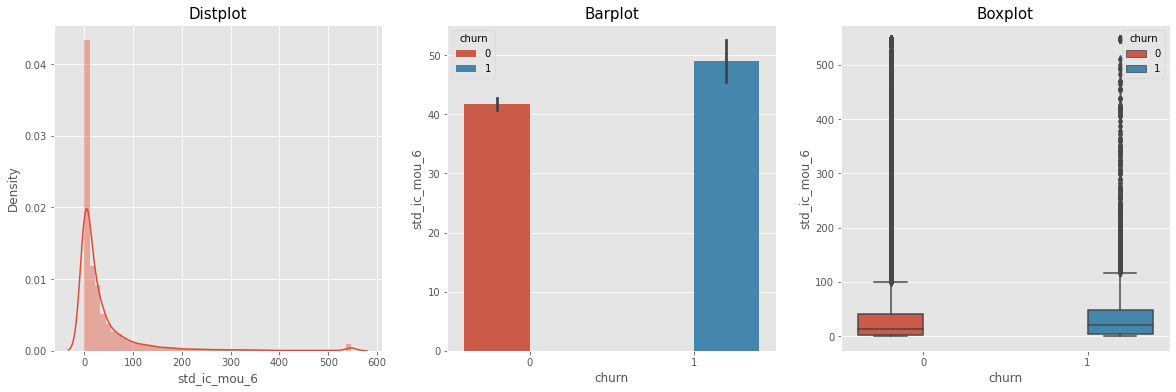

Plots for - std_ic_mou_7


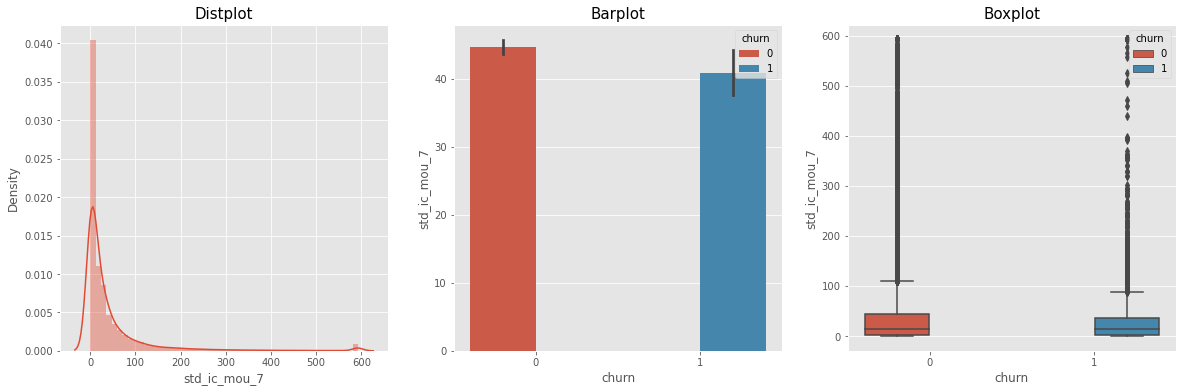

Plots for - std_ic_mou_8


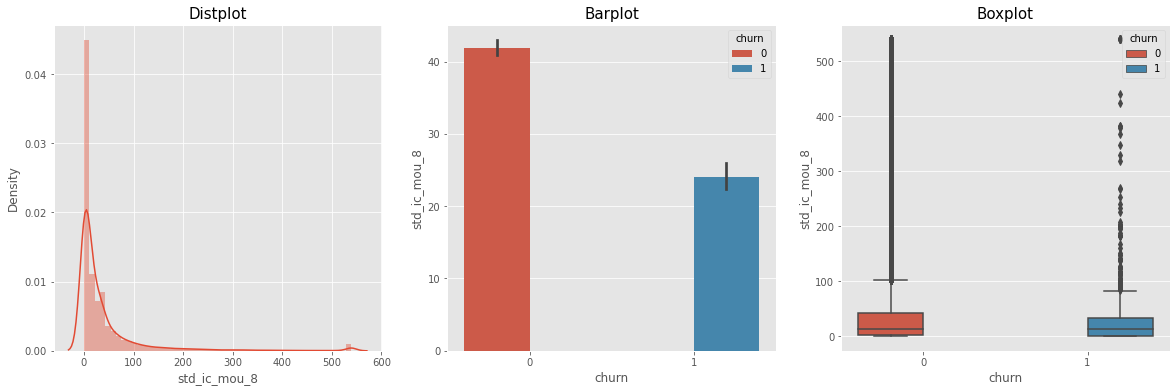

Plots for - total_ic_mou_6


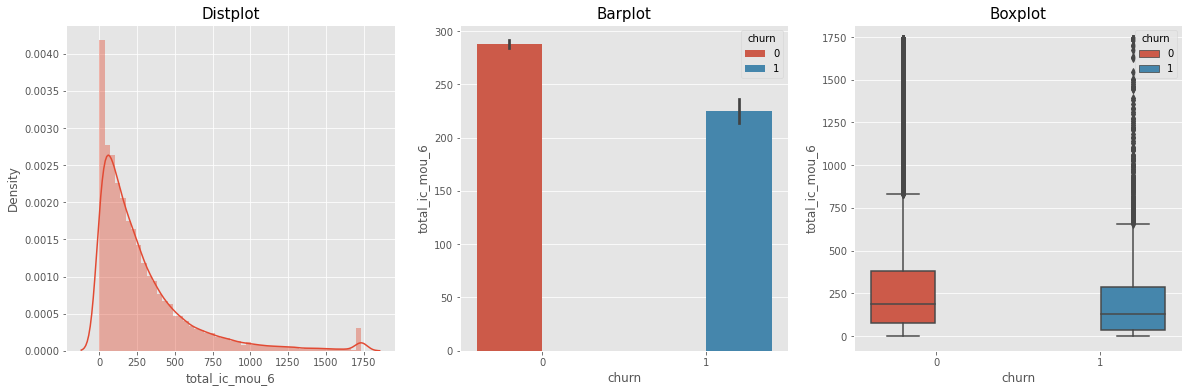

Plots for - total_ic_mou_7


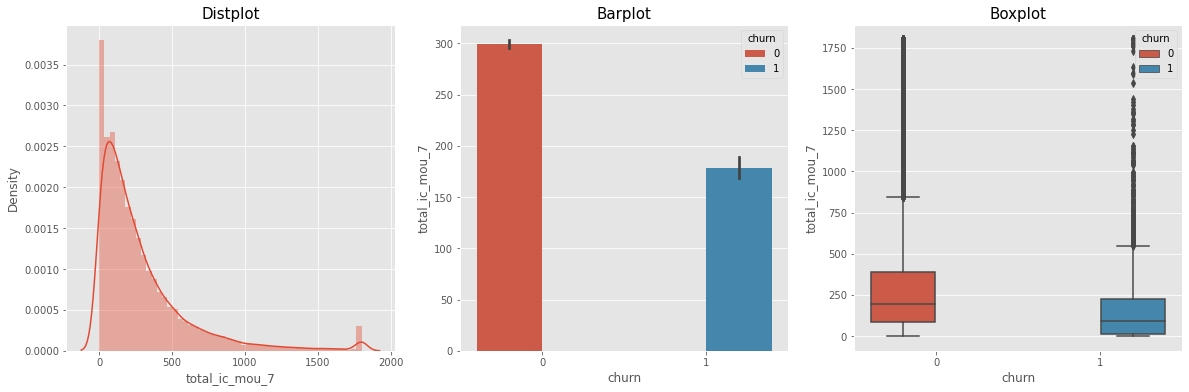

Plots for - total_ic_mou_8


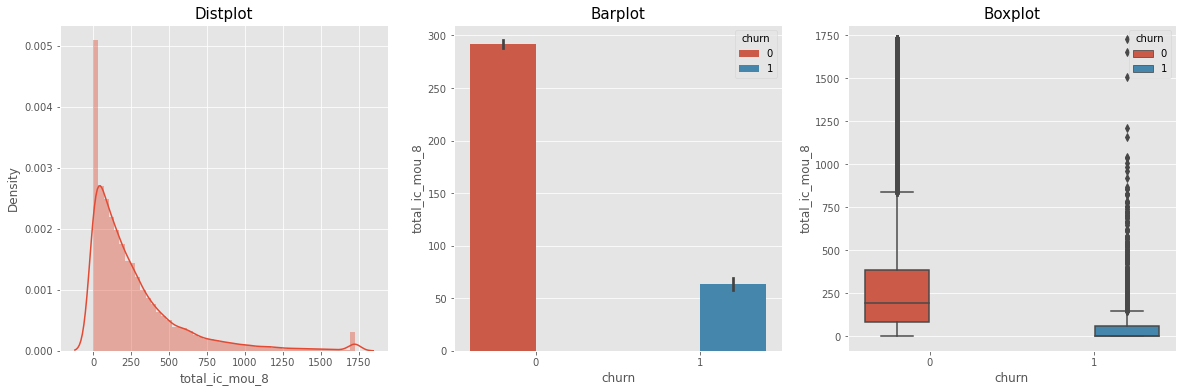

Plots for - spl_ic_mou_6


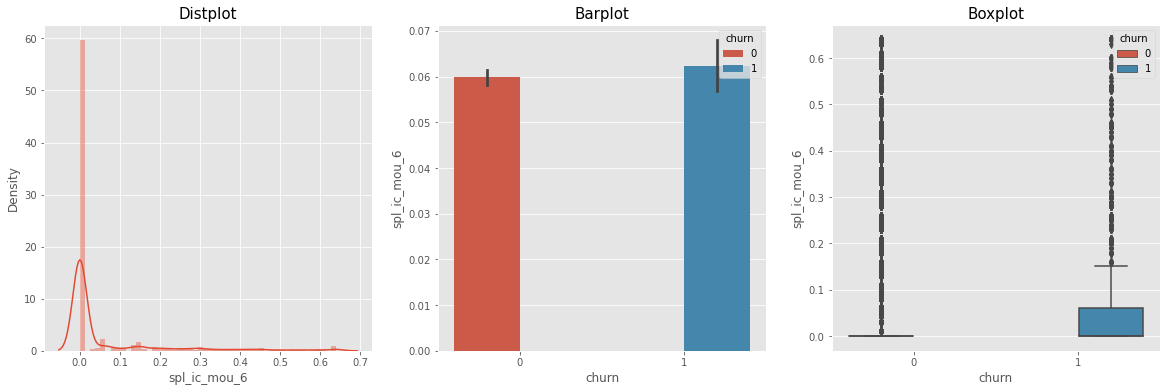

Plots for - spl_ic_mou_7


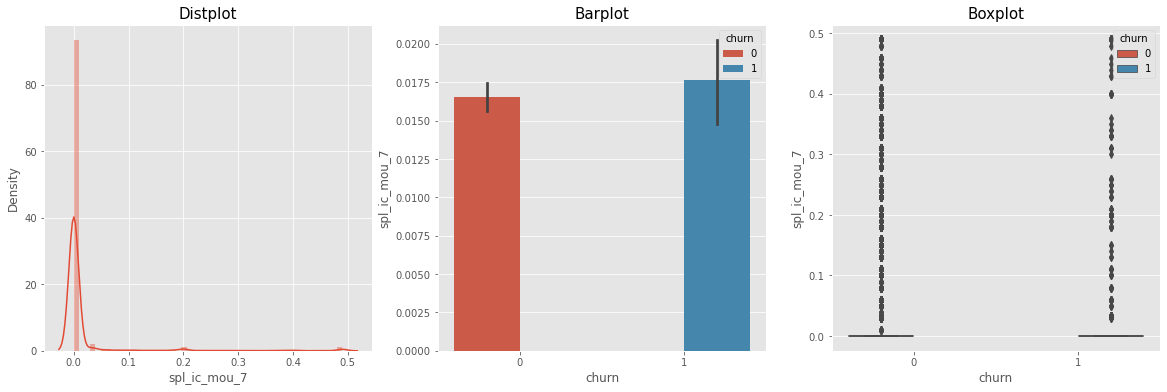

Plots for - spl_ic_mou_8


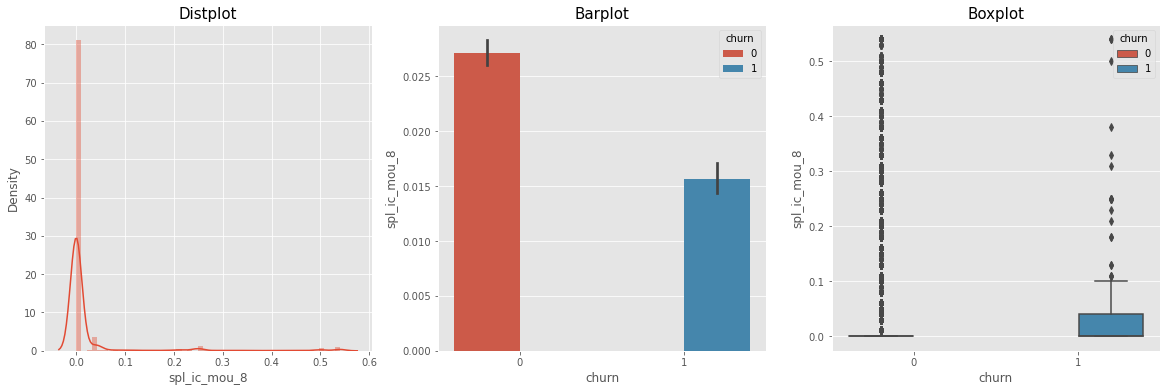

Plots for - isd_ic_mou_6


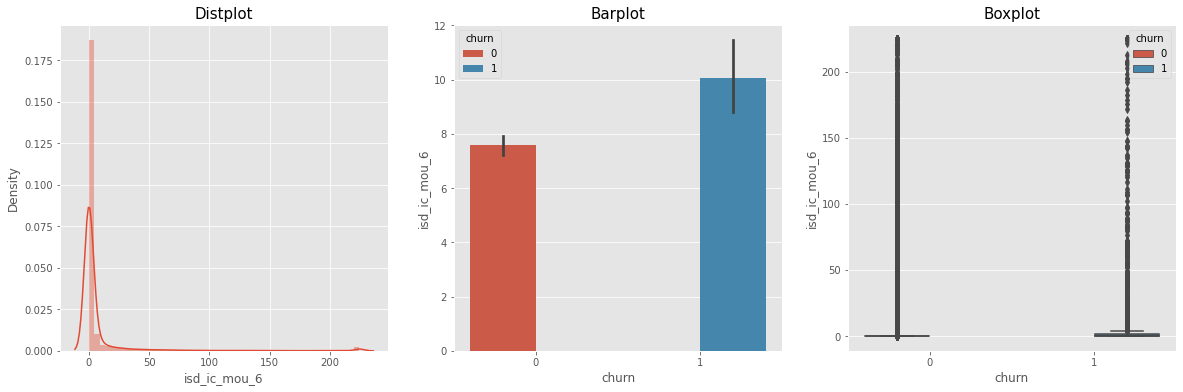

Plots for - isd_ic_mou_7


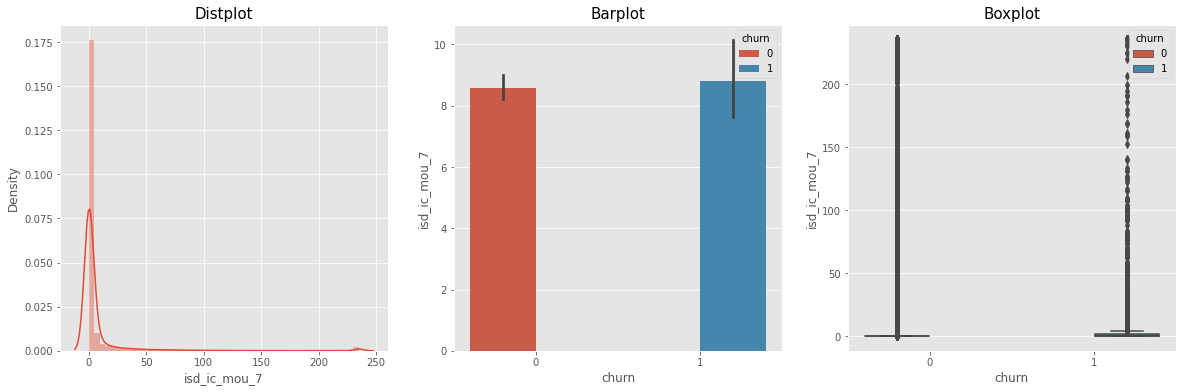

Plots for - isd_ic_mou_8


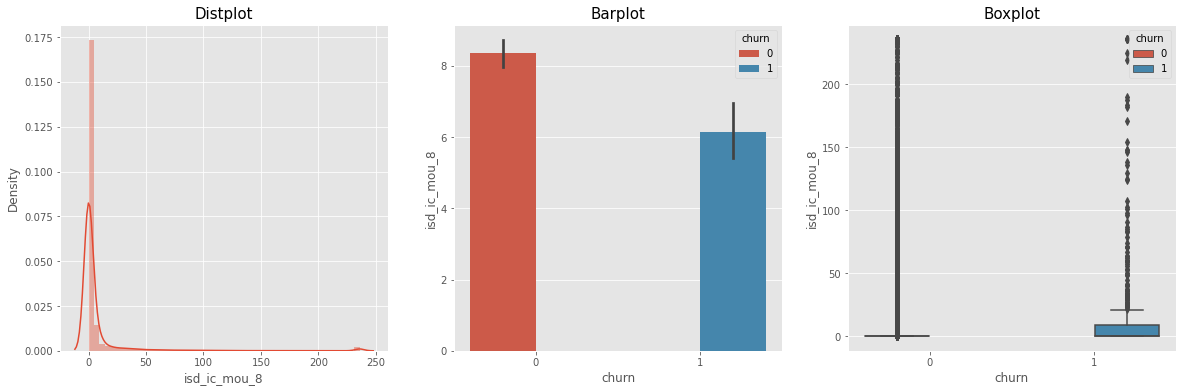

Plots for - ic_others_6


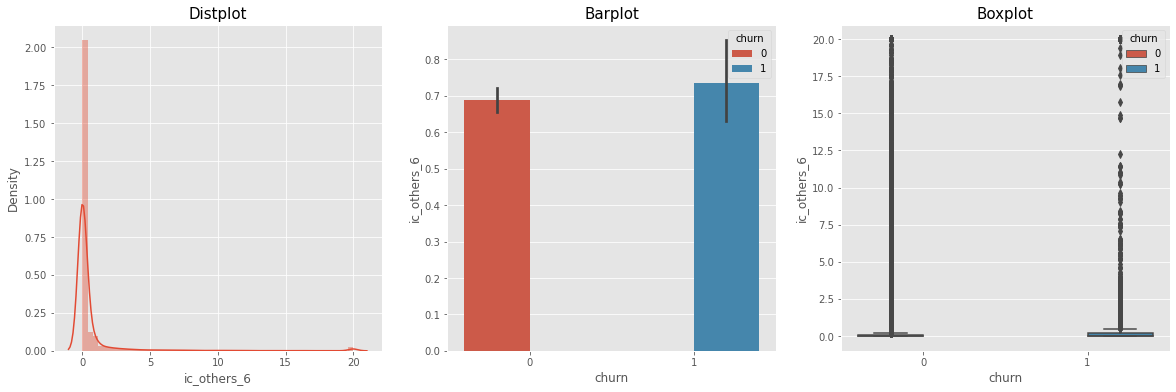

Plots for - ic_others_7


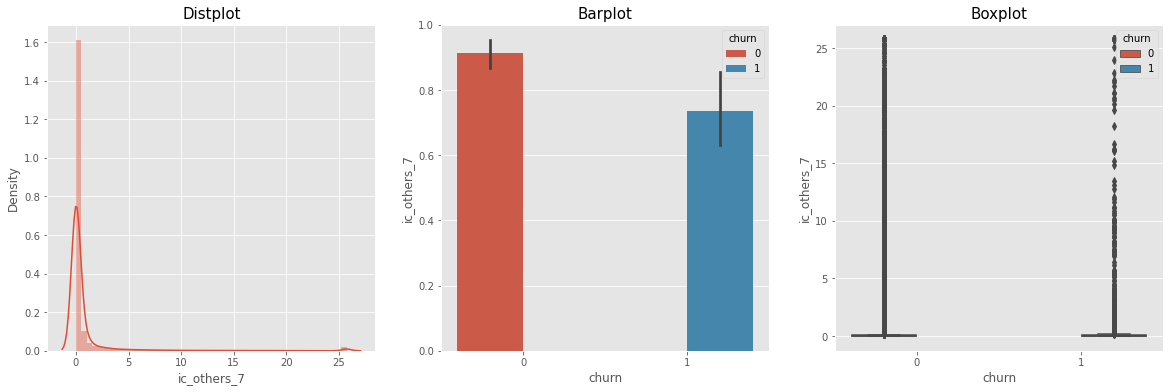

Plots for - ic_others_8


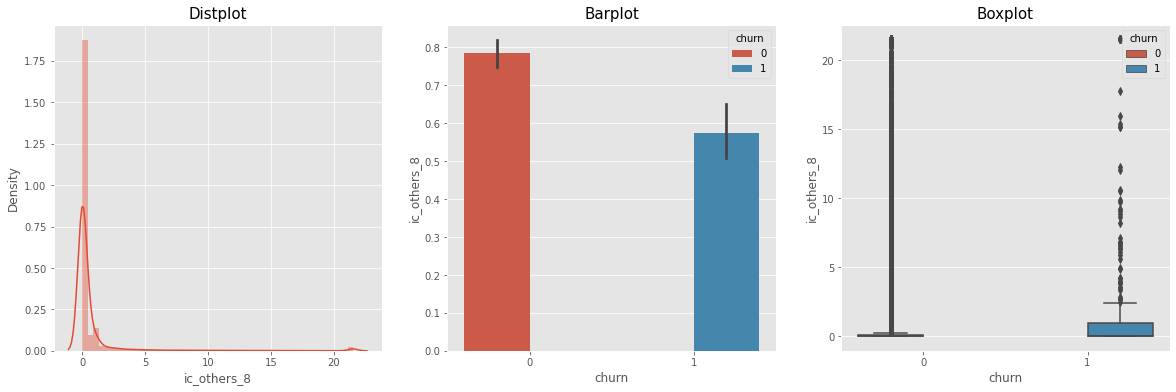

In [76]:
# Lets plot univariate the incoming variables with 'ic' in the telecom data columns
incoming_cols = [col for col in telecom_data.columns if 'ic' in col]

for col in incoming_cols:
    univariate_dist_bar_boxplot(col)

#### Observations:
- Most of the customers churned are due to 
    'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8', 
    'std_ic_mou_6',
    'spl_ic_mou_6','spl_ic_mou_7',
    'isd_ic_mou_6','isd_ic_mou_7', 
    'ic_others_6'

- So the incoming calls related to Roaming, std, spl, isd & others for the month of 6 & 7 should be closely monitored

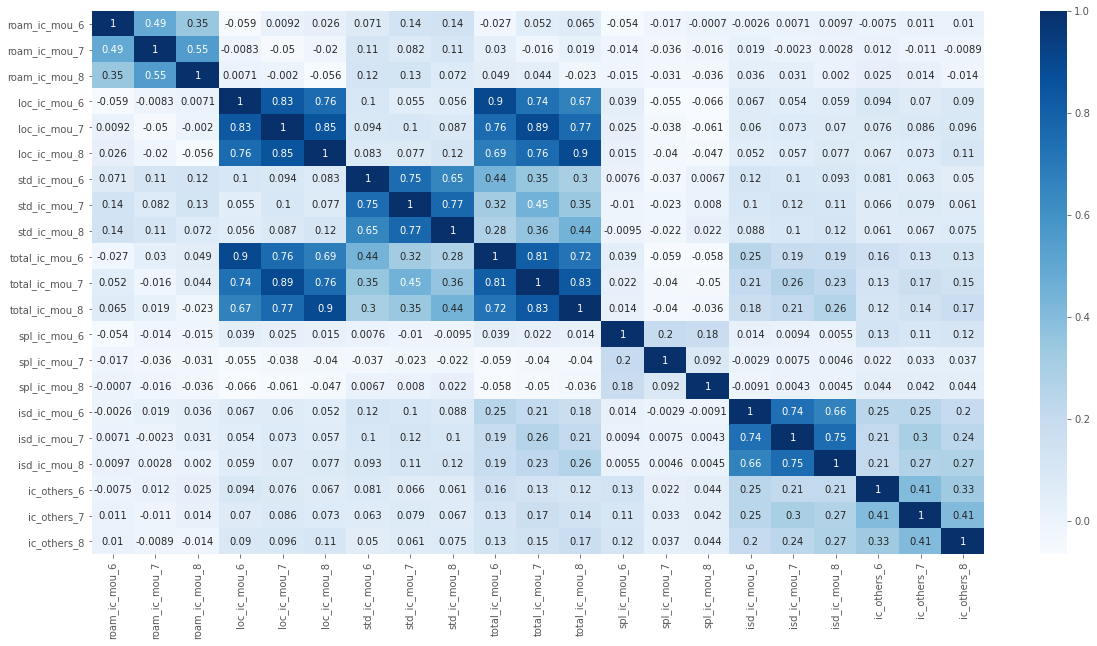

In [77]:
# lets check for correlation heatmap for incoming_cols
plt.figure(figsize=[20,10])
sns.heatmap(telecom_data[incoming_cols].corr(), annot=True, cmap='Blues')
plt.show()

#### Observations :
- Multi-Collinearity exists for couple of variables.
- 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8' are highly correlated and one or 2 of them can be dropped.
- 'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8' are highly correlated and one of them can be dropped.

#### Lets analyse the Outgoing Variables

Plots for - roam_og_mou_6


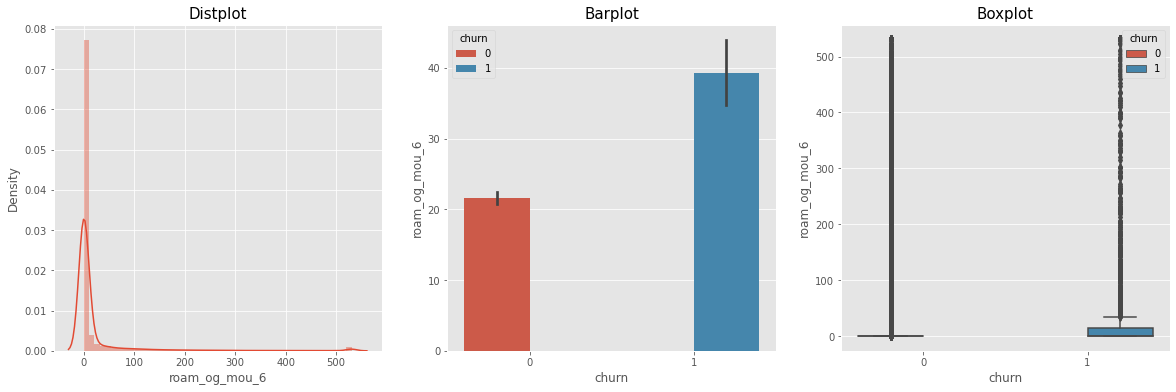

Plots for - roam_og_mou_7


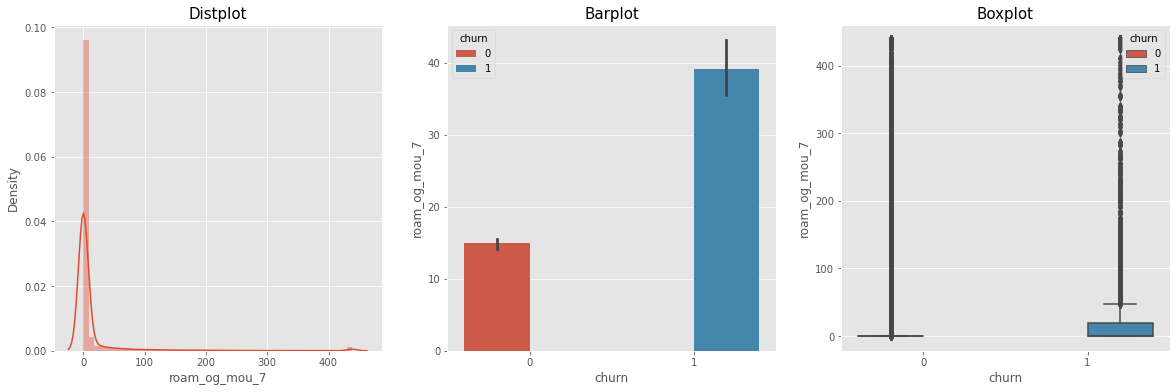

Plots for - roam_og_mou_8


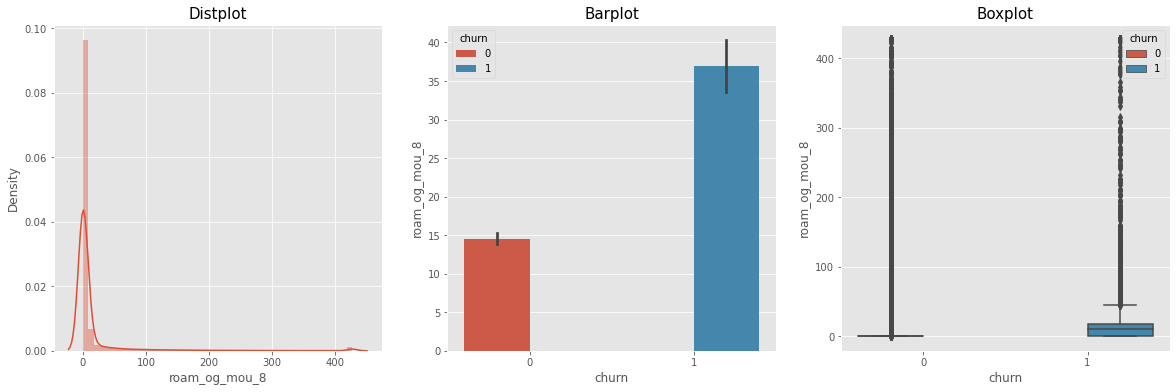

Plots for - loc_og_mou_6


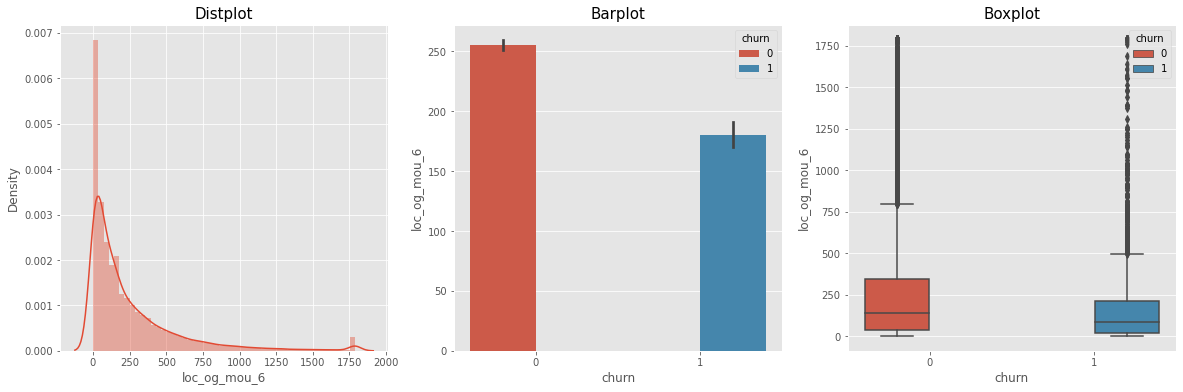

Plots for - loc_og_mou_7


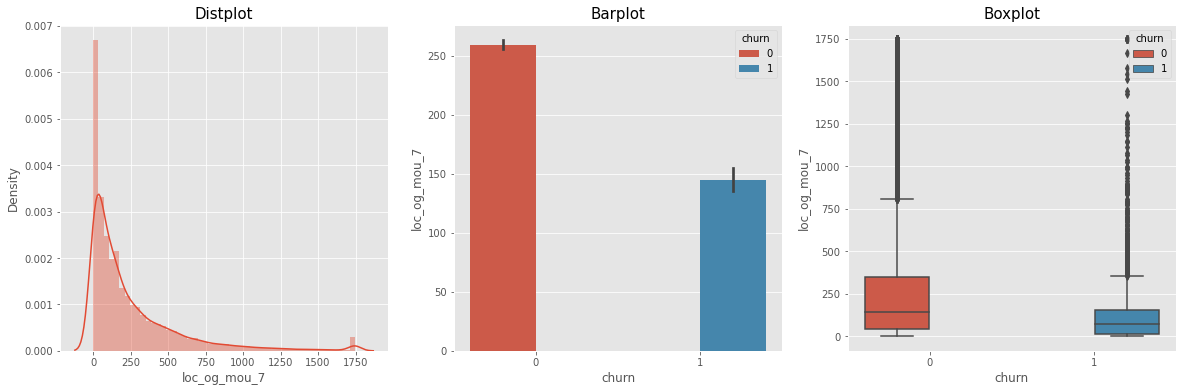

Plots for - loc_og_mou_8


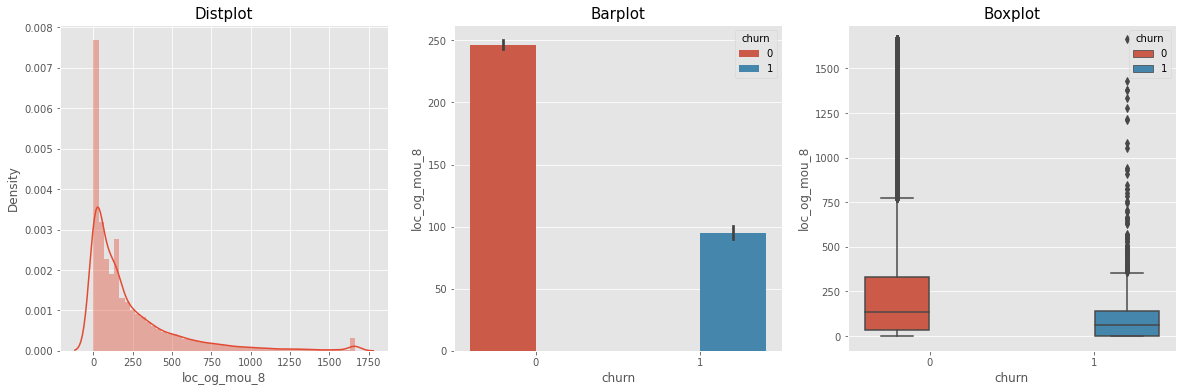

Plots for - std_og_mou_6


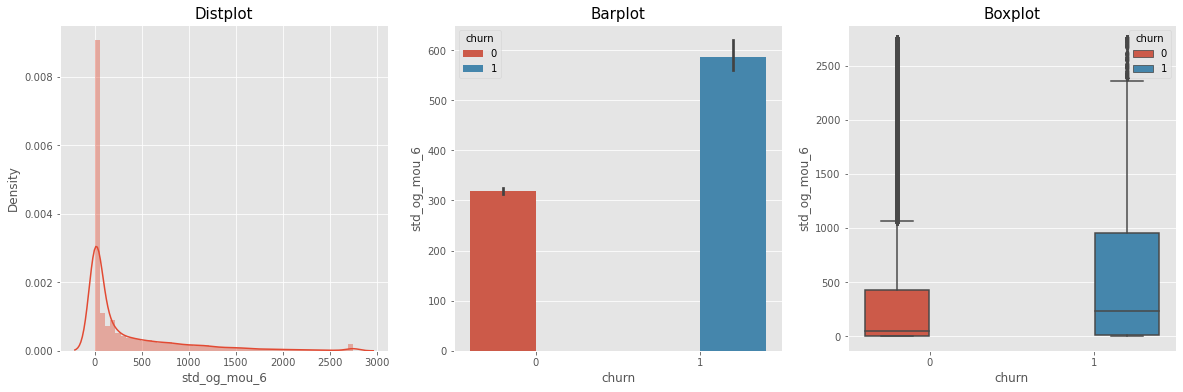

Plots for - std_og_mou_7


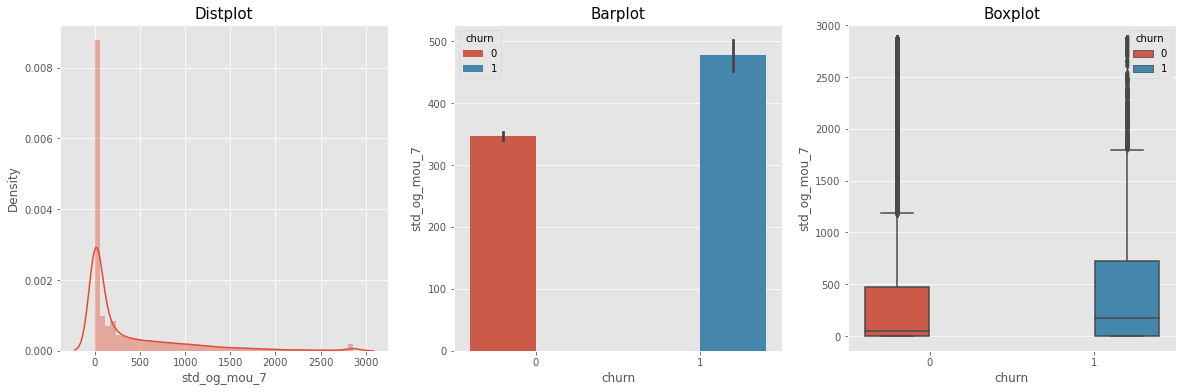

Plots for - std_og_mou_8


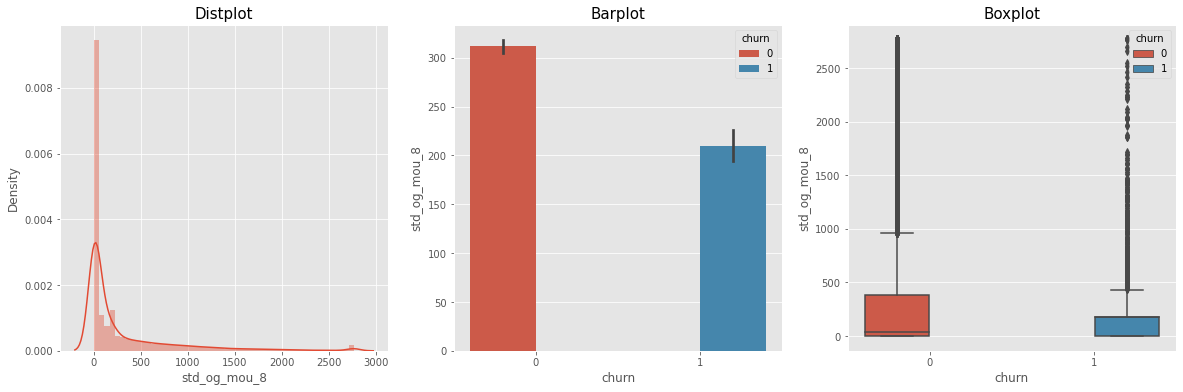

Plots for - isd_og_mou_6


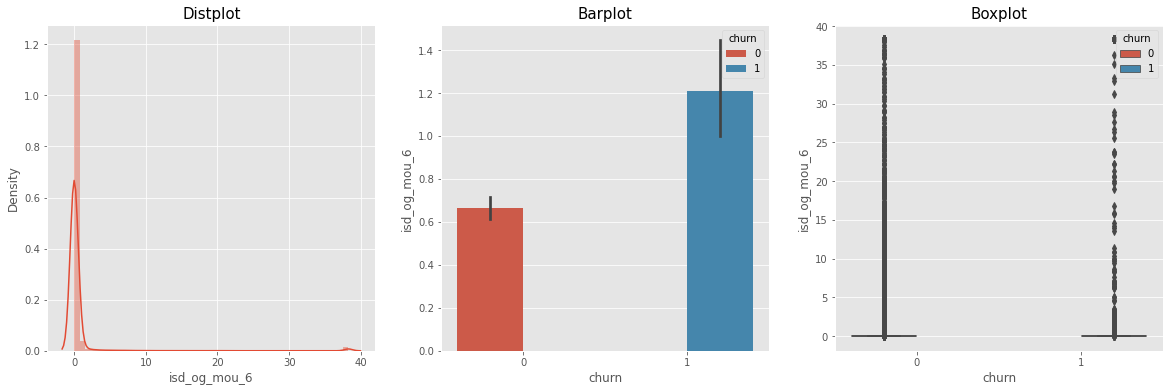

Plots for - isd_og_mou_7


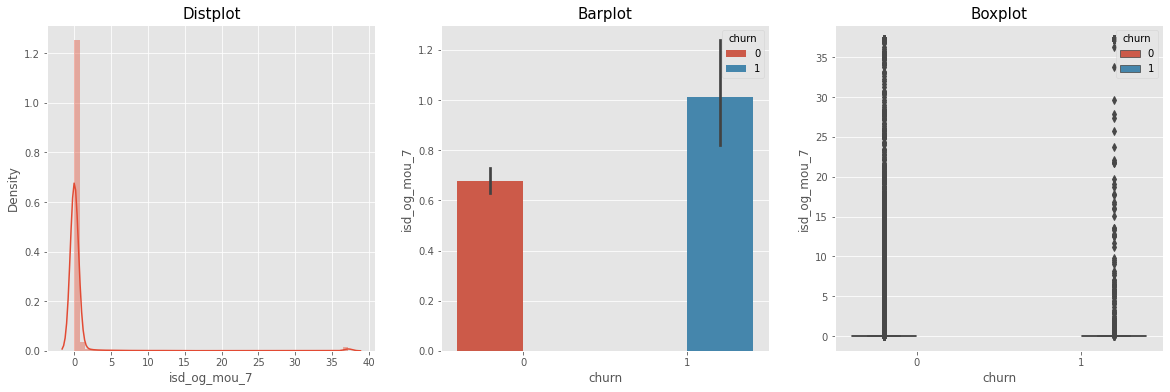

Plots for - isd_og_mou_8


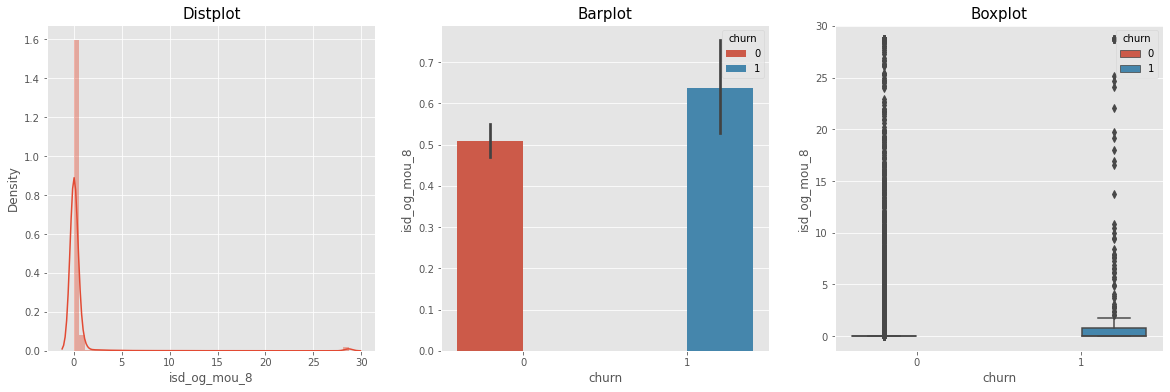

Plots for - spl_og_mou_6


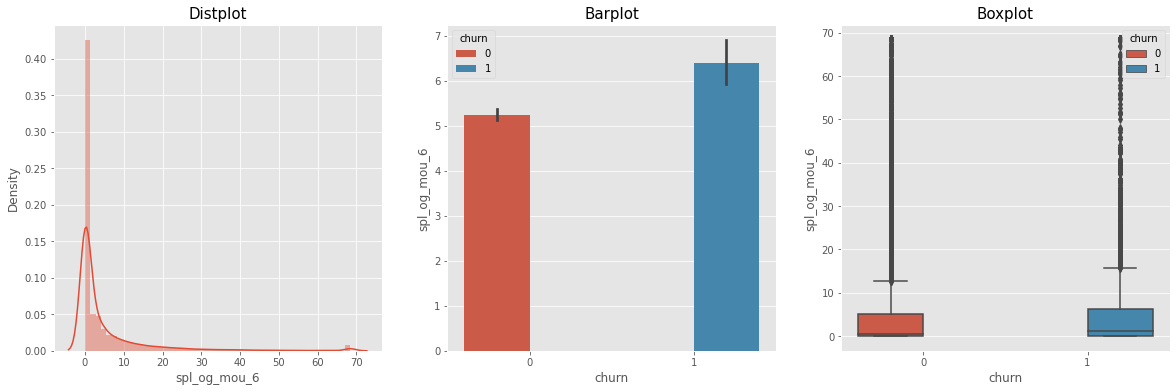

Plots for - spl_og_mou_7


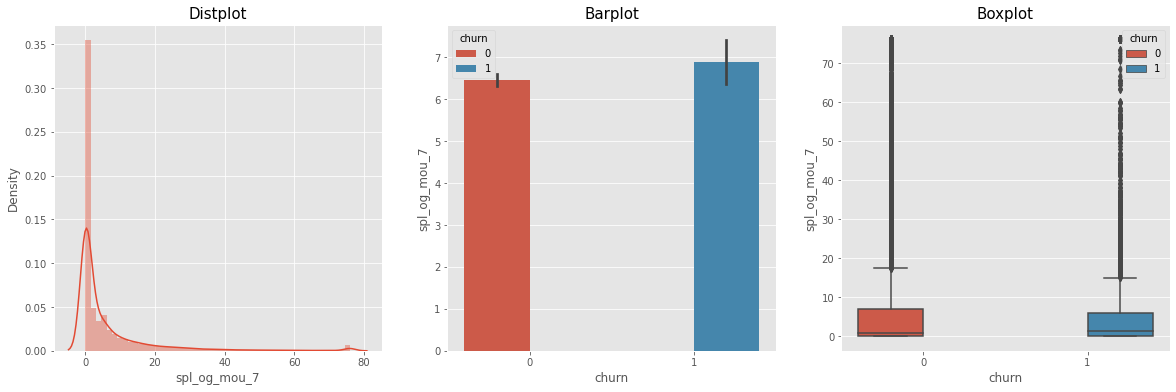

Plots for - spl_og_mou_8


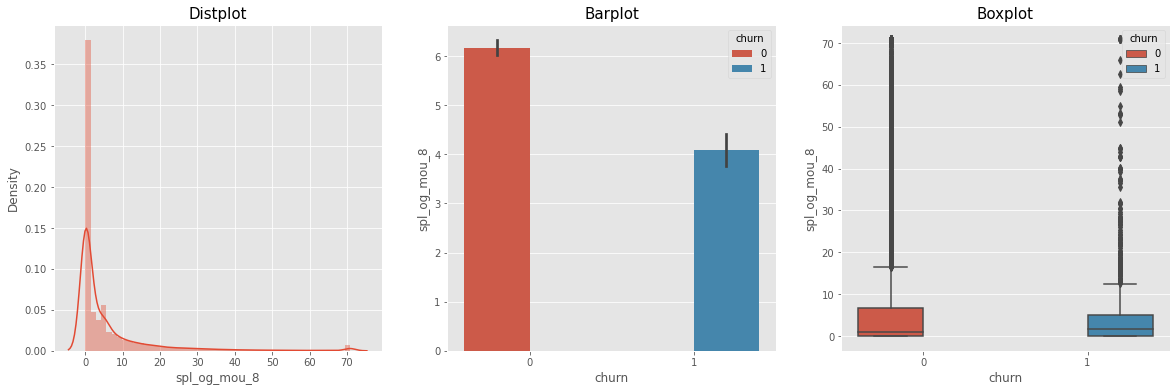

Plots for - og_others_6


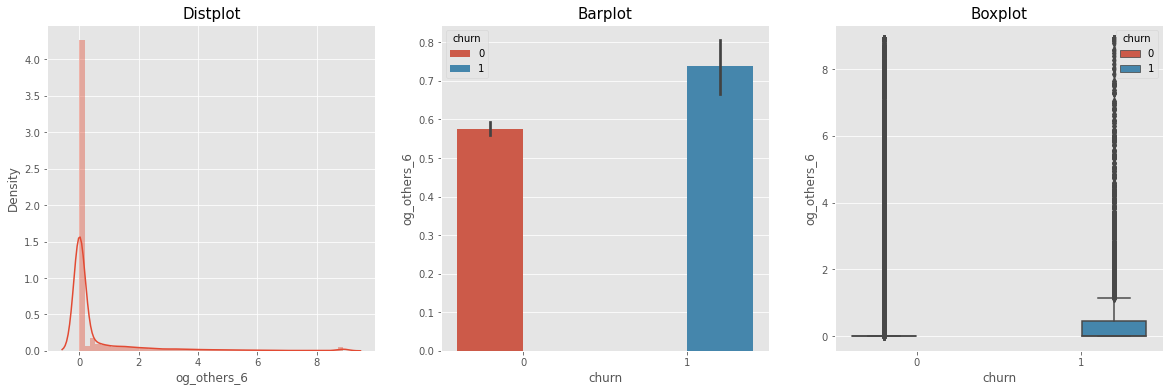

Plots for - og_others_7


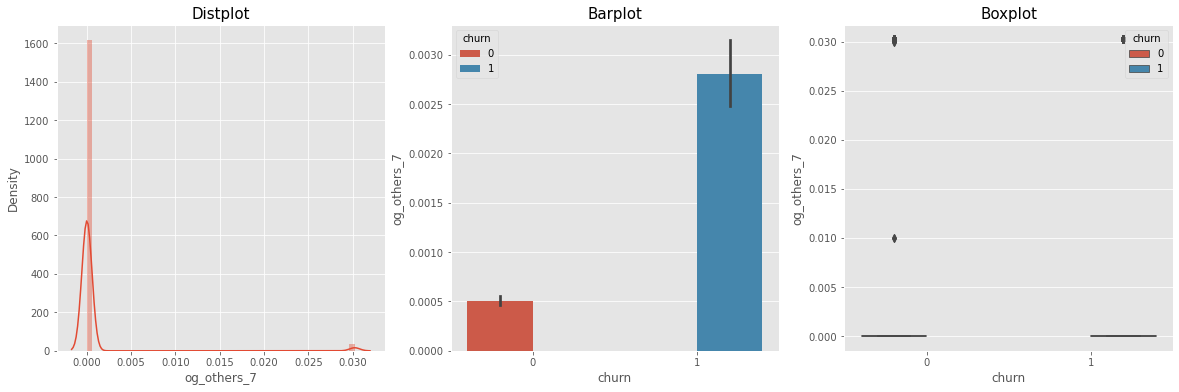

Plots for - og_others_8


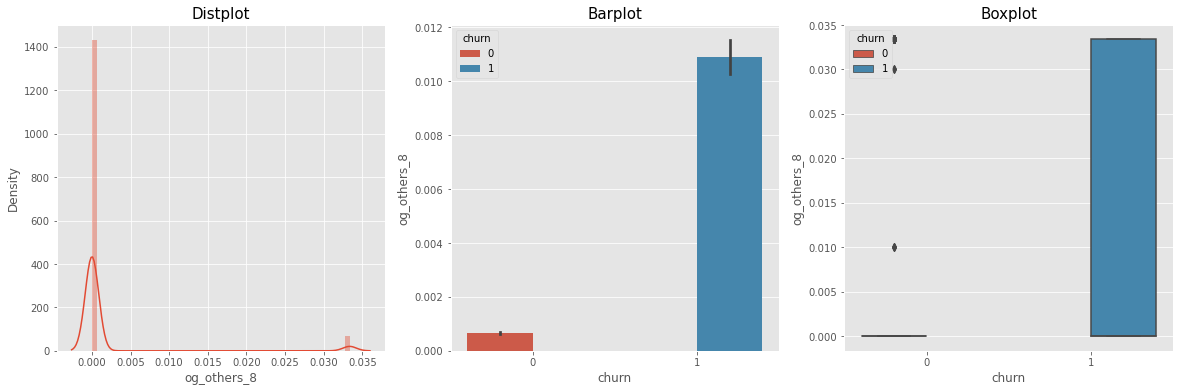

Plots for - total_og_mou_6


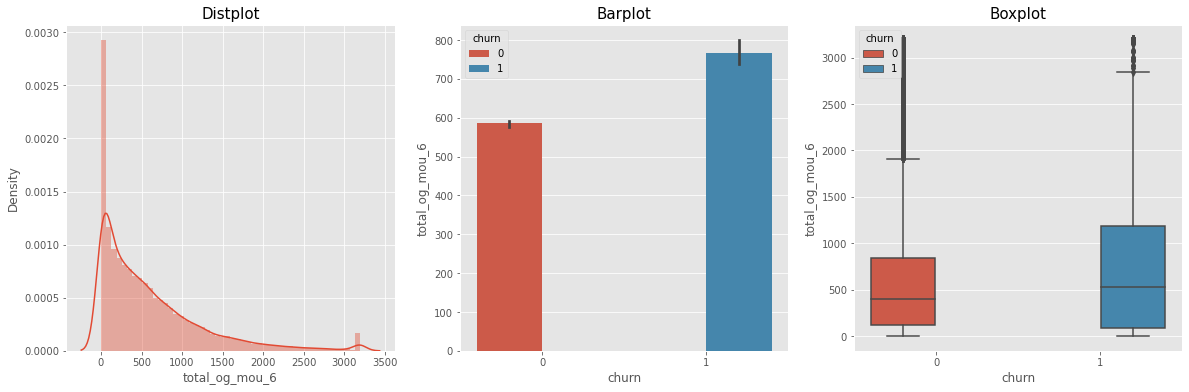

Plots for - total_og_mou_7


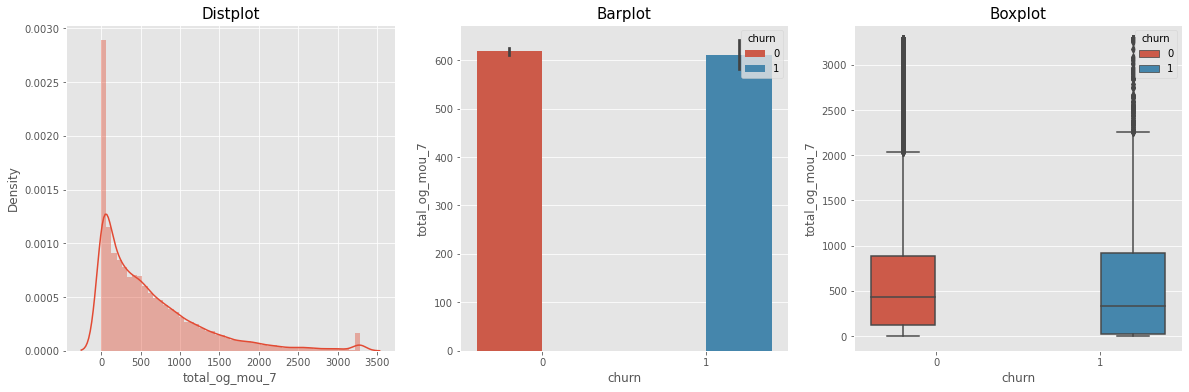

Plots for - total_og_mou_8


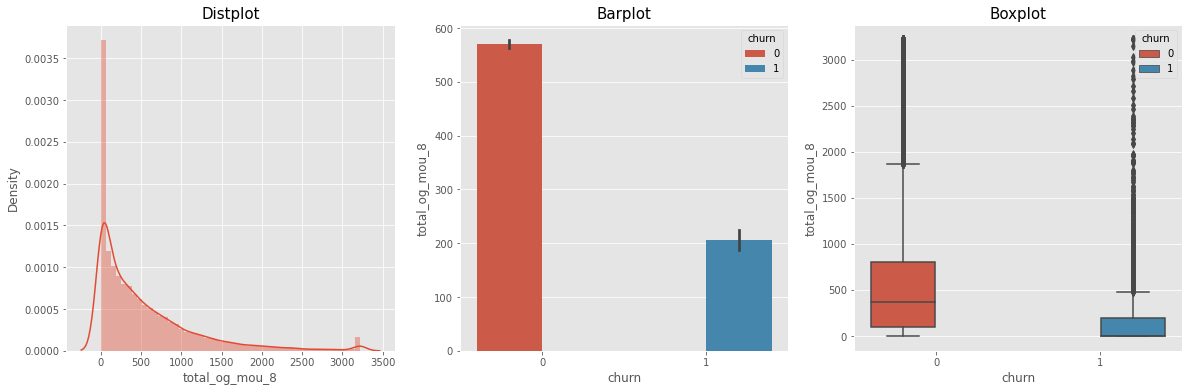

In [78]:
# Lets plot univariate the outgoing variables with 'ic' in the telecom data columns
outgoing_cols = [col for col in telecom_data.columns if 'og' in col]

for col in outgoing_cols:
    univariate_dist_bar_boxplot(col)

#### Observations:
- Most of the customers churned in outgoing calls are mostly due to,

    - 'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8',
    - 'std_og_mou_6', 'std_og_mou_7'
    - 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
    - 'spl_og_mou_6' , 'spl_og_mou_7' ,
    - 'og_others_6','og_others_7', 'og_others_8'
    - 'total_og_mou_6'
    
- So Outgoing calls related to romaing,std,isd,spl & other to be closely monitored to control churn

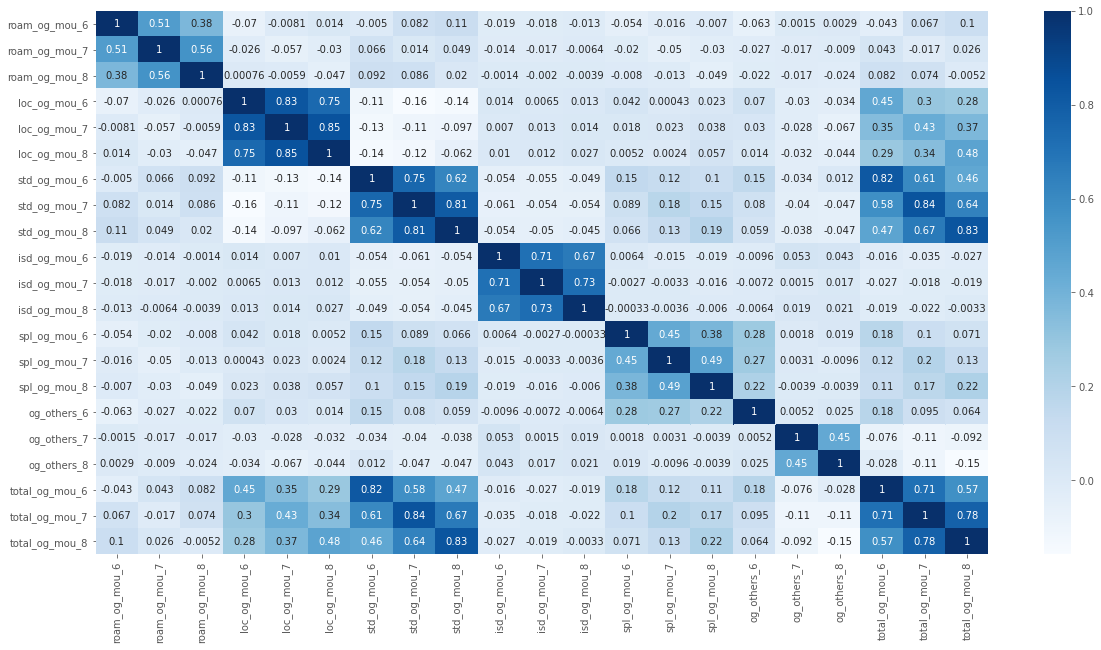

In [79]:
# lets check for correlation heatmap for outgoing_cols
plt.figure(figsize=[20,10])
sns.heatmap(telecom_data[outgoing_cols].corr(), annot=True, cmap='Blues')
plt.show()

#### Observations:
- Multi-Collinearity exists between the variables in Outgoing Calls,
- 'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8' are highly correlated and one of them can be dropped
- 'std_og_mou_7','std_og_mou_8' are highly correlated and one of them can be dropped.

#### Let's analyse 'total', 'av' columns

Plots for - total_og_mou_6


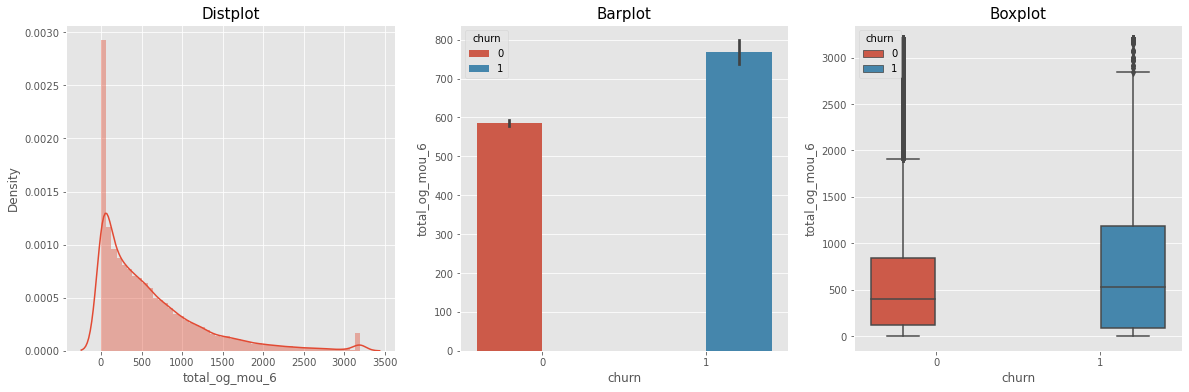

Plots for - total_og_mou_7


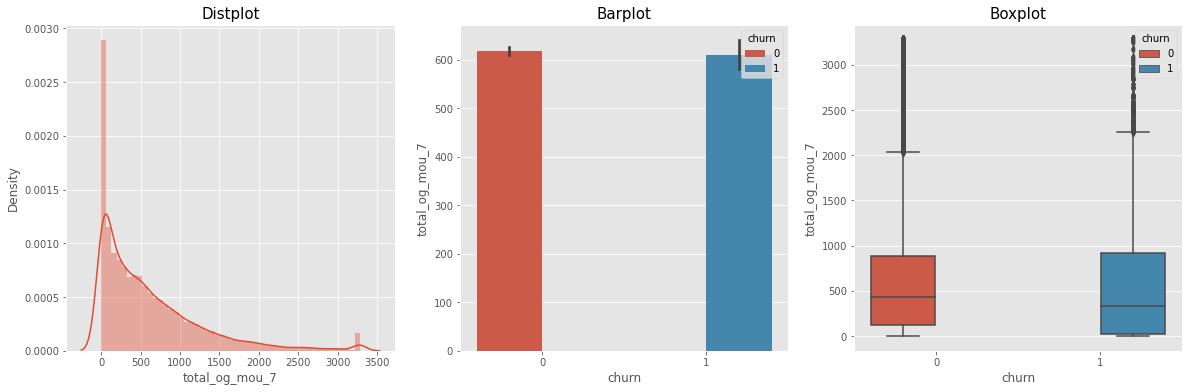

Plots for - total_og_mou_8


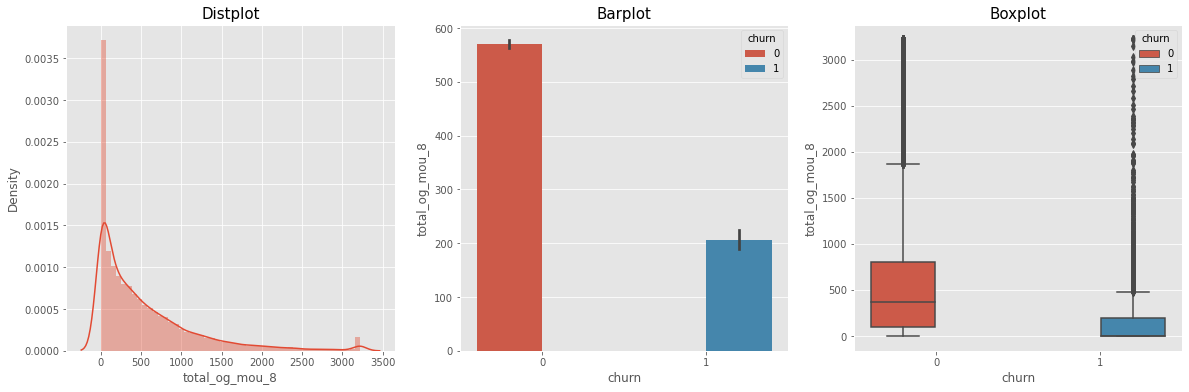

Plots for - total_ic_mou_6


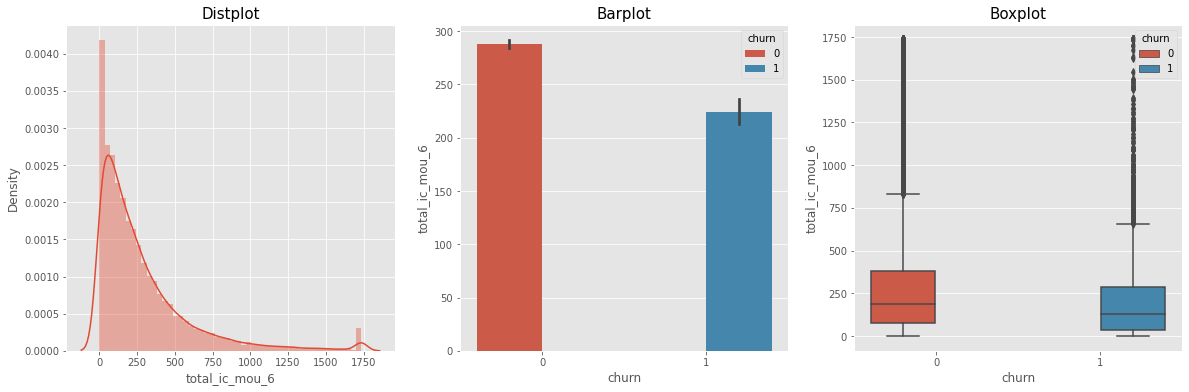

Plots for - total_ic_mou_7


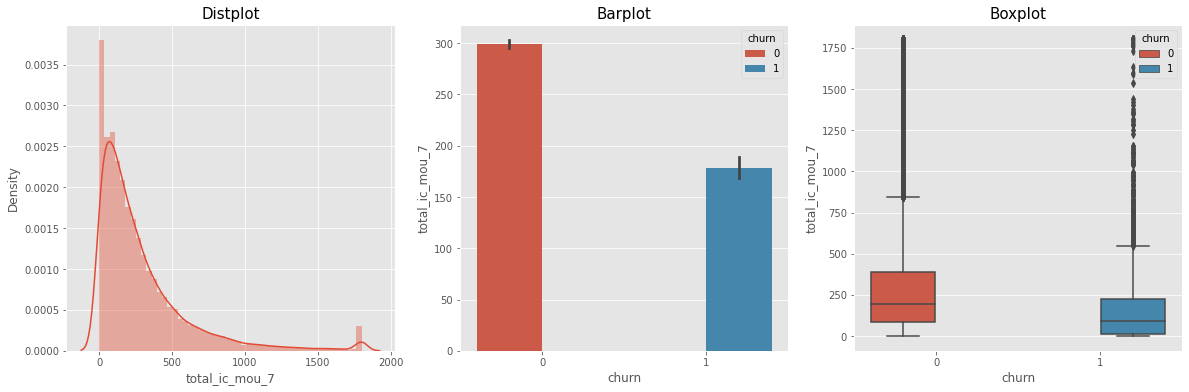

Plots for - total_ic_mou_8


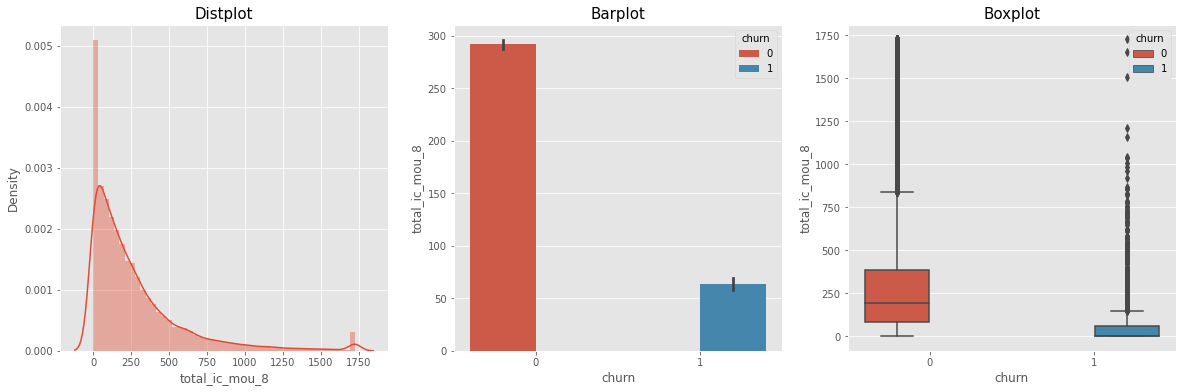

Plots for - total_rech_num_6


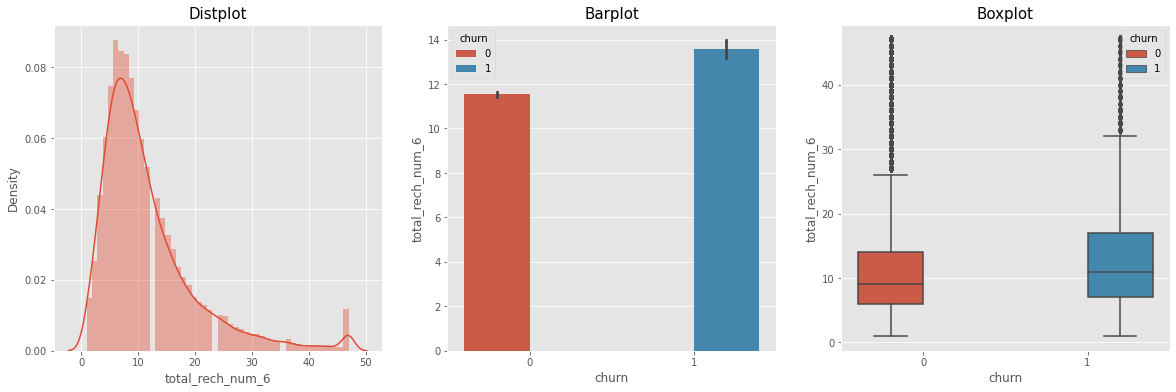

Plots for - total_rech_num_7


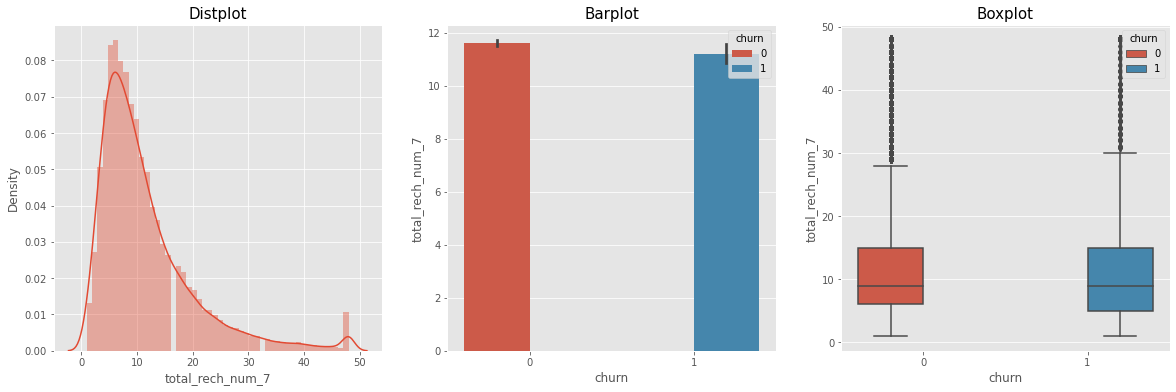

Plots for - total_rech_num_8


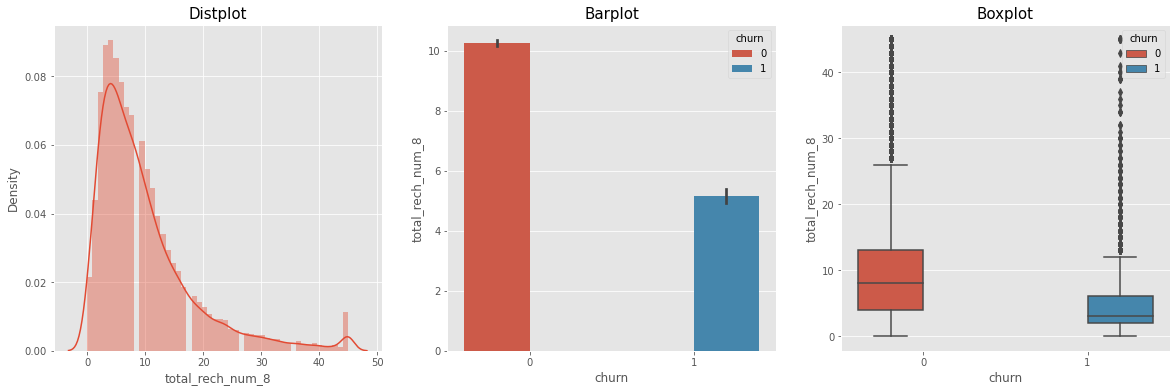

Plots for - total_rech_amt_6


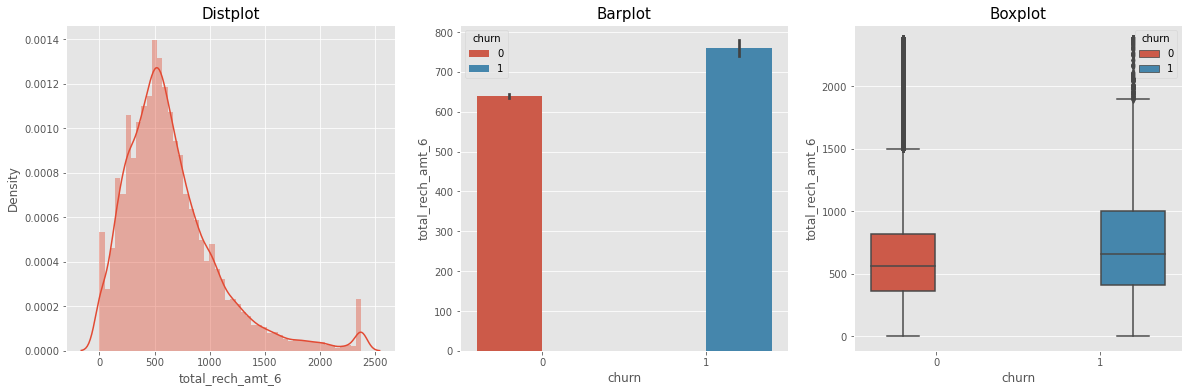

Plots for - total_rech_amt_7


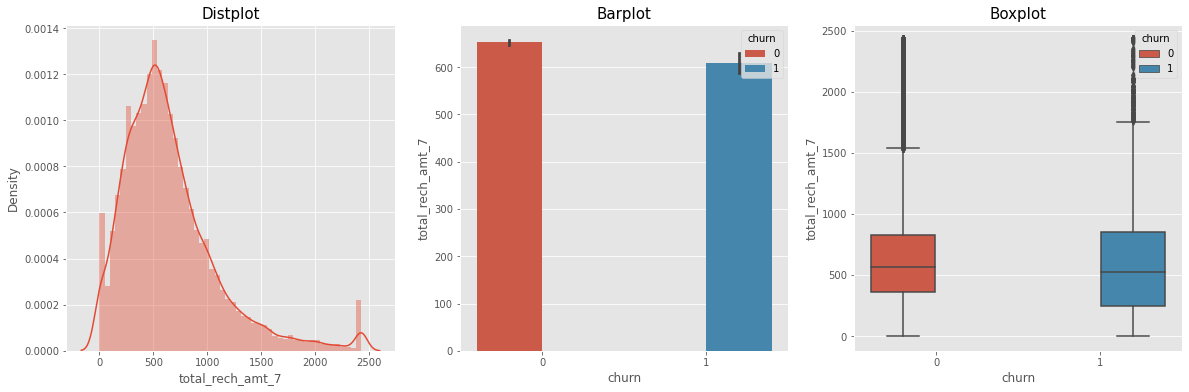

Plots for - total_rech_amt_8


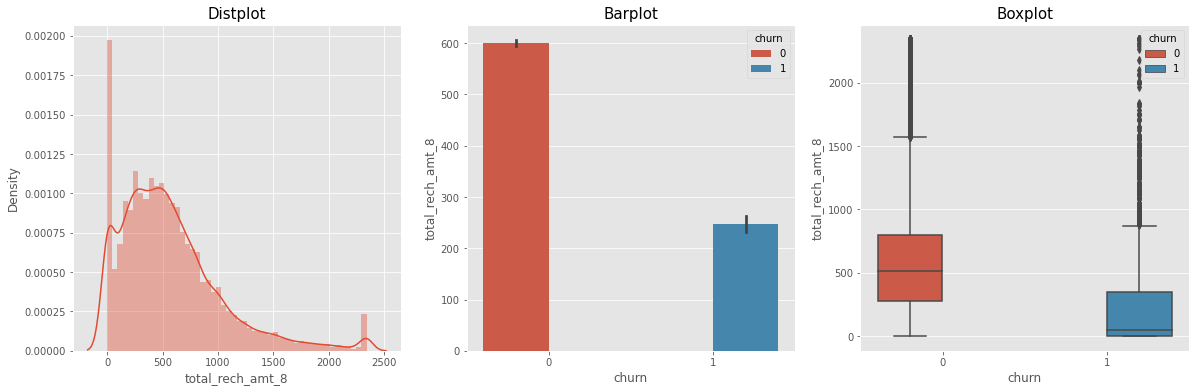

Plots for - total_rech_data_6


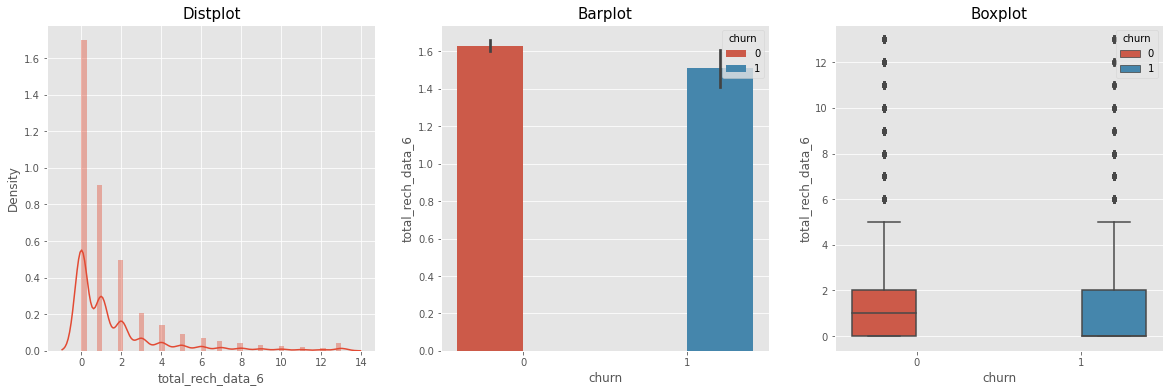

Plots for - total_rech_data_7


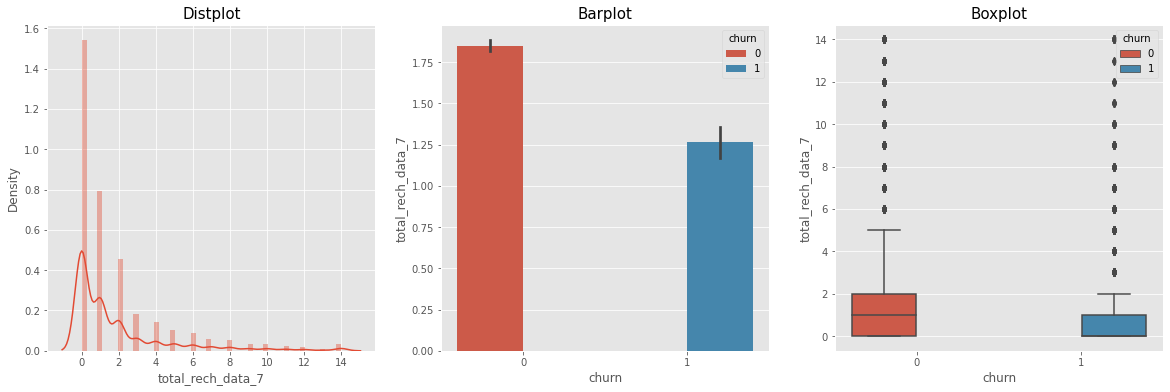

Plots for - total_rech_data_8


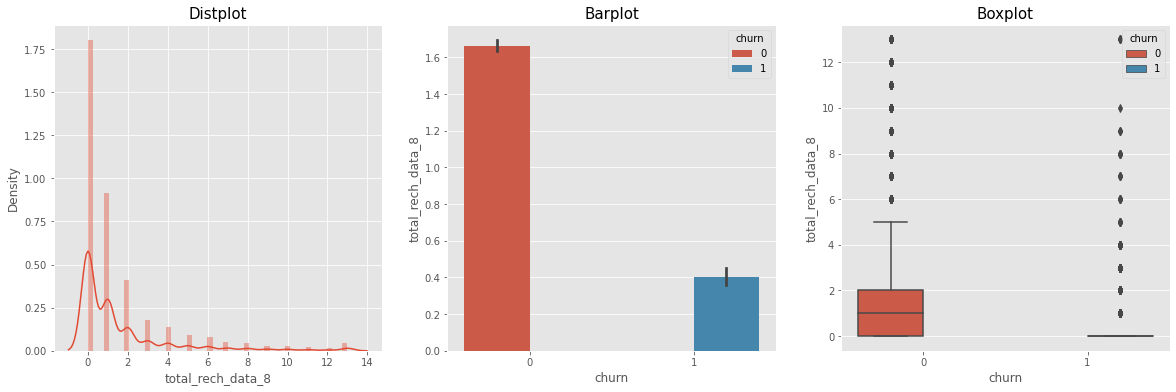

Plots for - av_rech_amt_data_6


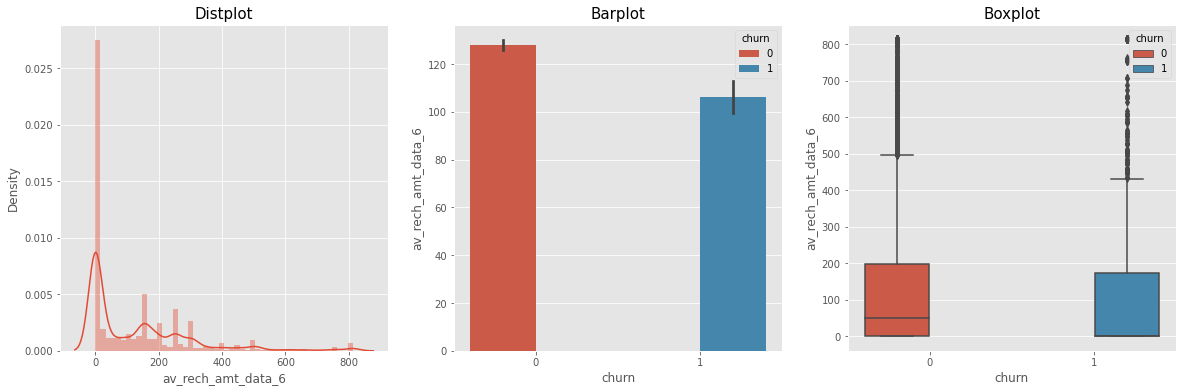

Plots for - av_rech_amt_data_7


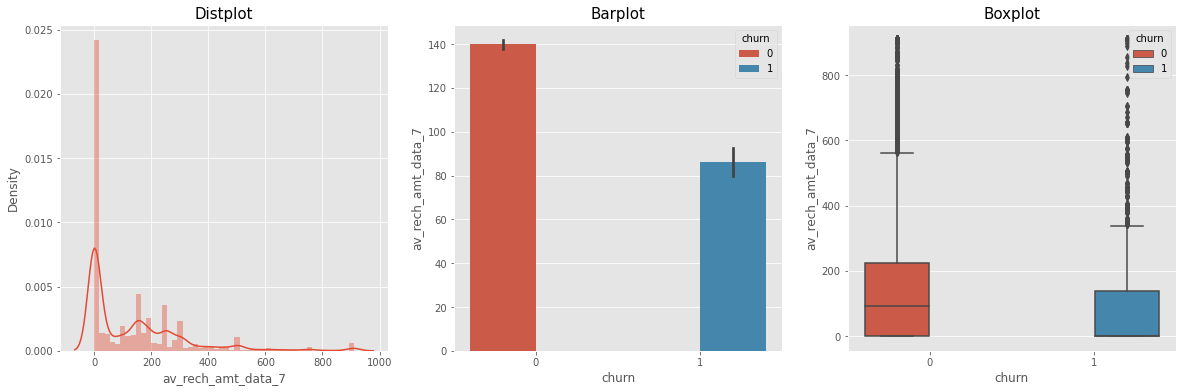

Plots for - av_rech_amt_data_8


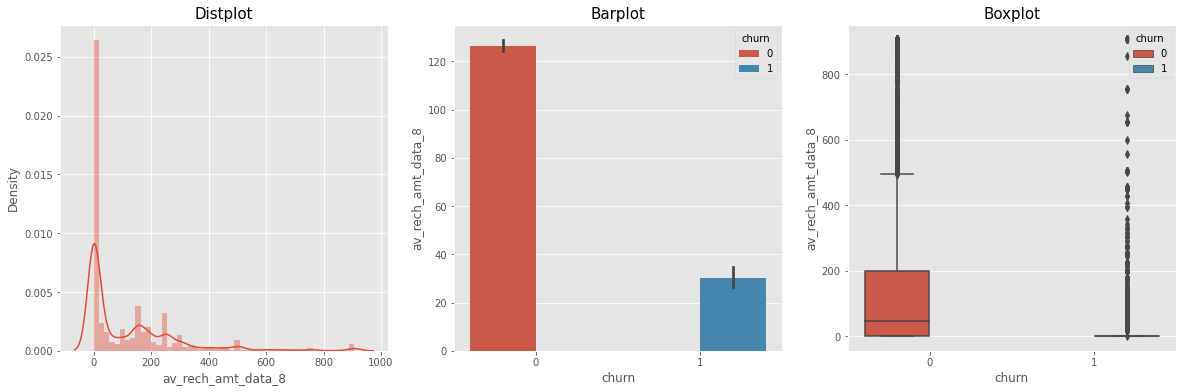

Plots for - total_rech_amt_data_6


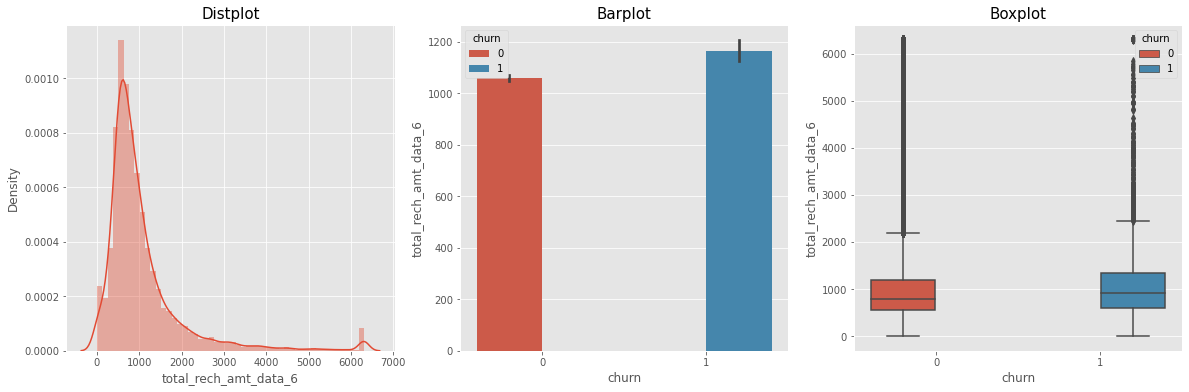

Plots for - total_rech_amt_data_7


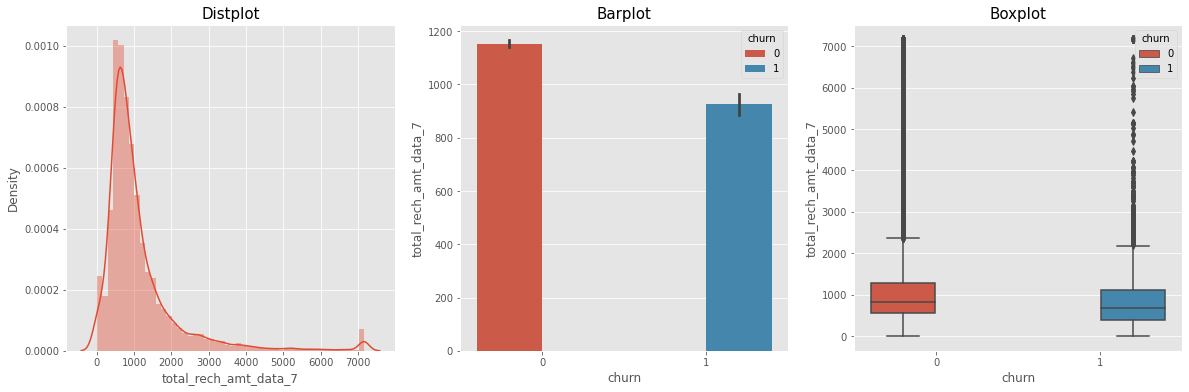

Plots for - total_rech_amt_data_8


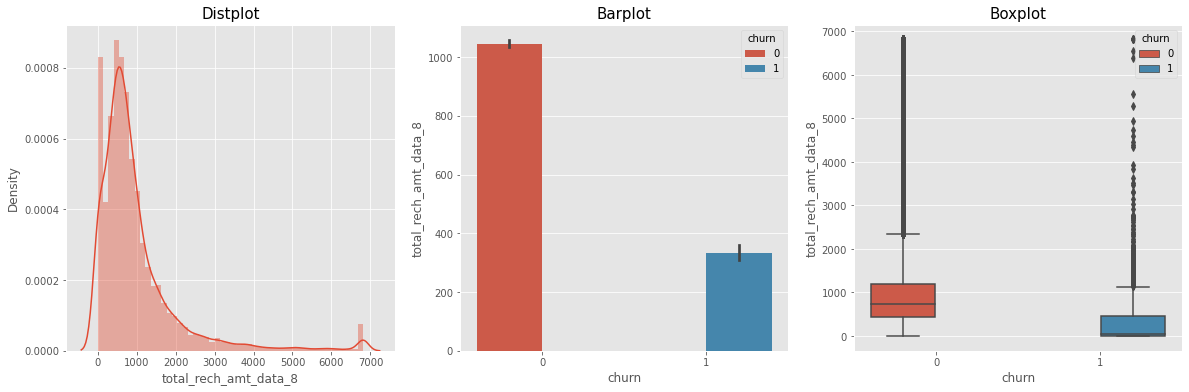

Plots for - total_vol_mb_6


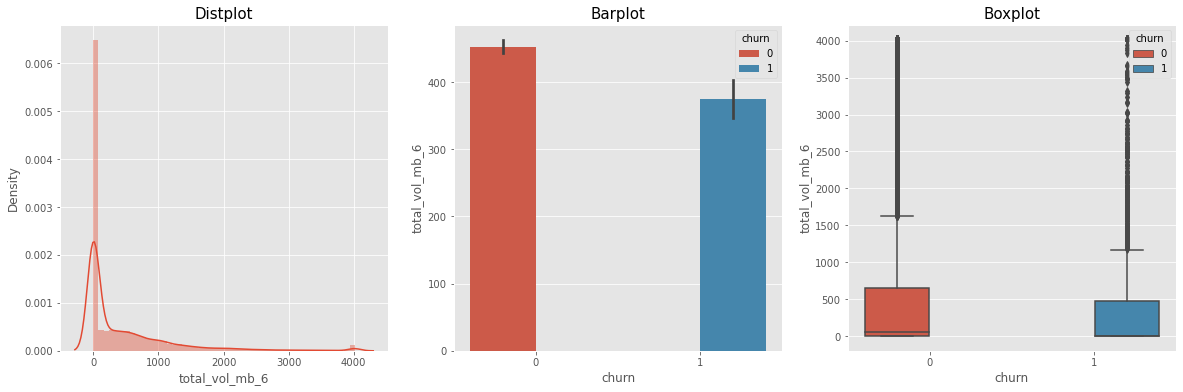

Plots for - total_vol_mb_7


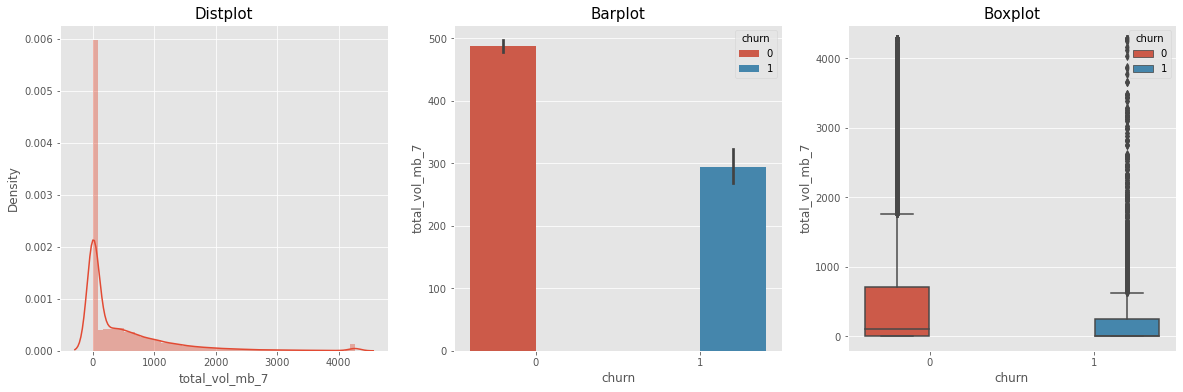

Plots for - total_vol_mb_8


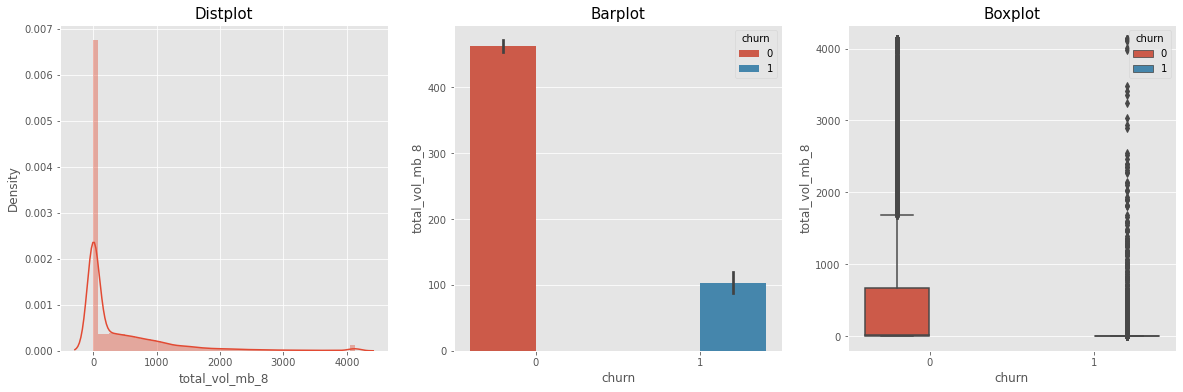

Plots for - total_arpu_2g_3g_6


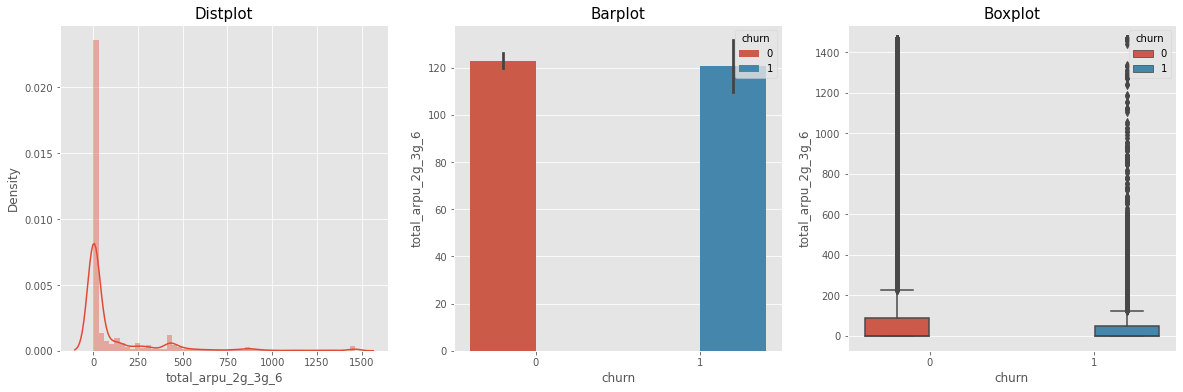

Plots for - total_arpu_2g_3g_7


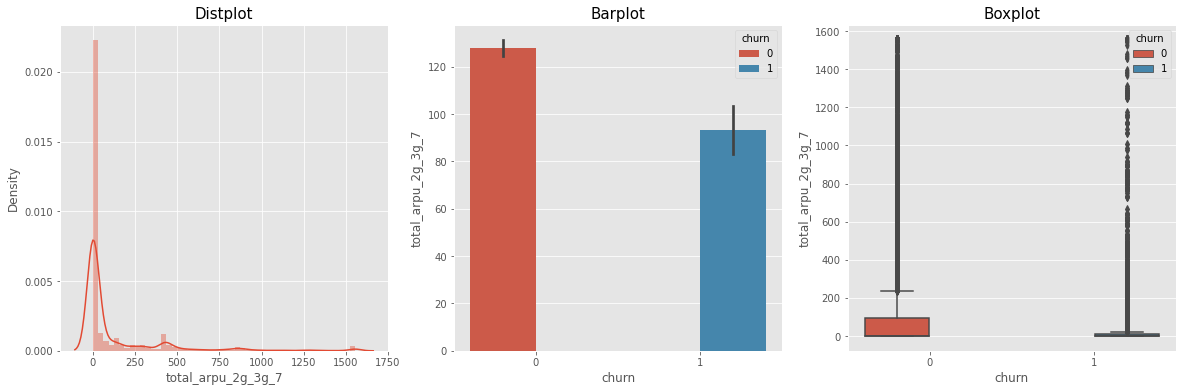

Plots for - total_arpu_2g_3g_8


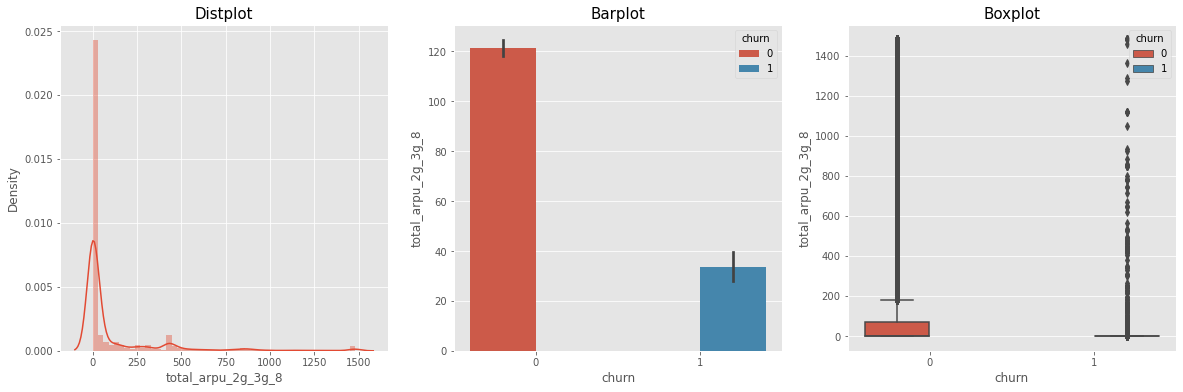

Plots for - avg_total_amt_6_7


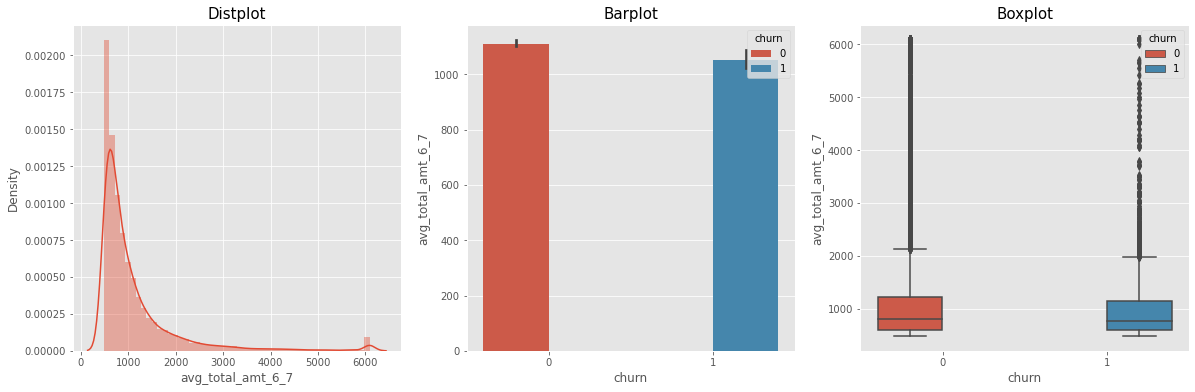

In [80]:
# Lets plot univariate the 'total' & 'av' variables with 'total' & 'av' in the telecom data columns
total_av_col = [col for col in telecom_data.columns if 'total' in col or 'av' in col]

for col in total_av_col:
    univariate_dist_bar_boxplot(col)

#### Observations:
- Most of the customers churned have high 'total_og_mou_6', 'total_rech_num_6','total_rech_amt_6' , 'total_rech_amt_data_6', variables

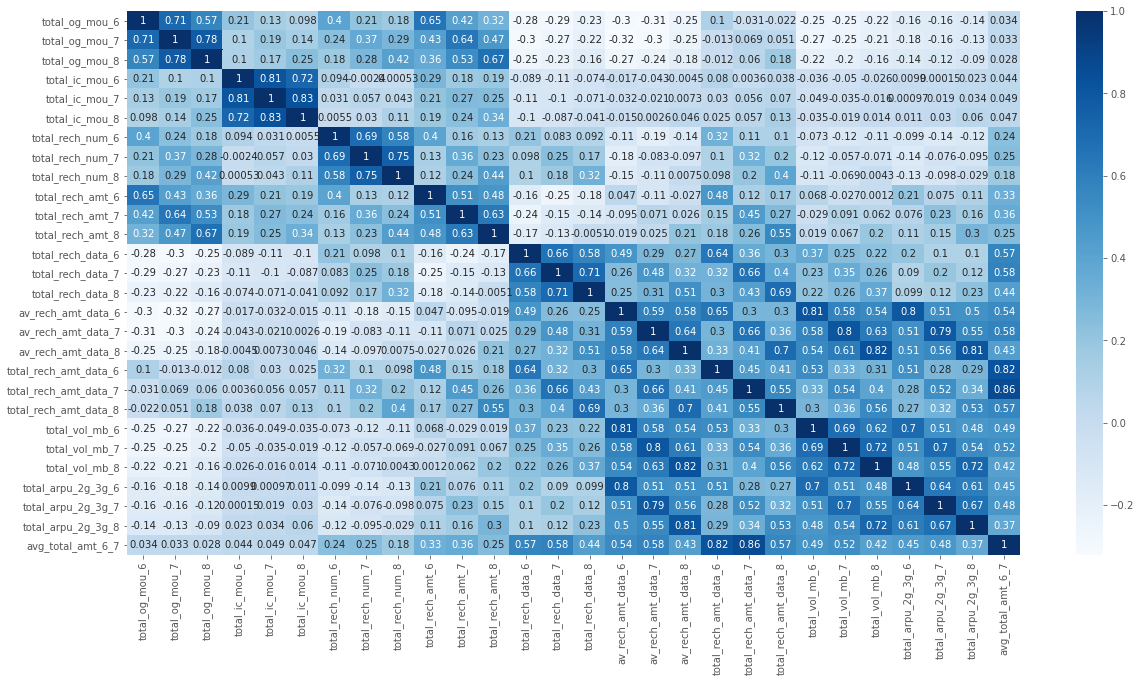

In [81]:
# lets check for correlation heatmap for total_av_col
plt.figure(figsize=[20,10])
sns.heatmap(telecom_data[total_av_col].corr(), annot=True, cmap='Blues')
plt.show()

#### Observations:
- total_ic_mou_6,total_ic_mou_7,total_ic_mou_8 are highly correlated and one of them can be dropped.
- 'av_rech_amt_data_6,av_rech_amt_data_8 are highly correalted, one of them can be dropped.
- total_rech_amt_data_6, total_rech_amt_data_6, avg_total_amt_6_7 are highly correlated, one of them can be dropped.

#### Let's analyse the volume variables

Plots for - vol_2g_mb_6


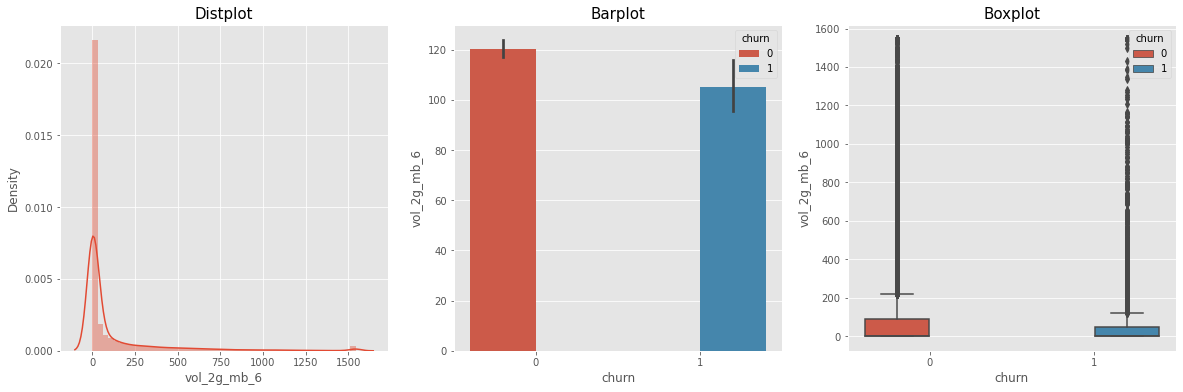

Plots for - vol_2g_mb_7


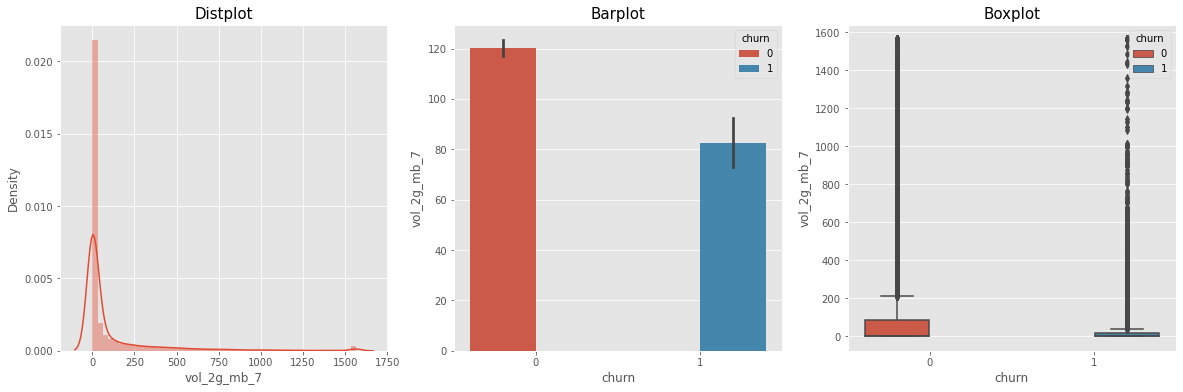

Plots for - vol_2g_mb_8


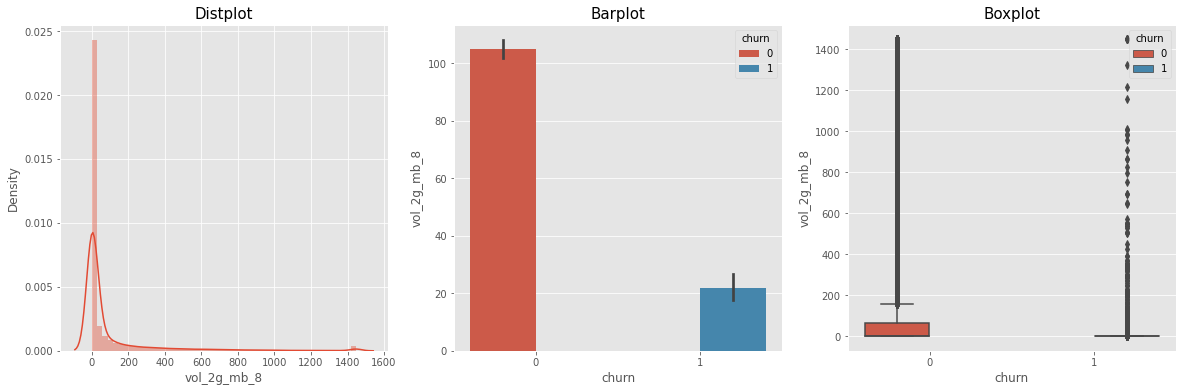

Plots for - vol_3g_mb_6


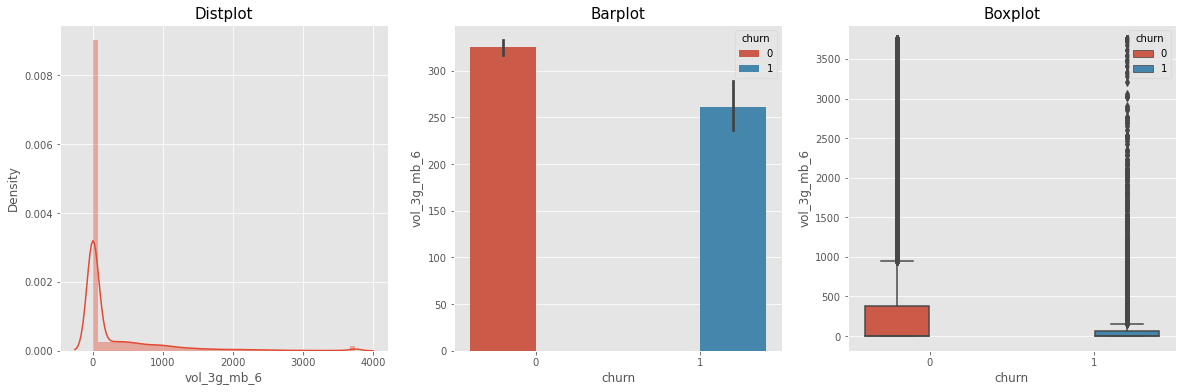

Plots for - vol_3g_mb_7


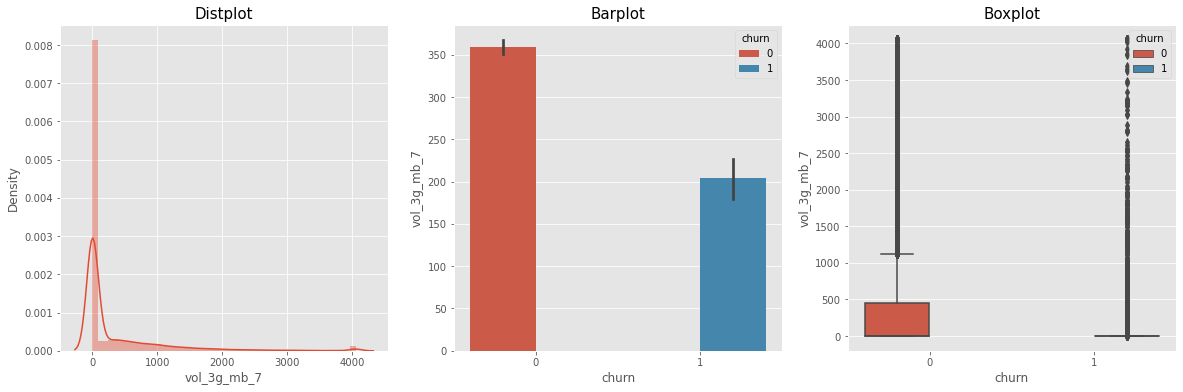

Plots for - vol_3g_mb_8


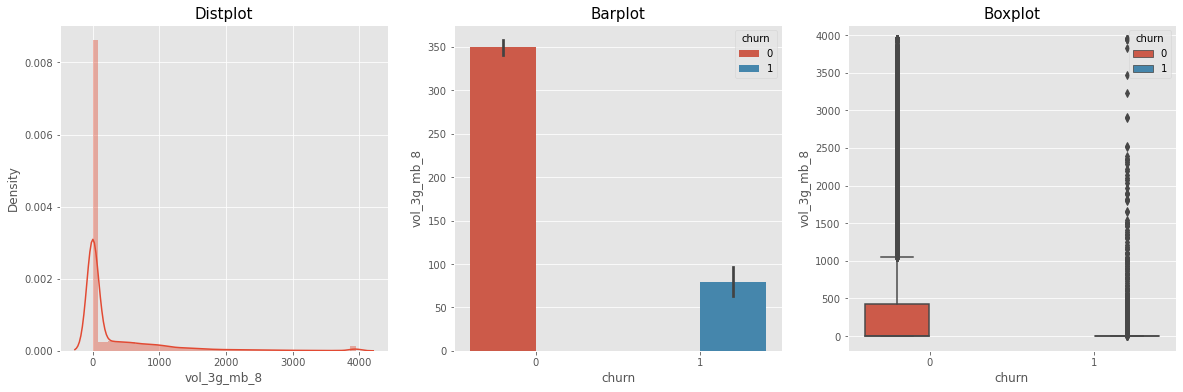

Plots for - total_vol_mb_6


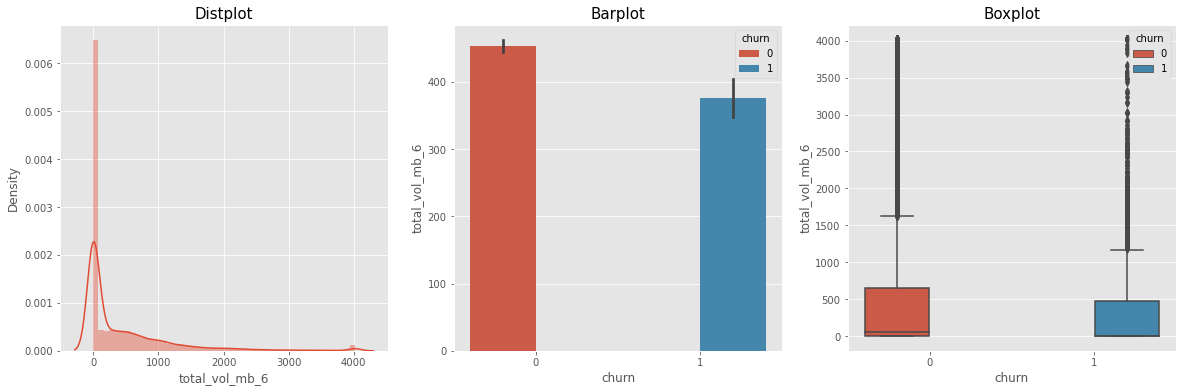

Plots for - total_vol_mb_7


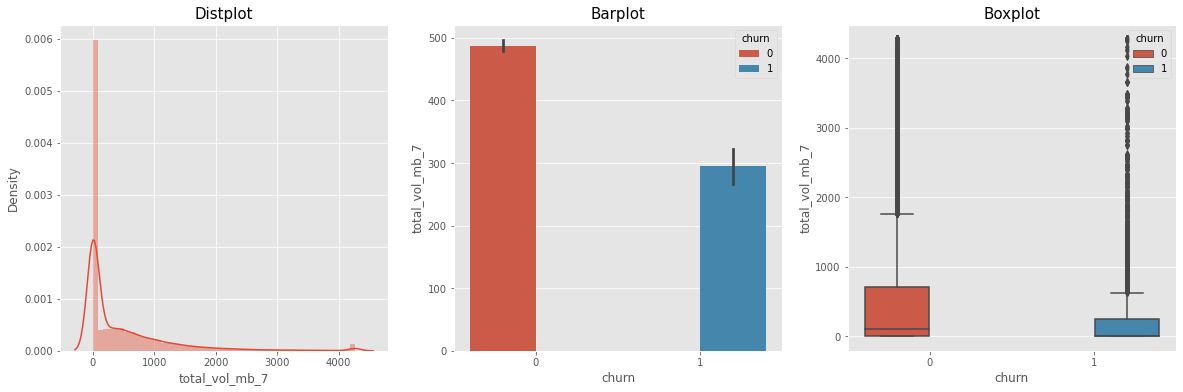

Plots for - total_vol_mb_8


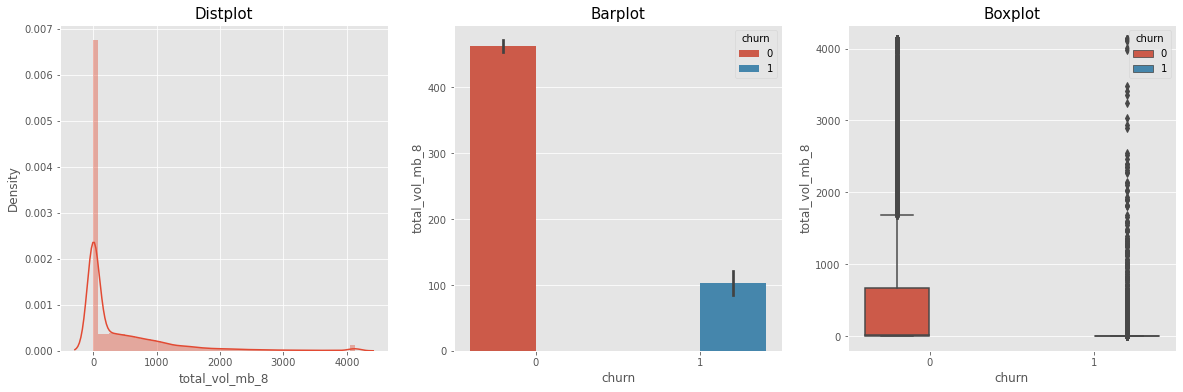

In [82]:
# Lets plot univariate for vol' variables in telecom data columns
vol_col = [col for col in telecom_data.columns if 'vol' in col ]

for col in vol_col:
    univariate_dist_bar_boxplot(col)

#### Observations:
- Most of the Non-Churners use good volumes of data, mb for 2g ,3g in 6,7,8 months.
- Most of the Churned customers do not use much volume,data ,mb for 2g & 3g in 6,7 and 8 months

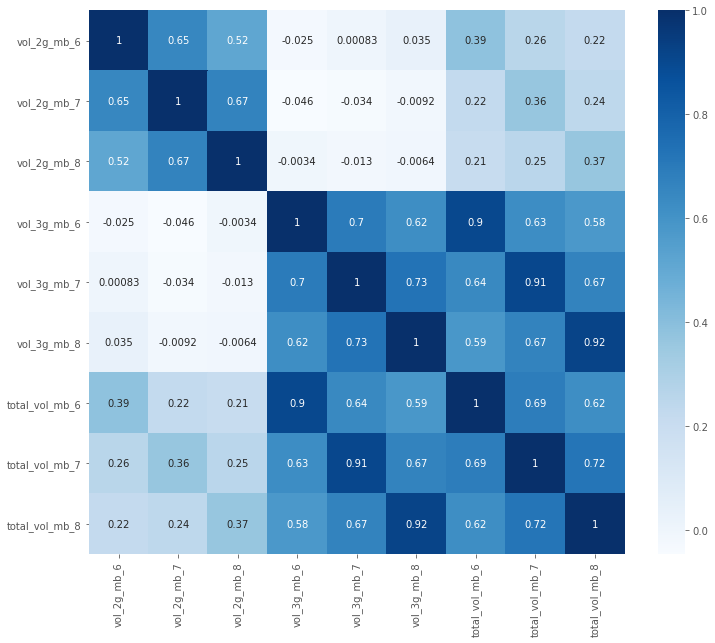

In [83]:
# lets check for correlation heatmap for volume columns
plt.figure(figsize=[12,10])
sns.heatmap(telecom_data[vol_col].corr(), annot=True, cmap='Blues')
plt.show()

#### Observations:
- Volume & totla_volume variables are higly correlated. One of the variables can be dropped,
    - vol_3g_mb_6, total_vol_mb_6,
    - vol_3g_mb_7, total_vol_mb_7, 
    - vol_3g_mb_8, total_vol_mb_8 

#### Let's analyse the 'arpu' variables

Plots for - arpu_6


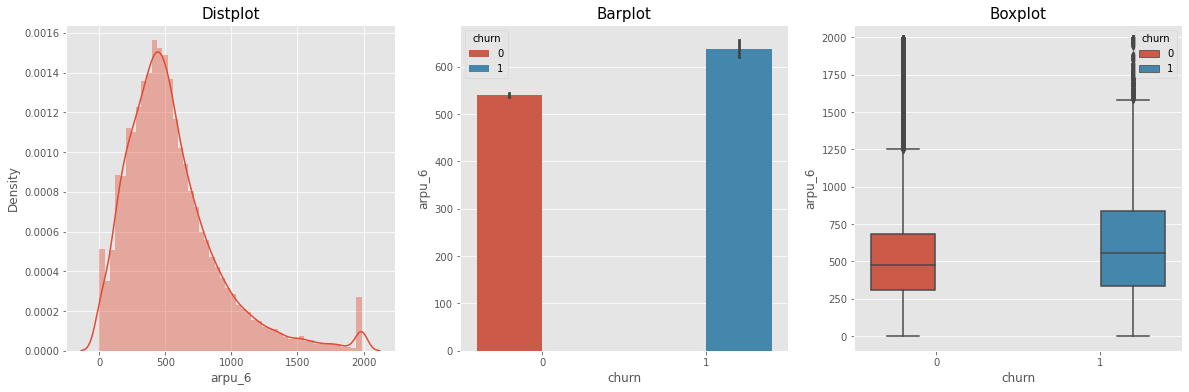

Plots for - arpu_7


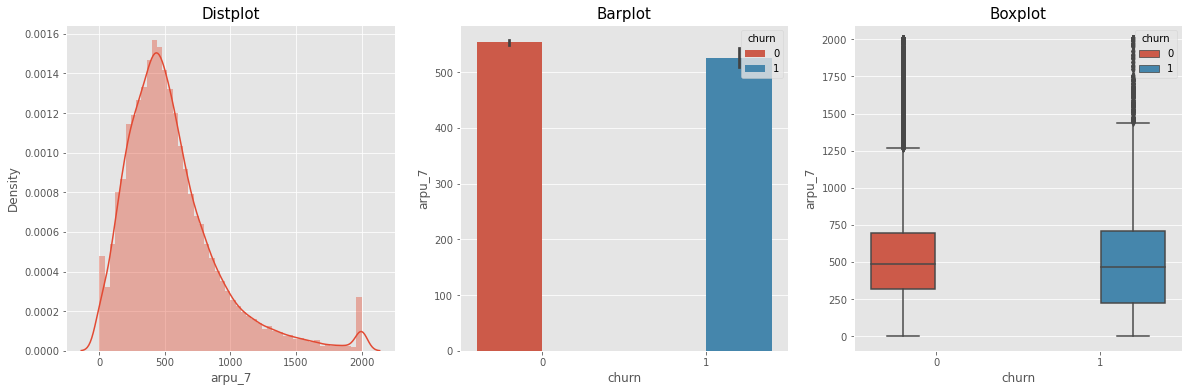

Plots for - arpu_8


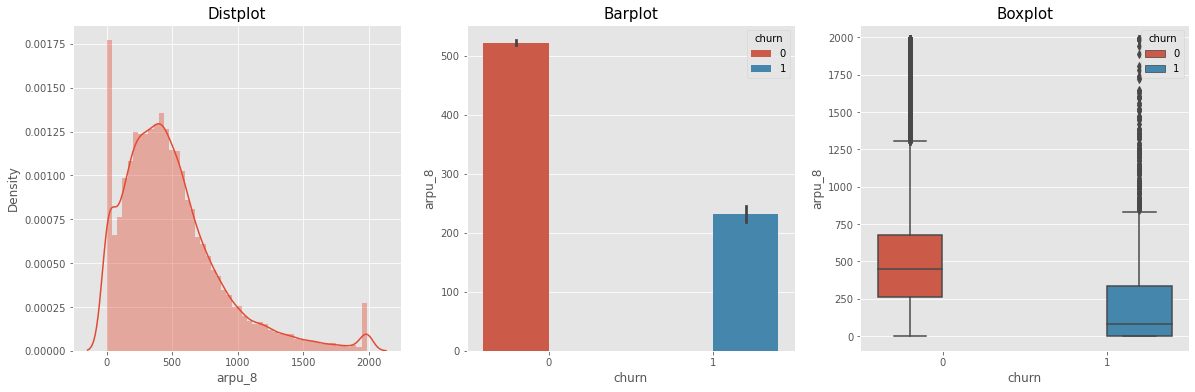

Plots for - arpu_3g_6


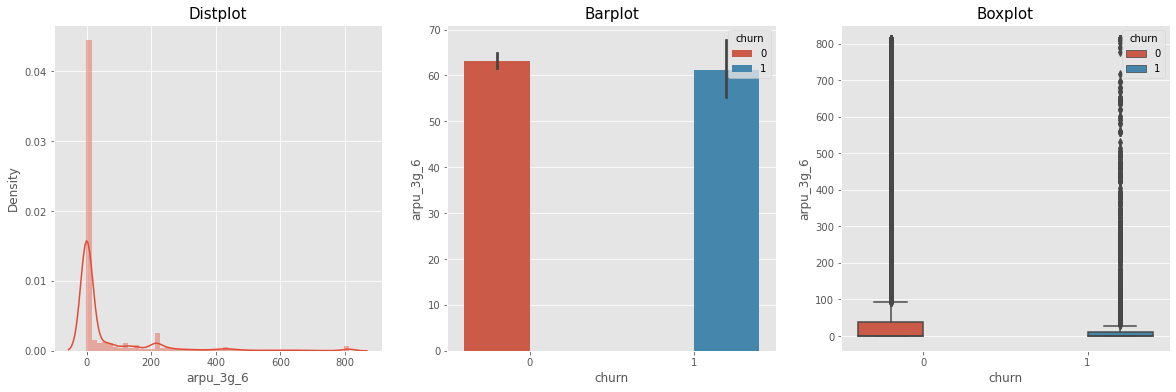

Plots for - arpu_3g_7


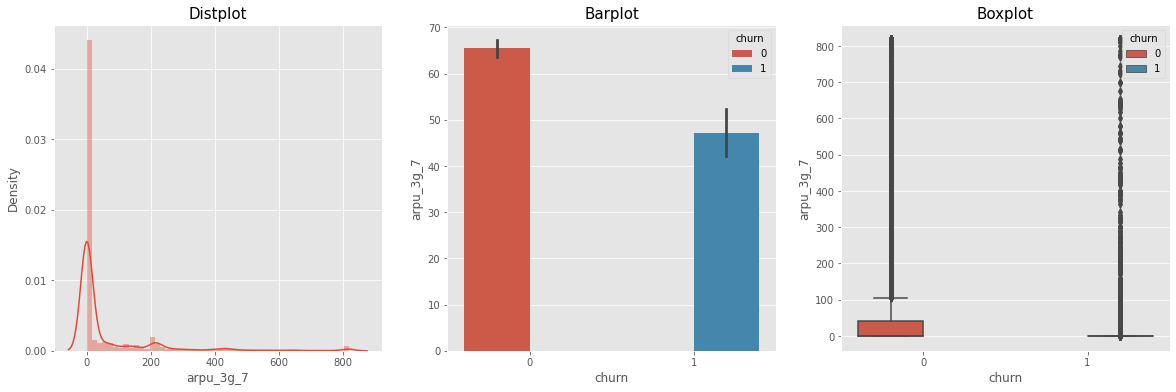

Plots for - arpu_3g_8


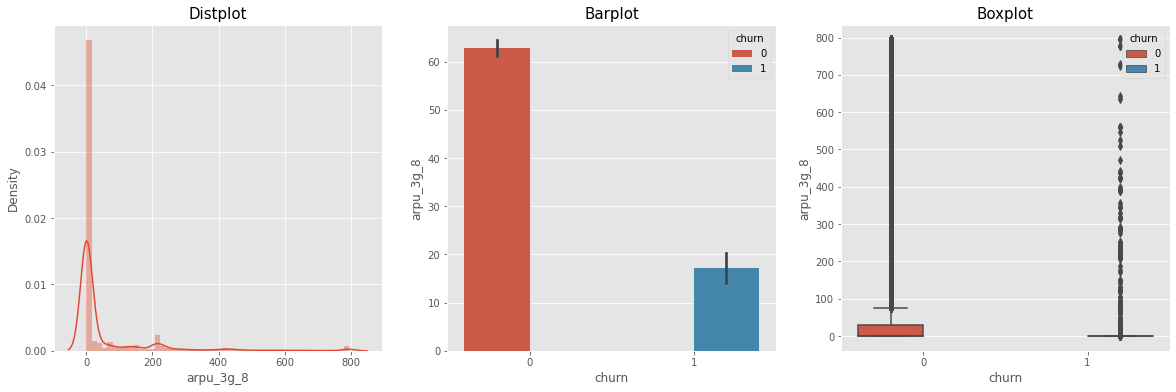

Plots for - arpu_2g_6


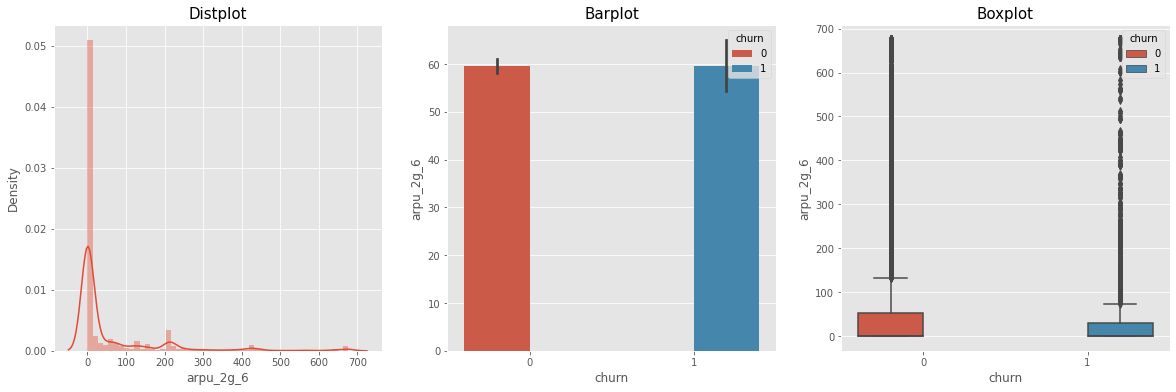

Plots for - arpu_2g_7


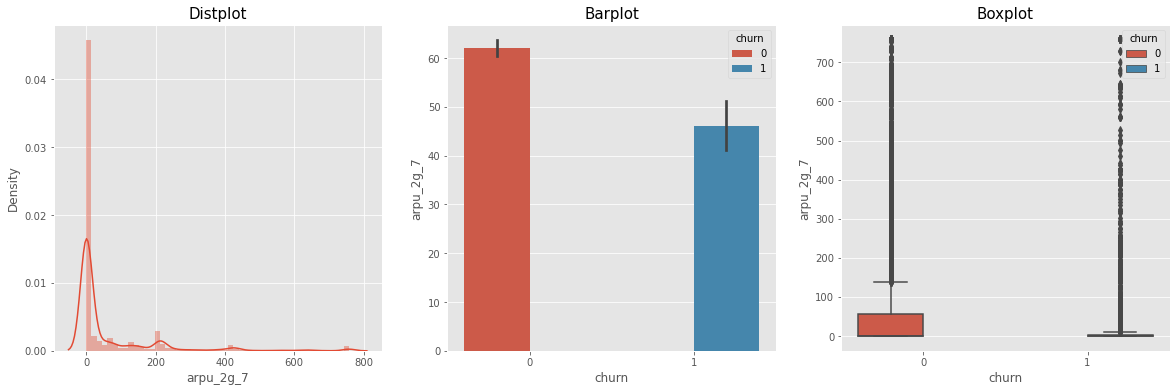

Plots for - arpu_2g_8


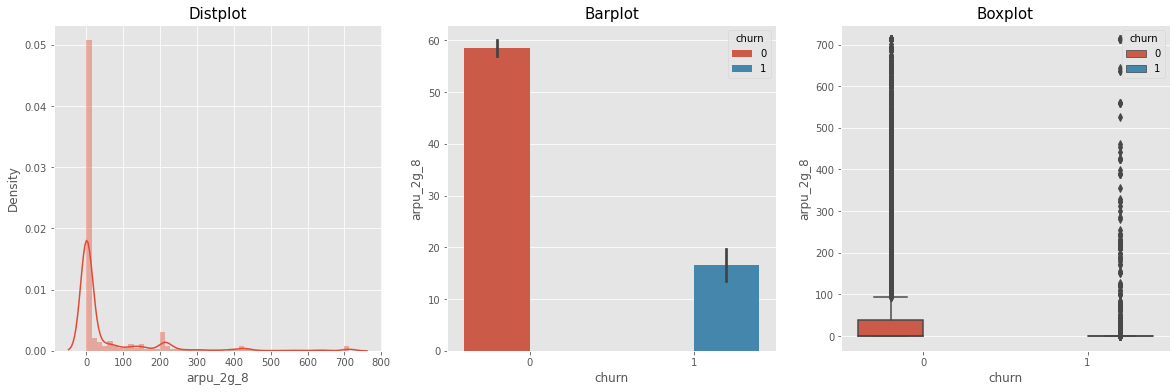

Plots for - total_arpu_2g_3g_6


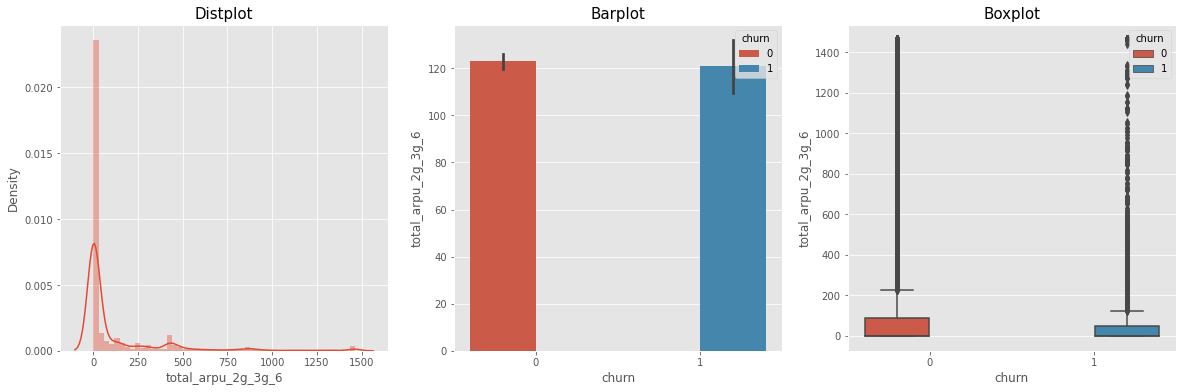

Plots for - total_arpu_2g_3g_7


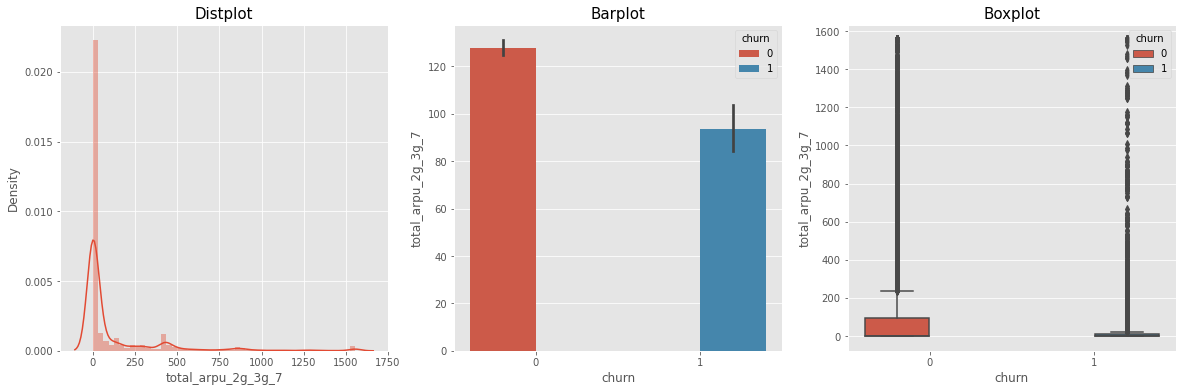

Plots for - total_arpu_2g_3g_8


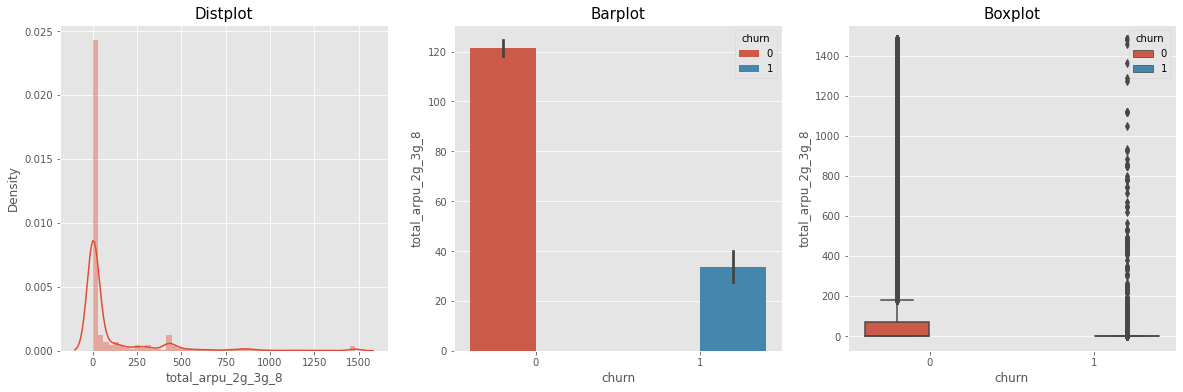

In [84]:
# Lets plot univariate for 'arpu'' variables in telecom data columns
arpu_col = [col for col in telecom_data.columns if 'arpu' in col ]

for col in arpu_col:
    univariate_dist_bar_boxplot(col)

#### Observations:
- Most of the churned customers have high 'arpu_6', 'arpu_2g_6'.

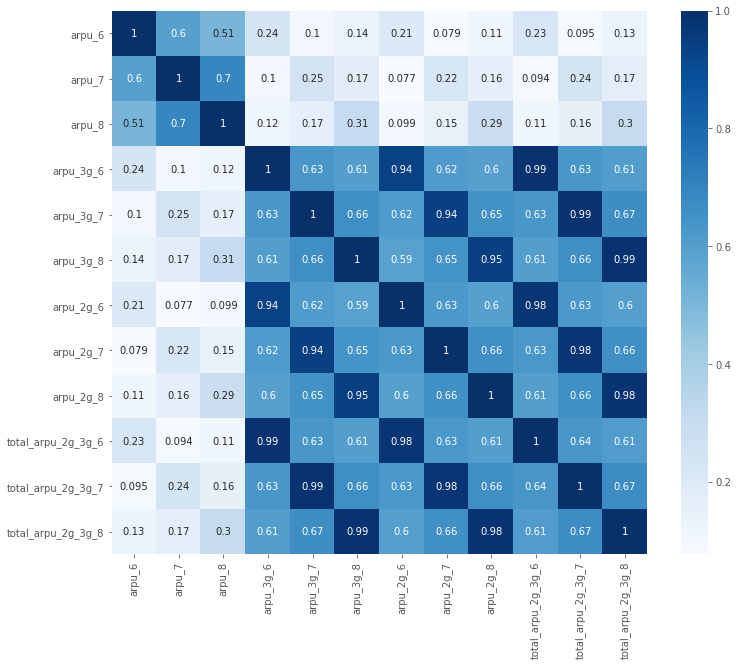

In [85]:
# lets check for correlation heatmap for arpu_2g and arpu_3g
plt.figure(figsize=[12,10])
sns.heatmap(telecom_data[arpu_col].corr(), annot=True, cmap='Blues')
plt.show()

#### Observations:
- Couple of variables are highly correlated and one of them can be dropped.

#### Let's analyse 'onnet' & 'offnet' variables

Plots for - onnet_mou_6


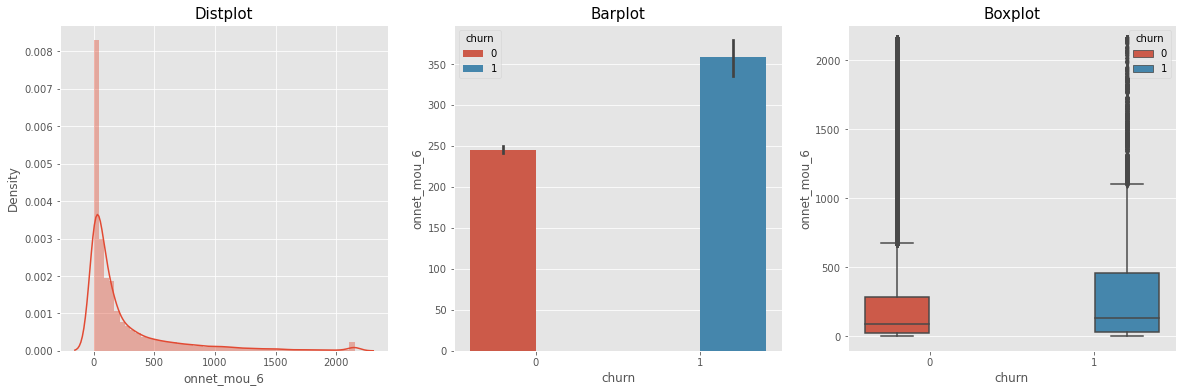

Plots for - onnet_mou_7


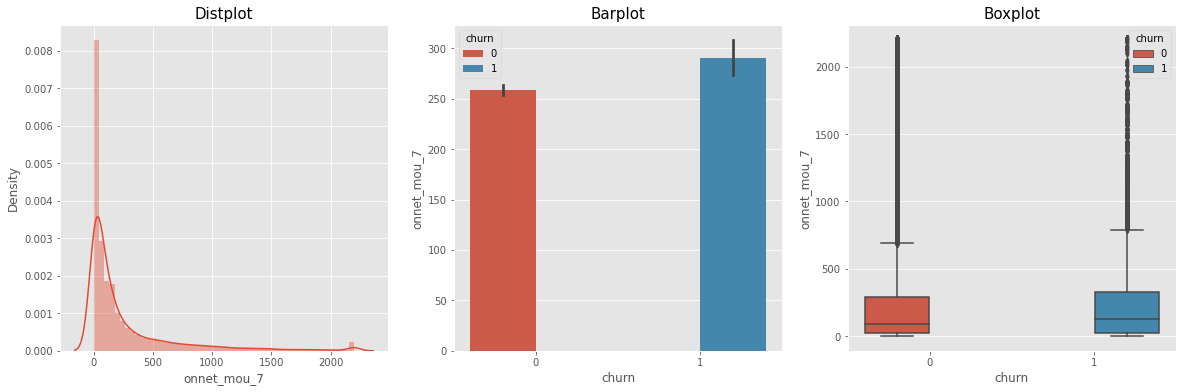

Plots for - onnet_mou_8


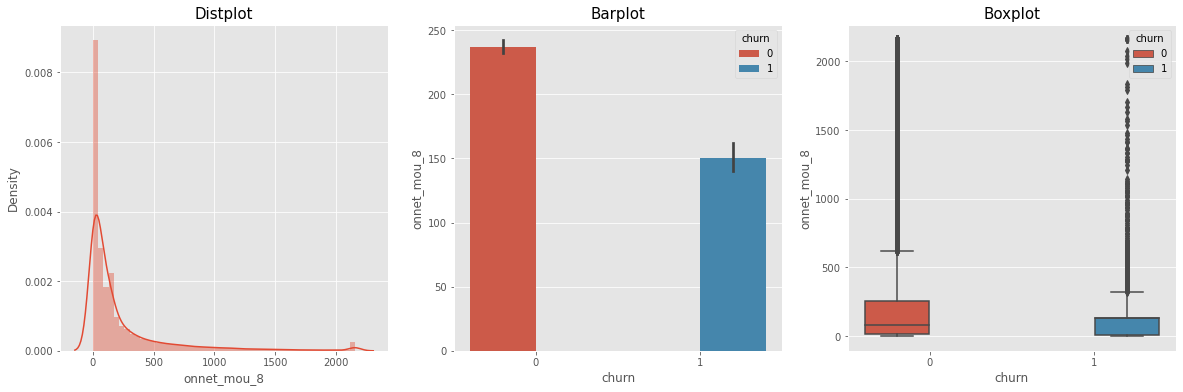

Plots for - offnet_mou_6


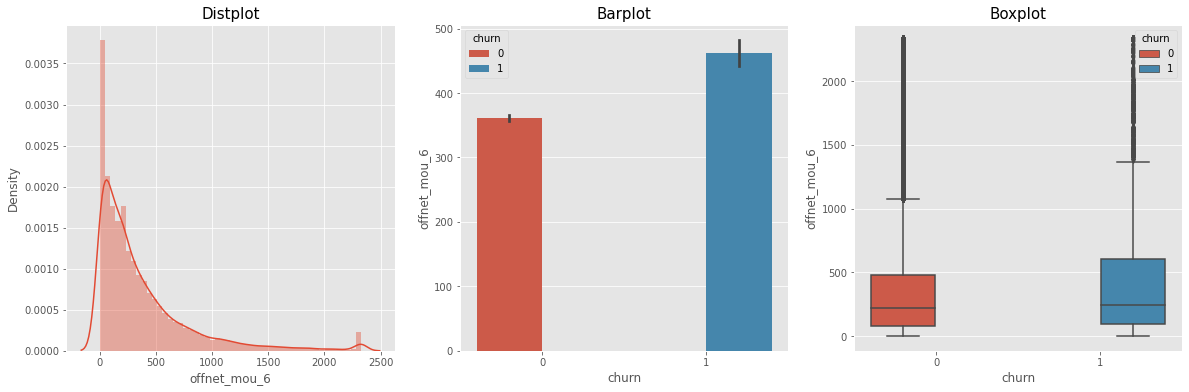

Plots for - offnet_mou_7


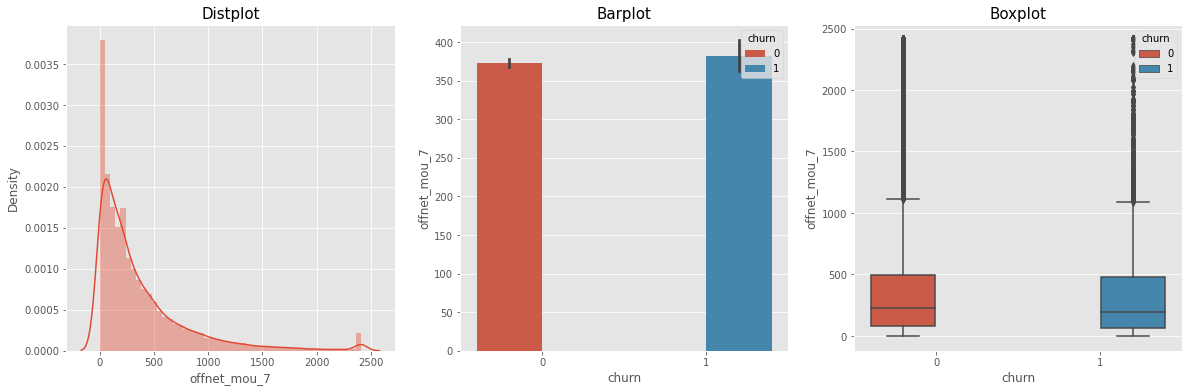

Plots for - offnet_mou_8


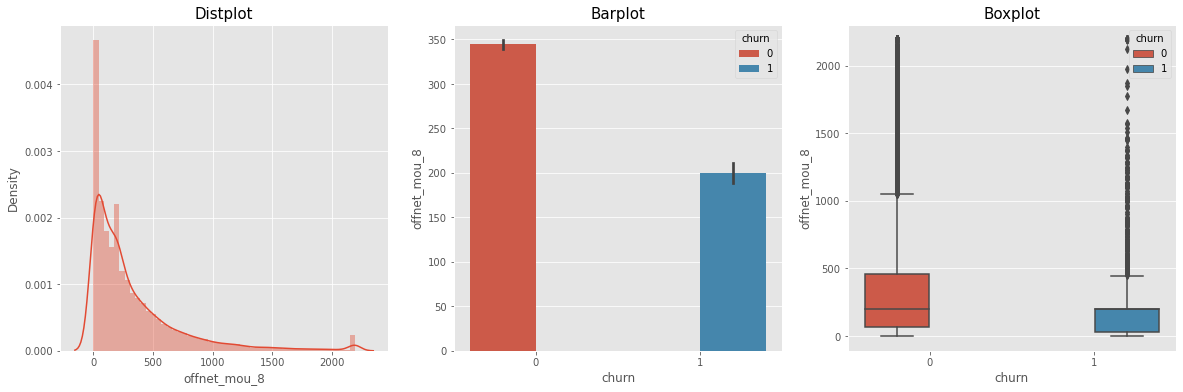

In [86]:
# Lets plot univariate for 'on & off' variables in telecom data columns
on_off_col = [col for col in telecom_data.columns if 'onnet' in col or 'offnet' in col] 

for col in on_off_col:
    univariate_dist_bar_boxplot(col)

#### Observations:
- Most of the churned customers consumed high onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7 variables.

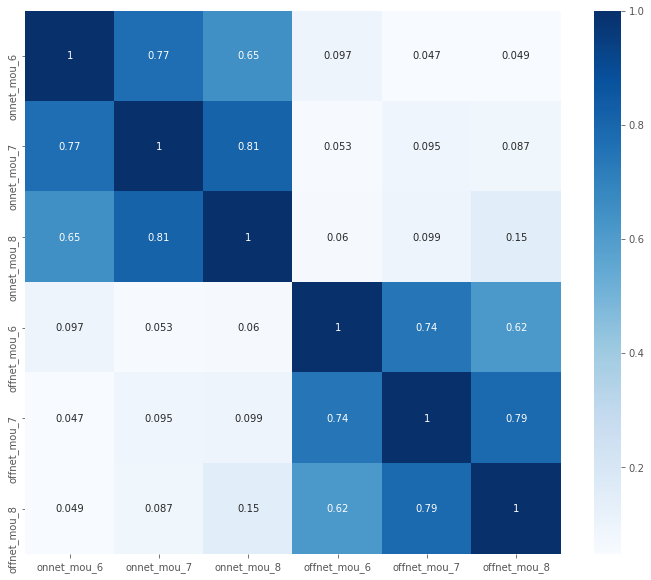

In [87]:
# lets check for correlation heatmap for on_off_col
plt.figure(figsize=[12,10])
sns.heatmap(telecom_data[on_off_col].corr(), annot=True, cmap='Blues')
plt.show()

#### Observations:
- No mutli-collinearity exists

#### Let's analyse the SACHET 

Plots for - sachet_2g_6


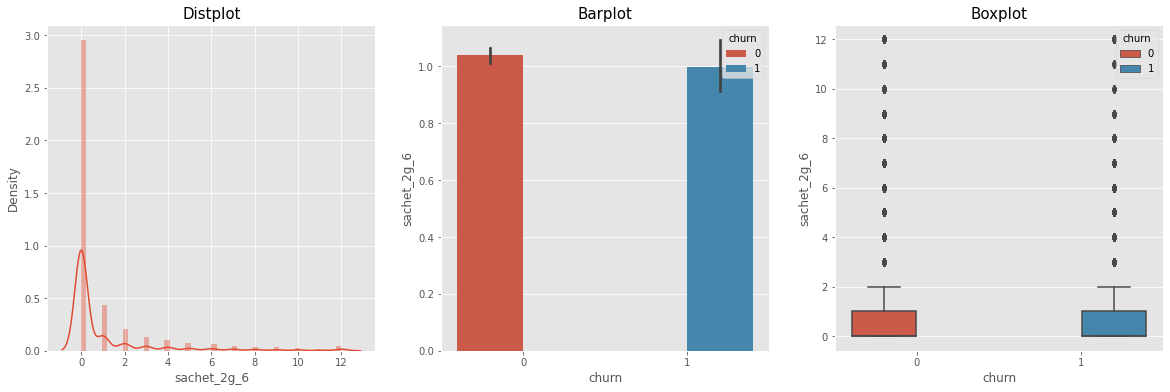

Plots for - sachet_2g_7


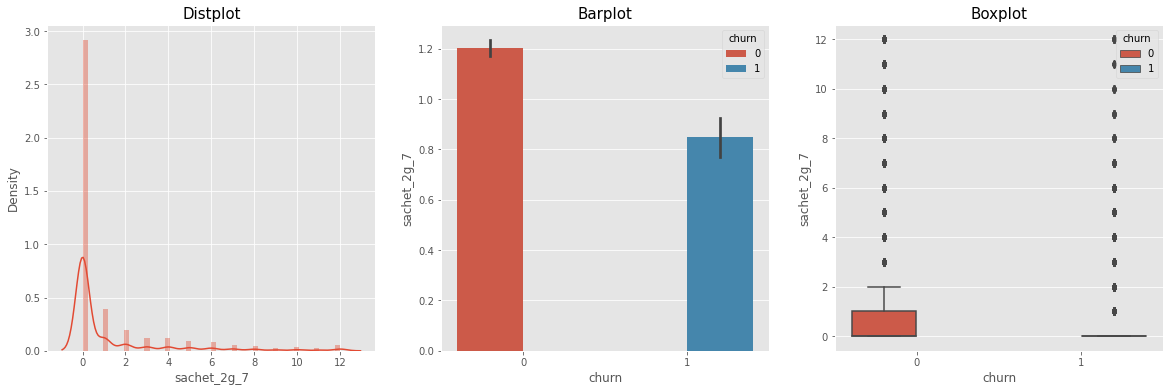

Plots for - sachet_2g_8


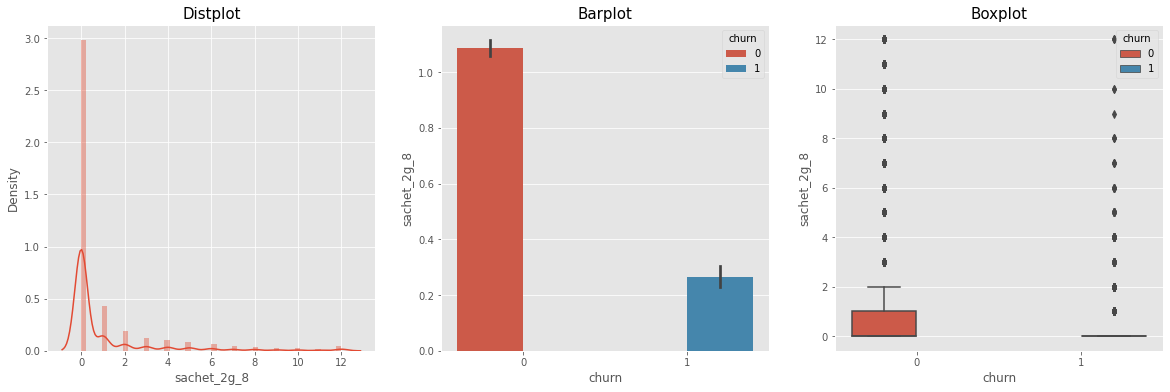

Plots for - sachet_3g_6


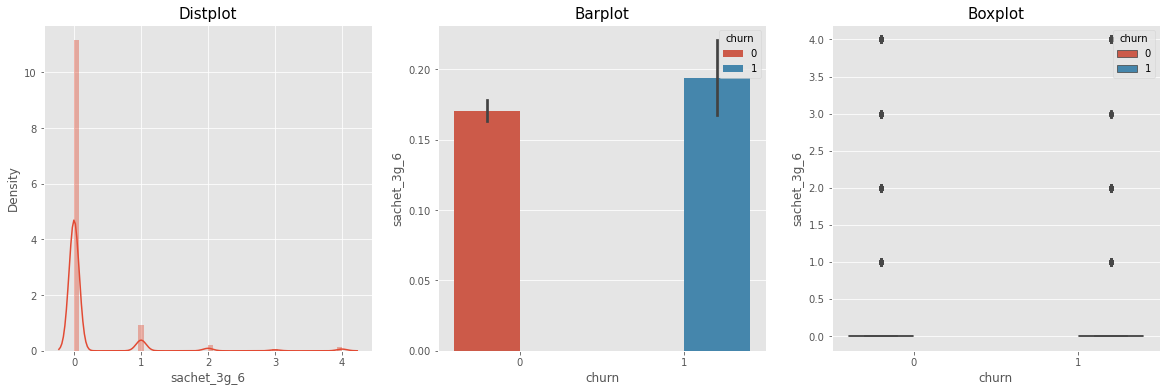

Plots for - sachet_3g_7


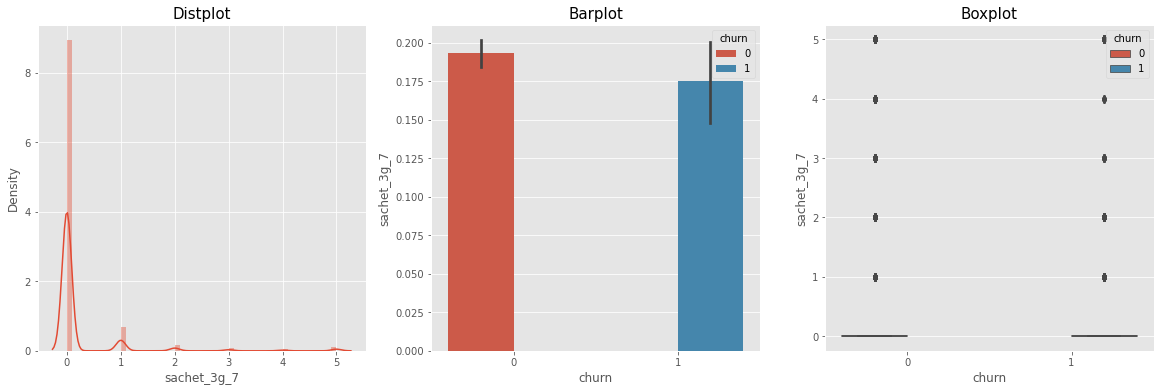

Plots for - sachet_3g_8


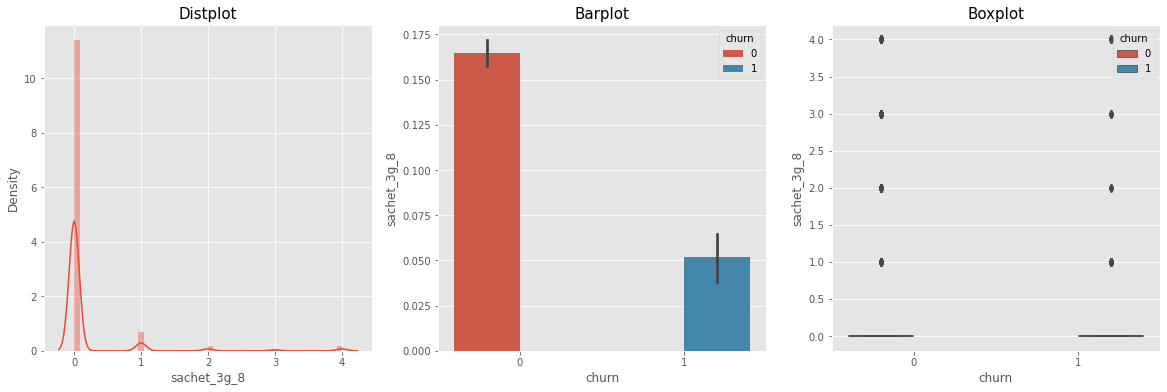

In [88]:
# Lets plot univariate for 'SACHET' variables in telecom data columns
sachet_col = [col for col in telecom_data.columns if 'sachet' in col] 

for col in sachet_col:
    univariate_dist_bar_boxplot(col)

#### Observations:
- Churned customers are utilised more 'sachet_3g_6'.

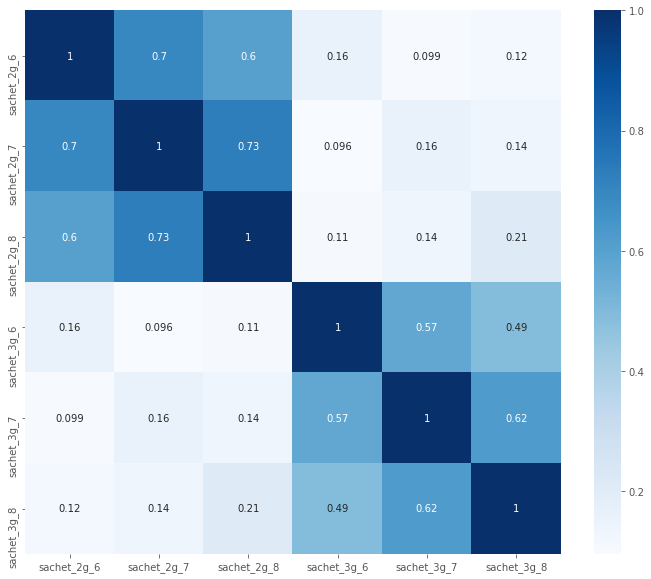

In [89]:
# lets check for correlation heatmap for sachet_col
plt.figure(figsize=[12,10])
sns.heatmap(telecom_data[sachet_col].corr(), annot=True, cmap='Blues')
plt.show()

#### Observations:
- No multi-Collinearity appears.

### Bivariate analysis 

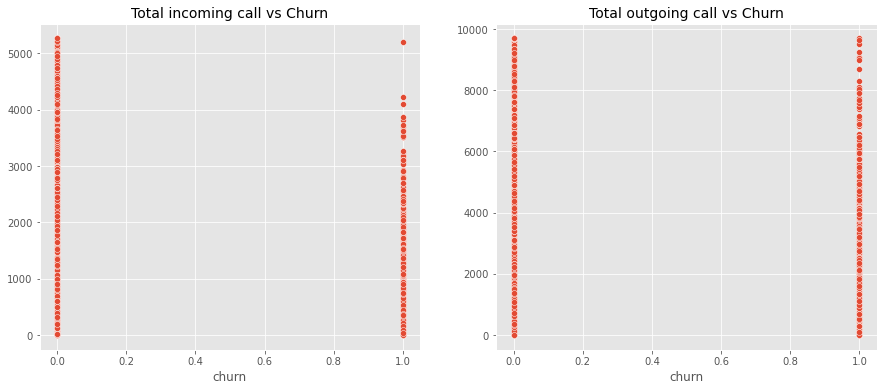

In [90]:
# Ploting graph for incoming, outgoing call with churn
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.scatterplot(x=telecom_data['churn'], y=telecom_data[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']].sum(axis=1))
plt.title('Total incoming call vs Churn', fontsize=14)

plt.subplot(1,2,2)
sns.scatterplot(x=telecom_data['churn'], y=telecom_data[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].sum(axis=1))
plt.title('Total outgoing call vs Churn', fontsize=14)
plt.show()

#### Observations:
- Churn rate is high for the chustomers with high outgoing calls and less incoming calls.

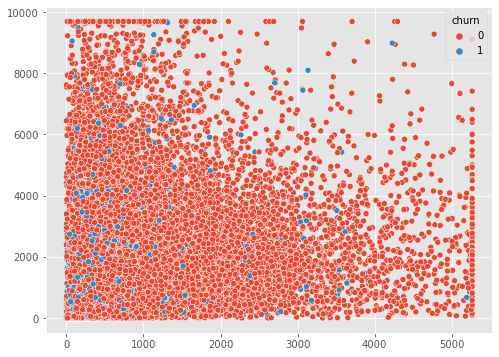

In [91]:
# plot the total incoming vs outgoing along with churn
plt.figure(figsize=[8,6])
sns.scatterplot(x=telecom_data[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']].sum(axis=1),
                y=telecom_data[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].sum(axis=1), hue=telecom_data.churn)
plt.show()


#### Observations:
- Data points for churned & not-Churned customers is scattered & no pattern observed.

Text(0.5, 1.0, 'Total MOU vs Churn')

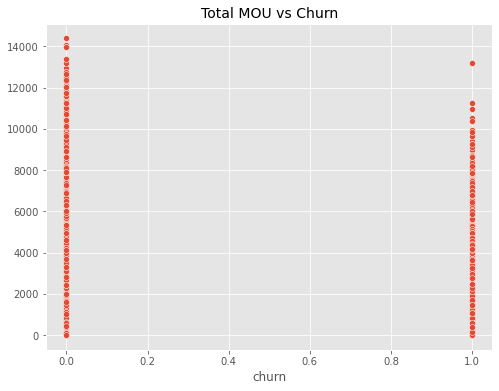

In [92]:
# Ploting graph for total minutes of usage with churn
plt.figure(figsize=[8,6])
sns.scatterplot(x=telecom_data['churn'], y=telecom_data[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
                                                           'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].sum(axis=1))
plt.title('Total MOU vs Churn', fontsize=14)

- Clearly, we can see that Churn rate is more where the MOUs are less for both Incomming and Outgoing calls

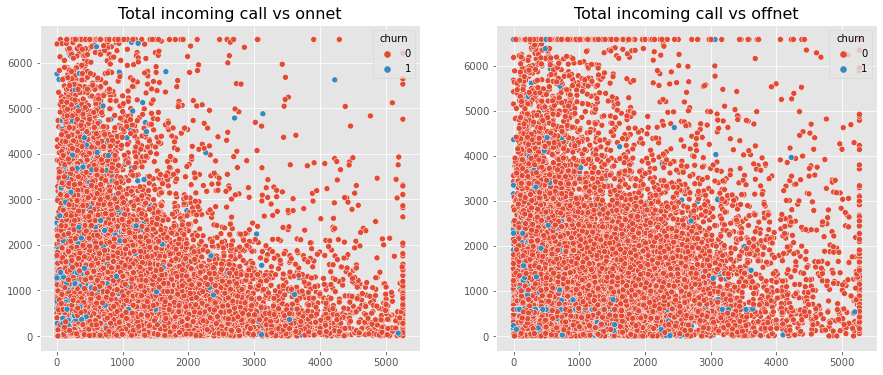

In [93]:
# compare incoming calls with onnet and offnet calls
# scatterplot
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.scatterplot(x=telecom_data[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']].sum(axis=1),
                y=telecom_data[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']].sum(axis=1), hue=telecom_data.churn)
plt.title('Total incoming call vs onnet', fontsize=16)

plt.subplot(1,2,2)
sns.scatterplot(x=telecom_data[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']].sum(axis=1),
                y=telecom_data[['offnet_mou_8', 'offnet_mou_8', 'offnet_mou_8']].sum(axis=1), hue=telecom_data.churn)
plt.title('Total incoming call vs offnet', fontsize=16)
plt.show()

#### Observations:
Churners are scattered and churn rate is high based on total incoming calls on onnet when compared to offnet toal incoming calls

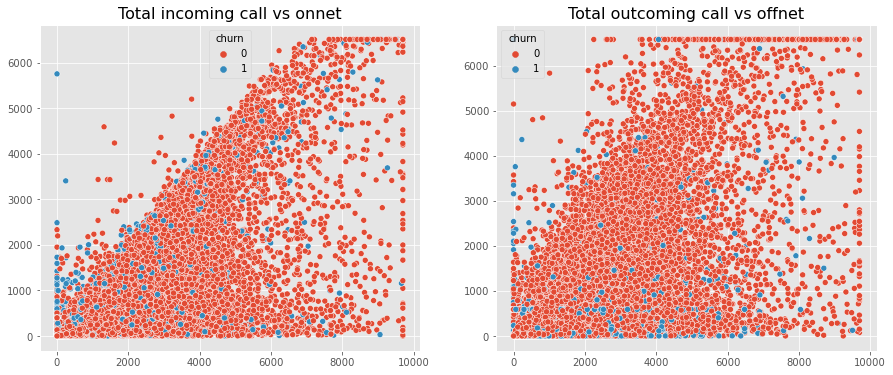

In [94]:
# compare outcoming calls with onnet and offnet calls
# scatterplot
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.scatterplot(x=telecom_data[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].sum(axis=1),
                y=telecom_data[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']].sum(axis=1), hue=telecom_data.churn)
plt.title('Total incoming call vs onnet', fontsize=16)

plt.subplot(1,2,2)
sns.scatterplot(x=telecom_data[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].sum(axis=1),
                y=telecom_data[['offnet_mou_8', 'offnet_mou_8', 'offnet_mou_8']].sum(axis=1), hue=telecom_data.churn)
plt.title('Total outcoming call vs offnet', fontsize=16)
plt.show()

#### observations:
Churn rate follows a positively increasing trend with increase in total outgoing calls on onnet when compared offnet calls

## 6. Model Building

#### Divide the data into X & y variables

In [95]:
# Let's divide the data into target = 'churn'  and predictors to 'X' variable and drop 'mobile_number' & 'churn' variables

X = telecom_data.drop(['mobile_number','churn'] , axis = 1)
y = telecom_data['churn']

#### Split the data into train & test sets

In [96]:
# importing train_test_split library from sklearn package 
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [97]:
# Lets check the shape of train & test sets
print("x_train shape is :" , X_train.shape)
print("y_train shape is :" , y_train.shape)
print("x_test shape is :" , X_test.shape)
print("y_test shape is :" , y_test.shape)

x_train shape is : (21000, 108)
y_train shape is : (21000,)
x_test shape is : (9001, 108)
y_test shape is : (9001,)


#### Feature scaling using Standard Scaler

In [98]:
# Lets scale the features in x_train & x_test using standard scaler

# import the StandardScaler from sklearn library
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler Object
scaler = StandardScaler()

# Creating a list of continuous features
num_cols = X_train.columns

# Fit transform the scaler on the continous features
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Lets transform x_test features
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Checking the head of x_train
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
39186  1.507168  0.990151  0.244555    -0.620014    -0.606309    -0.577648   
39833 -0.099874 -0.667632 -0.352147    -0.272530    -0.506643    -0.485573   
38778 -0.703005 -0.660494 -0.484595    -0.461150    -0.441295    -0.376299   
43026  1.924553 -0.634216  0.539168     4.737164    -0.228461     1.200199   
12271 -0.311549 -0.263592 -0.613082    -0.590208    -0.515948    -0.528749   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
39186     -0.504952     -0.485095     -0.577888       0.303890       0.426028   
39833     -0.112831     -0.330890     -0.165602      -0.277867      -0.253500   
38778     -0.084705     -0.171898     -0.293882       0.078299       0.824161   
43026      0.231958     -0.390891      0.547936      -0.277867       0.759929   
12271     -0.424003     -0.163628     -0.618291      -0.277867      -0.253500   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
39186       0.548761      -0.212805      -0.043216      -0.108925   
39833      -0.258306      -0.290404      -0.270695      -0.272583   
38778       1.516412       0.000624       0.066726       1.000336   
43026       0.333440      -0.290404       0.259403       0.118471   
12271      -0.258306      -0.290404      -0.270695      -0.272583   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
39186     -0.680234     -0.661517     -0.678327     -0.610255     -0.596811   
39833      0.313932     -0.109733      0.173010     -0.411564     -0.536995   
38778     -0.049830     -0.041806     -0.258715     -0.352013     -0.414179   
43026      0.191671     -0.157030      2.524779      3.939814     -0.386380   
12271     -0.155278      0.243188     -0.454200     -0.607403     -0.585898   

       std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
39186     -0.542903      8.626003      8.333527      8.741986     -0.479640   
39833     -0.531609     -0.160789     -0.161713     -0.159183     -0.479640   
38778     -0.444047     -0.160789     -0.125204     -0.159183     -0.479640   
43026     -0.187259     -0.160789     -0.161713     -0.159183      2.369537   
12271     -0.545488     -0.160789     -0.161713     -0.159183     -0.246817   

       spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
39186      0.162727     -0.414720    -0.384096    -0.152961      -0.2135   
39833      0.787982     -0.508213    -0.384096    -0.152961      -0.2135   
38778     -0.508871     -0.508213    -0.384096    -0.152961      -0.2135   
43026     -0.508871      0.742045    -0.384096    -0.152961      -0.2135   
12271     -0.188389     -0.380722     1.330153    -0.152961      -0.2135   

       total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  \
39186       -0.704512       -0.706321       -0.706473     -0.268955   
39833       -0.210246       -0.517627       -0.370138      0.126980   
38778       -0.346044       -0.401247       -0.506193     -0.473929   
43026        3.540382       -0.433133        1.086380     -0.181391   
12271       -0.613021       -0.407715       -0.684344      1.015894   

       loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  \
39186     -0.169382     -0.265357     -0.295178     -0.126739      0.211332   
39833      0.191403      0.260090      0.451815      0.030314     -0.218805   
38778     -0.232635     -0.092481     -0.111257     -0.007657      0.358247   
43026      0.518725      4.659459      6.007182      0.907477     -0.252821   
12271      0.809283      0.981746     -0.477908     -0.488704     -0.490445   

       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  \
39186        0.466973        0.203738       -0.020668     -0.438896   
39833        0.370978        0.160211        0.149476     -0.438896   
38778       -0.469191       -0.197272        0.069643     -0.438896   
43026        4.102096        0.635152        

### Handling Multi-Collinearity

#### Dropping the highly correlated variables

In [99]:
# Check the top correlated variables with correlation coefficinet above 0.8

corr_1 = X_train.corr()
corr_df1 = corr_1.where(np.triu(np.ones(corr_1.shape),k = 1).astype(np.bool))
corr_df1 = corr_df1.unstack().reset_index()
corr_df1.columns = ['Var1','Var2','Correlation_Value']
corr_df1.dropna(subset = ['Correlation_Value'],inplace = True)
corr_df1['Correlation_Value'] = round(corr_df1['Correlation_Value'],2).abs()
corr_df1.sort_values('Correlation_Value', ascending = False).head(55)


Var1                   Var2  Correlation_Value
11307  total_arpu_2g_3g_6              arpu_3g_6               0.99
11416  total_arpu_2g_3g_7              arpu_3g_7               0.99
11525  total_arpu_2g_3g_8              arpu_3g_8               0.99
11310  total_arpu_2g_3g_6              arpu_2g_6               0.98
11419  total_arpu_2g_3g_7              arpu_2g_7               0.98
11528  total_arpu_2g_3g_8              arpu_2g_8               0.98
8717            arpu_2g_8              arpu_3g_8               0.95
8608            arpu_2g_7              arpu_3g_7               0.94
8499            arpu_2g_6              arpu_3g_6               0.94
6050     total_rech_amt_8                 arpu_8               0.94
5832     total_rech_amt_6                 arpu_6               0.94
5941     total_rech_amt_7                 arpu_7               0.93
11198      total_vol_mb_8            vol_3g_mb_8               0.92
9353          sachet_2g_8      total_rech_data_8               0.91
9135          sachet_2g_6      total_rech_data_6               0.91
4245       total_ic_mou_6           loc_ic_mou_6               0.91
9244          sachet_2g_7      total_rech_data_7               0.91
11089      total_vol_mb_7            vol_3g_mb_7               0.91
4463       total_ic_mou_8           loc_ic_mou_8               0.90
4354       total_ic_mou_7           loc_ic_mou_7               0.90
10980      total_vol_mb_6            vol_3g_mb_6               0.90
9692         monthly_3g_8              arpu_2g_8               0.88
11428  total_arpu_2g_3g_7           monthly_3g_7               0.88
9474         monthly_3g_6              arpu_2g_6               0.88
11537  total_arpu_2g_3g_8           monthly_3g_8               0.88
11319  total_arpu_2g_3g_6           monthly_3g_6               0.88
9583         monthly_3g_7              arpu_2g_7               0.87
9580         monthly_3g_7              arpu_3g_7               0.87
9471         monthly_3g_6              arpu_3g_6               0.87
9689         monthly_3g_8              arpu_3g_8               0.87
11655   avg_total_amt_6_7  total_rech_amt_data_7               0.87
3814         loc_ic_mou_8           loc_ic_mou_7               0.85
1852         loc_og_mou_8           loc_og_mou_7               0.85
3705         loc_ic_mou_7           loc_ic_mou_6               0.84
3367       total_og_mou_7           std_og_mou_7               0.84
4468       total_ic_mou_8         total_ic_mou_7               0.84
11192      total_vol_mb_8     av_rech_amt_data_8               0.83
3476       total_og_mou_8           std_og_mou_8               0.83
1743         loc_og_mou_7           loc_og_mou_6               0.83
11654   avg_total_amt_6_7  total_rech_amt_data_6               0.82
3258       total_og_mou_6           std_og_mou_6               0.82
2179         std_og_mou_8           std_og_mou_7               0.81
10974      total_vol_mb_6     av_rech_amt_data_6               0.81
1414        roam_og_mou_7          roam_ic_mou_7               0.81
4359       total_ic_mou_7         total_ic_mou_6               0.81
544           onnet_mou_8            onnet_mou_7               0.81
11083      total_vol_mb_7     av_rech_amt_data_7               0.81
11516  total_arpu_2g_3g_8     av_rech_amt_data_8               0.81
8490            arpu_2g_6     av_rech_amt_data_6               0.80
8708            arpu_2g_8     av_rech_amt_data_8               0.80
1523        roam_og_mou_8          roam_ic_mou_8               0.80
11298  total_arpu_2g_3g_6     av_rech_amt_data_6               0.80
8384            arpu_3g_8     av_rech_amt_data_8               0.79
11407  total_arpu_2g_3g_7     av_rech_amt_data_7               0.79
8060          vol_3g_mb_8     av_rech_amt_data_8               0.79

In [100]:
# Lets create a list of highly correlated variables to a list & drop them
var1_list = corr_df1[corr_df1['Correlation_Value'] >= 0.8]['Var1'].to_list()
var2_list = corr_df1[corr_df1['Correlation_Value'] >= 0.8]['Var2'].to_list()

# Let's create a list of highly correlated variables present in Vaar1 & not in Var2 to a list 'cols_to_drop'

cols_to_drop = []
for i  in var1_list:
    if i not in var2_list:
        if i not in cols_to_drop:
            cols_to_drop.append(i)
        
print("Variables with above 0.8 multi-correaltion value are :" , cols_to_drop)
print("\n")
print("Count of variables to be dropped is :" , len(cols_to_drop))

Variables with above 0.8 multi-correaltion value are : ['onnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'total_vol_mb_6', 'total_vol_mb_7', 'total_vol_mb_8', 'total_arpu_2g_3g_6', 'total_arpu_2g_3g_7', 'total_arpu_2g_3g_8', 'avg_total_amt_6_7']


Count of variables to be dropped is : 21


In [101]:
# Lets drop the highly correaled variables from x_train & x_test
X_train = X_train.drop(cols_to_drop, axis = 1)
X_test = X_test.drop(cols_to_drop, axis = 1)

In [102]:
# Checking the shape of x_train & x_test
print("x_train shape is :" , X_train.shape)
print("x_test shape is :" , X_test.shape)

x_train shape is : (21000, 87)
x_test shape is : (9001, 87)


### Data Imbalance Handling

Smote helps us to balance the data, so lets implement SMOTE method to balance churn variable

In [103]:
# imporint SMOTE from imblearn
#from imblearn import under_sampling, over_sampling 
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE object
sm = SMOTE(random_state = 50)
X_train, y_train = sm.fit_resample(X_train, y_train)

### 6.1 Model Building  - Logistic Regression Model (without PCA)

#### Model 1 : Logistic Regression using RFE to fetch Important Features

In [104]:
# Running model using stats model 
import statsmodels.api as sm

# Build first logistic regression model
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38530
Model Family:                Binomial   Df Model:                           87
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13684.
Date:                Wed, 01 Dec 2021   Deviance:                       27367.
Time:                        00:24:45   Pearson chi2:                 7.76e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.9865      0.033    -59.945      0.000      -2.051      -1.922
arpu_6                    0.1103      0.047      2.352      0.019       0.018       0.202
arpu_7                    0.2970      0.048      6.200      0.000       0.203       0.391
arpu_8                  6.43e-05      0.053      0.001      0.999      -0.104       0.104
onnet_mou_6               0.0998      0.089      1.119      0.263      -0.075       0.274
onnet_mou_7               0.0933      0.080      1.159      0.247      -0.064       0.251
offnet_mou_6             -0.0321      0.096     -0.335      0.737      -0.219       0.155
offnet_mou_7              0.4798      0.090      5.331      0.000       0.303       0.656
offnet_mou_8             -0.4286      0.044     -9.685      0.000      -0.515      -0.342
roam_ic_mou_6            -0.0300      0.028     -1.078      0.281      -0.084       0.025
roam_ic_mou_7             0.0635      0.024      2.622      0.009       0.016       0.111
roam_ic_mou_8             0.1471      0.020      7.298      0.000       0.108       0.187
roam_og_mou_6             0.0343      0.031      1.093      0.274      -0.027       0.096
loc_og_mou_6             -0.1120      0.085     -1.317      0.188      -0.279       0.055
loc_og_mou_7             -0.4533      0.073     -6.229      0.000      -0.596      -0.311
std_og_mou_6              0.0383      0.116      0.329      0.742      -0.190       0.267
std_og_mou_7             -0.0689      0.104     -0.660      0.509      -0.274       0.136
std_og_mou_8             -0.3997      0.042     -9.497      0.000      -0.482      -0.317
isd_og_mou_6             -0.0700      0.023     -3.007      0.003      -0.116      -0.024
isd_og_mou_7              0.0064      0.025      0.255      0.798      -0.043       0.056
isd_og_mou_8              0.0116      0.024      0.478      0.633      -0.036       0.059
spl_og_mou_6             -0.0502      0.020     -2.509      0.012      -0.089      -0.011
spl_og_mou_7              0.0342      0.021      1.599      0.110      -0.008       0.076
spl_og_mou_8             -0.0076      0.023     -0.336      0.737      -0.052       0.037
og_others_6              -0.1608      0.019     -8.528      0.000      -0.198      -0.124
og_others_7              -0.0119      0.019     -0.634      0.526      -0.049       0.025
og_others_8               0.7744      0.019     40.509      0.000       0.737       0.812
loc_ic_mou_6              0.7268      0.097      7.465      0.000       0.536       0.918
loc_ic_mou_7              0.2853      0.108      2.639      0.008       0.073       0.497
loc_ic_mou_8             -1.6965      0.061    -27.788      0.000      -1.816      -1.577
std_ic_mou_6              0.2256      0.044      5.090      0.000       0.139       0.313
std_ic_mou_7           

#### Feature Selection using RFE

In [105]:
# import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# import RFE from sklearn.feature_selection
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select= 30 )             # running RFE with 25 variables as output

# Fitting the rfe model
rfe = rfe.fit(X_train, y_train)

In [106]:
rfe.support_

array([False,  True, False, False,  True, False,  True,  True, False,
       False,  True, False, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
        True,  True,  True, False, False,  True,  True, False, False,
       False,  True, False, False,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False])

In [107]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 25),
 ('arpu_7', True, 1),
 ('arpu_8', False, 57),
 ('onnet_mou_6', False, 9),
 ('onnet_mou_7', True, 1),
 ('offnet_mou_6', False, 46),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 43),
 ('roam_ic_mou_7', False, 29),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', False, 44),
 ('loc_og_mou_6', False, 11),
 ('loc_og_mou_7', True, 1),
 ('std_og_mou_6', False, 45),
 ('std_og_mou_7', True, 1),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_6', False, 26),
 ('isd_og_mou_7', False, 56),
 ('isd_og_mou_8', False, 51),
 ('spl_og_mou_6', False, 39),
 ('spl_og_mou_7', False, 42),
 ('spl_og_mou_8', False, 54),
 ('og_others_6', False, 8),
 ('og_others_7', False, 52),
 ('og_others_8', True, 1),
 ('loc_ic_mou_6', True, 1),
 ('loc_ic_mou_7', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_mou_6', False, 13),
 ('std_ic_mou_7', False, 20),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_6', False, 12),
 ('total_ic_mou_7', False, 2),
 ('spl_ic_mou_6', False,

In [108]:
col = X_train.columns[rfe.support_]

In [109]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_8', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_og_mou_6', 'loc_og_mou_6', 'std_og_mou_6',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'std_ic_mou_6', 'std_ic_mou_7', 'total_ic_mou_6', 'total_ic_mou_7',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'total_rech_num_6', 'total_rech_num_7', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'total_rech_data_6', 'av_rech_amt_data_8',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_7',
       'arpu_3g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_amt_data_6',
      

#### Assesing the models with the StatsModels

#### Model 2

In [110]:
# Building the rfe model with top 30 variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38587
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13919.
Date:                Wed, 01 Dec 2021   Deviance:                       27838.
Time:                        00:25:15   Pearson chi2:                 7.40e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9631      0.032    -60.829      0.000      -2.026      -1.900
arpu_7                 0.4440      0.030     14.851      0.000       0.385       0.503
onnet_mou_7            0.3072      0.059      5.168      0.000       0.191       0.424
offnet_mou_7           0.6216      0.068      9.082      0.000       0.487       0.756
offnet_mou_8          -0.4679      0.041    -11.292      0.000      -0.549      -0.387
roam_ic_mou_8          0.1888      0.016     12.138      0.000       0.158       0.219
loc_og_mou_7          -0.6794      0.051    -13.343      0.000      -0.779      -0.580
std_og_mou_7          -0.2366      0.076     -3.119      0.002      -0.385      -0.088
std_og_mou_8          -0.3923      0.037    -10.491      0.000      -0.466      -0.319
og_others_8            0.7467      0.015     50.836      0.000       0.718       0.776
loc_ic_mou_6           0.3394      0.036      9.311      0.000       0.268       0.411
loc_ic_mou_7           0.4908      0.047     10.469      0.000       0.399       0.583
loc_ic_mou_8          -1.7083      0.058    -29.591      0.000      -1.821      -1.595
std_ic_mou_8          -0.2154      0.022     -9.886      0.000      -0.258      -0.173
spl_ic_mou_8          -0.5220      0.032    -16.543      0.000      -0.584      -0.460
total_rech_num_8      -0.4406      0.025    -17.930      0.000      -0.489      -0.392
last_day_rch_amt_8    -0.5052      0.021    -23.793      0.000      -0.547      -0.464
total_rech_data_7      0.3128      0.029     10.848      0.000       0.256       0.369
total_rech_data_8     -0.5981      0.036    -16.444      0.000      -0.669      -0.527
av_rech_amt_data_6    -0.2262      0.036     -6.253      0.000      -0.297      -0.155
av_rech_amt_data_7    -0.5911      0.045    -13.163      0.000      -0.679      -0.503
vol_2g_mb_7            0.2080      0.023      8.956      0.000       0.162       0.253
vol_2g_mb_8           -0.5507      0.040    -13.644      0.000      -0.630      -0.472
arpu_3g_6              0.2542      0.064      3.970      0.000       0.129       0.380
arpu_2g_6              0.2224      0.066      3.351      0.001       0.092       0.352
arpu_2g_7              0.3787      0.041      9.280      0.000       0.299       0.459
arpu_2g_8             -0.3776      0.032    -11.904      0.000      -0.440      -0.315
monthly_2g_8          -0.3806      0.031    -12.185      0.000      -0.442      -0.319
monthly_3g_6          -0.2460      0.038     -6.423      0.000      -0.321      -0.171
aon                   -0.3322      0.019    -17.284      0.000      -0.370      -0.295
sep_vbc_3g            -1.0567      0.091    -11.626      0.000      -1.235      -0.879
======================================================================================
"""

#### Check VIF

In [111]:
# Let's create function to chek the VIF's for the features

def check_vif(X):
    vif = pd.DataFrame()
    X = X_train[col]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = ['VIF'] , ascending = False)
    return vif

# Let's check the vif's for the model 3 features
check_vif(X_train[col])

Features    VIF
6         std_og_mou_7  25.46
2         offnet_mou_7  18.90
1          onnet_mou_7  14.53
23           arpu_2g_6  13.18
22           arpu_3g_6  11.64
5         loc_og_mou_7   7.80
19  av_rech_amt_data_7   6.13
10        loc_ic_mou_7   5.06
24           arpu_2g_7   4.95
27        monthly_3g_6   4.89
18  av_rech_amt_data_6   4.52
3         offnet_mou_8   4.30
7         std_og_mou_8   4.06
11        loc_ic_mou_8   3.52
9         loc_ic_mou_6   3.12
0               arpu_7   3.08
16   total_rech_data_7   2.76
17   total_rech_data_8   2.64
25           arpu_2g_8   2.19
14    total_rech_num_8   2.18
21         vol_2g_mb_8   1.96
20         vol_2g_mb_7   1.87
8          og_others_8   1.54
15  last_day_rch_amt_8   1.53
26        monthly_2g_8   1.45
4        roam_ic_mou_8   1.34
28                 aon   1.21
12        std_ic_mou_8   1.14
29          sep_vbc_3g   1.08
13        spl_ic_mou_8   1.06

#### Observations:
- In Model 2 - all features p-values are below 0.05 and couple of features VIF values are above 5
- std_og_mou_7 - VIF's - 25.46
- Let's drop 'std_og_mou_7' and build a new model 3

#### Model 3

In [112]:
# Drop column 'std_og_mou_7' from col list
col = col.drop('std_og_mou_7', 1)

# Lets build model 3 after dropping the high VIF-value feature
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

# Let's check the VIF's for the model 3
check_vif(X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38588
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13924.
Date:                Wed, 01 Dec 2021   Deviance:                       27848.
Time:                        00:25:18   Pearson chi2:                 7.43e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9632      0

Features    VIF
22           arpu_2g_6  13.17
21           arpu_3g_6  11.64
18  av_rech_amt_data_7   6.13
9         loc_ic_mou_7   5.03
23           arpu_2g_7   4.95
26        monthly_3g_6   4.89
17  av_rech_amt_data_6   4.52
3         offnet_mou_8   4.22
6         std_og_mou_8   3.94
10        loc_ic_mou_8   3.52
2         offnet_mou_7   3.23
8         loc_ic_mou_6   3.12
0               arpu_7   3.01
15   total_rech_data_7   2.76
1          onnet_mou_7   2.69
16   total_rech_data_8   2.64
5         loc_og_mou_7   2.52
24           arpu_2g_8   2.19
13    total_rech_num_8   2.18
20         vol_2g_mb_8   1.96
19         vol_2g_mb_7   1.87
7          og_others_8   1.54
14  last_day_rch_amt_8   1.53
25        monthly_2g_8   1.45
27                 aon   1.21
4        roam_ic_mou_8   1.17
11        std_ic_mou_8   1.14
28          sep_vbc_3g   1.08
12        spl_ic_mou_8   1.06

#### Observations
- In Model 3, all features p-values are below than 0.05, couple features VIF's are above 5
- 'arpu_2g_6' features VIF - 13.17  
- Let's drop 'arpu_2g_6' and build a new model

#### Model 4

In [113]:
# Drop column 'arpu_2g_6' as it has high VIF-value
col = col.drop('arpu_2g_6', 1)

# Lets build model 4 after dropping the high VIF feature
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

# Lets check VIF's for the Model 4
check_vif(X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38589
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13930.
Date:                Wed, 01 Dec 2021   Deviance:                       27860.
Time:                        00:25:21   Pearson chi2:                 7.46e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9595      0

Features   VIF
21           arpu_3g_6  6.70
18  av_rech_amt_data_7  6.00
9         loc_ic_mou_7  5.02
22           arpu_2g_7  4.77
25        monthly_3g_6  4.38
3         offnet_mou_8  4.22
17  av_rech_amt_data_6  4.13
6         std_og_mou_8  3.94
10        loc_ic_mou_8  3.52
2         offnet_mou_7  3.23
8         loc_ic_mou_6  3.11
0               arpu_7  3.00
15   total_rech_data_7  2.76
1          onnet_mou_7  2.69
16   total_rech_data_8  2.64
5         loc_og_mou_7  2.52
23           arpu_2g_8  2.19
13    total_rech_num_8  2.18
20         vol_2g_mb_8  1.96
19         vol_2g_mb_7  1.86
14  last_day_rch_amt_8  1.53
7          og_others_8  1.53
24        monthly_2g_8  1.45
26                 aon  1.21
4        roam_ic_mou_8  1.17
11        std_ic_mou_8  1.14
27          sep_vbc_3g  1.08
12        spl_ic_mou_8  1.06

#### Observations:
- In Model 4, all variables p-values are below 0.05
- 'arpu_3g_6' has very high VIF value
- Let's drop 'arpu_3g_6' feature and build a new model

#### Model 5

In [114]:
# Drop column 'arpu_3g_6' as it has high VIF-value
col = col.drop('arpu_3g_6', 1)

# Lets build model 5 after dropping the high VIF-value feature
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

# Lets check VIF's for the Model 5
check_vif(X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38590
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13967.
Date:                Wed, 01 Dec 2021   Deviance:                       27934.
Time:                        00:25:23   Pearson chi2:                 7.48e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9503      0

Features   VIF
18  av_rech_amt_data_7  5.91
9         loc_ic_mou_7  5.02
21           arpu_2g_7  4.62
3         offnet_mou_8  4.22
6         std_og_mou_8  3.94
10        loc_ic_mou_8  3.52
2         offnet_mou_7  3.23
8         loc_ic_mou_6  3.11
0               arpu_7  2.97
17  av_rech_amt_data_6  2.97
15   total_rech_data_7  2.76
1          onnet_mou_7  2.69
24        monthly_3g_6  2.66
16   total_rech_data_8  2.63
5         loc_og_mou_7  2.52
13    total_rech_num_8  2.18
22           arpu_2g_8  2.16
20         vol_2g_mb_8  1.96
19         vol_2g_mb_7  1.85
14  last_day_rch_amt_8  1.53
7          og_others_8  1.53
23        monthly_2g_8  1.44
25                 aon  1.21
4        roam_ic_mou_8  1.17
11        std_ic_mou_8  1.14
26          sep_vbc_3g  1.07
12        spl_ic_mou_8  1.06

#### Observations:
- In Model 5, couple of variables p-values are above 0.05 and couple features VIIF above 5
- 'monthly_3g_6' has very high p-value = 0.755
- Let's drop 'monthly_3g_6' feature and build a new model

#### Model 6

In [115]:
#Lets drop the 'monthly_3g_6' from col and build a new model
col = col.drop('monthly_3g_6',1)

# Lets build model 6 after dropping the high p-value feature
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
print(res.summary())

# Lets check VIF's for the Model 6
check_vif(X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38591
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13967.
Date:                Wed, 01 Dec 2021   Deviance:                       27934.
Time:                        00:25:26   Pearson chi2:                 7.46e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9503      0

Features   VIF
18  av_rech_amt_data_7  5.84
9         loc_ic_mou_7  5.02
21           arpu_2g_7  4.38
3         offnet_mou_8  4.22
6         std_og_mou_8  3.94
10        loc_ic_mou_8  3.52
2         offnet_mou_7  3.23
8         loc_ic_mou_6  3.11
0               arpu_7  2.97
15   total_rech_data_7  2.73
1          onnet_mou_7  2.69
16   total_rech_data_8  2.63
5         loc_og_mou_7  2.52
13    total_rech_num_8  2.18
22           arpu_2g_8  2.14
20         vol_2g_mb_8  1.96
19         vol_2g_mb_7  1.84
17  av_rech_amt_data_6  1.73
14  last_day_rch_amt_8  1.53
7          og_others_8  1.53
23        monthly_2g_8  1.43
24                 aon  1.21
4        roam_ic_mou_8  1.17
11        std_ic_mou_8  1.14
25          sep_vbc_3g  1.07
12        spl_ic_mou_8  1.06

#### Observations:
- In Model 6, only one features p-values is above 0.05 and couple of features VIF's are above 5
- 'av_rech_amt_data_6' has high p-value - 0.156
- Let's drop this and build a new model

#### Model 7

In [116]:
# Dropping 'av_rech_amt_data_6' from the col list
col = col.drop('av_rech_amt_data_6' ,1)

# Lets build model 7 after dropping the high p-value feature
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
print(res.summary())

# Lets check VIF's for the Model 7
check_vif(X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38592
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13968.
Date:                Wed, 01 Dec 2021   Deviance:                       27936.
Time:                        00:25:28   Pearson chi2:                 7.44e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9505      0

Features   VIF
17  av_rech_amt_data_7  5.67
9         loc_ic_mou_7  5.01
20           arpu_2g_7  4.37
3         offnet_mou_8  4.22
6         std_og_mou_8  3.94
10        loc_ic_mou_8  3.52
2         offnet_mou_7  3.22
8         loc_ic_mou_6  3.11
0               arpu_7  2.94
15   total_rech_data_7  2.73
1          onnet_mou_7  2.68
16   total_rech_data_8  2.62
5         loc_og_mou_7  2.52
13    total_rech_num_8  2.17
21           arpu_2g_8  2.03
19         vol_2g_mb_8  1.96
18         vol_2g_mb_7  1.84
14  last_day_rch_amt_8  1.53
7          og_others_8  1.50
22        monthly_2g_8  1.42
23                 aon  1.21
4        roam_ic_mou_8  1.17
11        std_ic_mou_8  1.14
24          sep_vbc_3g  1.07
12        spl_ic_mou_8  1.06

#### Observations:
- In Model 7, all features pvalues are below 0.05 and couple of features with VIF' above 5
- 'av_rech_amt_data_7' has high VIF
- Let's drop the feature and build a new model

#### Model 8

In [117]:
# Dropping 'av_rech_amt_data_7' from the col list
col = col.drop('av_rech_amt_data_7' ,1)

# Lets build model 8 after dropping the high VIF feature
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
print(res.summary())

# Lets check VIF's for the Model 8
check_vif(X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38593
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14099.
Date:                Wed, 01 Dec 2021   Deviance:                       28198.
Time:                        00:25:30   Pearson chi2:                 7.27e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9358      0

Features   VIF
9         loc_ic_mou_7  5.01
3         offnet_mou_8  4.22
6         std_og_mou_8  3.93
10        loc_ic_mou_8  3.51
2         offnet_mou_7  3.18
8         loc_ic_mou_6  3.11
0               arpu_7  2.93
1          onnet_mou_7  2.65
16   total_rech_data_8  2.61
5         loc_og_mou_7  2.52
15   total_rech_data_7  2.19
13    total_rech_num_8  2.15
19           arpu_2g_7  2.00
20           arpu_2g_8  1.99
18         vol_2g_mb_8  1.95
17         vol_2g_mb_7  1.77
14  last_day_rch_amt_8  1.53
7          og_others_8  1.49
21        monthly_2g_8  1.27
22                 aon  1.21
4        roam_ic_mou_8  1.17
11        std_ic_mou_8  1.14
23          sep_vbc_3g  1.07
12        spl_ic_mou_8  1.06

#### Observations
- Model 8 has only 1 feature with p-values above 0.05 and VIF's > 5
- 'arpu_2g_7' has high p-value : 0.977
- Lets drop the high p-value feature and build a new model

#### Model 9

In [118]:
# Dropping 'arpu_2g_7' from the col list
col = col.drop('arpu_2g_7' ,1)

# Lets build model 9 after dropping the high p-value feature
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
print(res.summary())

# Lets check VIF's for the Model 9
check_vif(X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38594
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14099.
Date:                Wed, 01 Dec 2021   Deviance:                       28198.
Time:                        00:25:32   Pearson chi2:                 7.27e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9358      0

Features   VIF
9         loc_ic_mou_7  5.01
3         offnet_mou_8  4.22
6         std_og_mou_8  3.93
10        loc_ic_mou_8  3.51
8         loc_ic_mou_6  3.10
2         offnet_mou_7  3.05
16   total_rech_data_8  2.59
0               arpu_7  2.59
1          onnet_mou_7  2.58
5         loc_og_mou_7  2.52
13    total_rech_num_8  2.13
15   total_rech_data_7  2.11
18         vol_2g_mb_8  1.95
17         vol_2g_mb_7  1.77
14  last_day_rch_amt_8  1.53
7          og_others_8  1.49
19           arpu_2g_8  1.38
20        monthly_2g_8  1.27
21                 aon  1.20
4        roam_ic_mou_8  1.17
11        std_ic_mou_8  1.14
22          sep_vbc_3g  1.07
12        spl_ic_mou_8  1.06

#### Observations
- Model 9 has all features with p-values below 0.05 and only 1 feature with VIF > 5
- 'loc_ic_mou_7' as a high VIF-value = 5.01
- Lets drop the high p-value feature and build a new model

#### Model 10

In [119]:
# Dropping 'loc_ic_mou_7' from the col list
col = col.drop('loc_ic_mou_7' ,1)

# Lets build model 10 after dropping the high VIF-value feature
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
print(res.summary())

# Lets check VIF's for the Model 10
check_vif(X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38595
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14152.
Date:                Wed, 01 Dec 2021   Deviance:                       28304.
Time:                        00:25:34   Pearson chi2:                 7.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9091      0

Features   VIF
3         offnet_mou_8  4.11
6         std_og_mou_8  3.91
2         offnet_mou_7  3.01
15   total_rech_data_8  2.59
0               arpu_7  2.58
1          onnet_mou_7  2.57
9         loc_ic_mou_8  2.53
5         loc_og_mou_7  2.39
12    total_rech_num_8  2.12
14   total_rech_data_7  2.10
8         loc_ic_mou_6  2.07
17         vol_2g_mb_8  1.95
16         vol_2g_mb_7  1.77
13  last_day_rch_amt_8  1.53
7          og_others_8  1.45
18           arpu_2g_8  1.38
19        monthly_2g_8  1.27
20                 aon  1.20
4        roam_ic_mou_8  1.17
10        std_ic_mou_8  1.14
21          sep_vbc_3g  1.07
11        spl_ic_mou_8  1.06

#### Observations :
- Model 15 is the final model with all significant features with all p-values below 0.05 & VIF below 5
- Churn can be predicted with the below Most significant features 

#### Top impotant features that help to predict  churn are :
- arpu_7 = 0.4711
- onnet_mou_7 = 0.1798
- offnet_mou_7 = 0.5331
- roam_ic_mou_8 = 0.2126
- og_others_8 = 0.7440
- loc_ic_mou_6 = 0.5378
- total_rech_data_7 = 0.1352
- vol_2g_mb_7 = 0.1088

#### Features needs focus to to control churn are :

- offnet_mou_8 = -0.5275
- loc_og_mou_7 = -0.4898
- std_og_mou_8 = -0.4249
- loc_ic_mou_8 = -1.4607
- std_ic_mou_8 = -0.2178
- spl_ic_mou_8 = -0.5239
- total_rech_num_8 = -0.4061
- last_day_rch_amt_8 = -0.5023
- total_rech_data_8 = -0.5733
- vol_2g_mb_8 = -0.5174
- arpu_2g_8 = -0.4043
- monthly_2g_8 = -0.5280
- aon = -0.3320
- sep_vbc_3g = -1.0787

In [120]:
# Adding constant to X_train
X_train_sm = sm.add_constant(X_train[col])

In [121]:
# Getting the predicted values on train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([3.40531175e-01, 7.44122807e-02, 2.40095374e-01, 1.77562351e-04,
       8.23466686e-02, 1.34220943e-02, 8.09319281e-03, 2.67758580e-02,
       7.58079269e-01, 1.76051063e-01])

In [122]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.340531       0
1      0    0.074412       1
2      0    0.240095       2
3      0    0.000178       3
4      0    0.082347       4

In [123]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.340531       0          0
1      0    0.074412       1          0
2      0    0.240095       2          0
3      0    0.000178       3          0
4      0    0.082347       4          0

In [124]:
# libraries
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve
from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score

In [125]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8522968563882127


In [126]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[16272,  3037],
       [ 2667, 16642]], dtype=int64)

In [127]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8522968563882127

## Metrics beyond simply accuracy

In [128]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN + FN))

Sensitivity =  0.8618778807809829
Specificity =  0.8427158319954425
False Positive Rate =  0.15728416800455747
Precision =  0.8456730524925047
True Negative Prediction Rate =  0.8591794709329954


###  Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

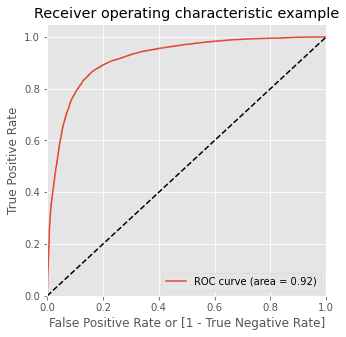

In [131]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

###  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [132]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.340531       0          0    1    1    1    1    0    0    0   
1      0    0.074412       1          0    1    0    0    0    0    0    0   
2      0    0.240095       2          0    1    1    1    0    0    0    0   
3      0    0.000178       3          0    1    0    0    0    0    0    0   
4      0    0.082347       4          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [133]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.713398  0.977990  0.448806
0.2   0.2  0.778316  0.955409  0.601222
0.3   0.3  0.816951  0.930654  0.703247
0.4   0.4  0.841421  0.901652  0.781190
0.5   0.5  0.852297  0.861878  0.842716
0.6   0.6  0.845512  0.802527  0.888498
0.7   0.7  0.823554  0.723134  0.923973
0.8   0.8  0.773033  0.591434  0.954633
0.9   0.9  0.693614  0.408255  0.978974


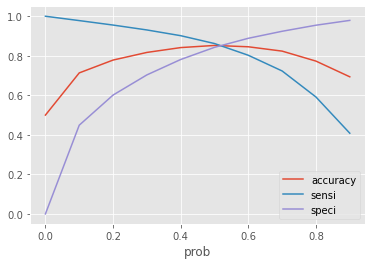

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [135]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.340531       0          0    1    1    1    1    0    0    0   
1      0    0.074412       1          0    1    0    0    0    0    0    0   
2      0    0.240095       2          0    1    1    1    0    0    0    0   
3      0    0.000178       3          0    1    0    0    0    0    0    0   
4      0    0.082347       4          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  
0    0    0    0     0     0     0     0     0     0     0     0     0  
1    0    0    0     0     0     0     0     0     0     0     0     0  
2    0    0    0     0     0     0     0     0     0     0     0     0  
3    0    0    0     0     0     0     0     0     0     0     0     0  
4    0    0    0     0     0     0     0     0     0     0     0     0

In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.50  0.50  0.852297  0.861878  0.842716
0.51  0.51  0.852141  0.856751  0.847532
0.52  0.52  0.851701  0.851624  0.851779
0.53  0.53  0.851468  0.846289  0.856647
0.54  0.54  0.851339  0.840437  0.862240
0.55  0.55  0.851235  0.835103  0.867368
0.56  0.56  0.850665  0.828681  0.872650
0.57  0.57  0.849060  0.821638  0.876482
0.58  0.58  0.848050  0.815216  0.880885
0.59  0.59  0.846807  0.808794  0.884821


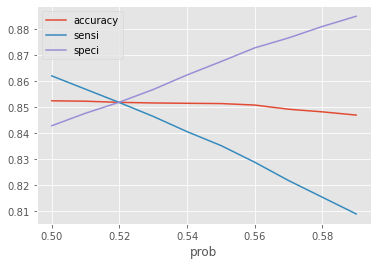

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.52



In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.52 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.340531       0          0    1    1    1    1    0    0    0   
1      0    0.074412       1          0    1    0    0    0    0    0    0   
2      0    0.240095       2          0    1    1    1    0    0    0    0   
3      0    0.000178       3          0    1    0    0    0    0    0    0   
4      0    0.082347       4          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  \
0    0    0    0     0     0     0     0     0     0     0     0     0   
1    0    0    0     0     0     0     0     0     0     0     0     0   
2    0    0    0     0     0     0     0     0     0     0     0     0   
3    0    0    0     0     0     0     0     0     0     0     0     0   
4    0    0    0     0     0     0     0     0     0     0     0     0   

   final_predicted  
0                0  
1                0  
2                0  
3                0  
4                0

In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8517012791962297

In [140]:
# Cheking the confusion2 matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[16447,  2862],
       [ 2865, 16444]], dtype=int64)

In [141]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8516235952146667
Specificity =  0.8517789631777928
False Positive Rate =  0.14822103682220725
Precision =  0.8517559307987155
True Negative Prediction Rate =  0.8516466445733223


## Precision and Recall

In [142]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

print("Precision = ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))


print("Recall = ",confusion[1,1]/(confusion[1,0]+confusion[1,1]))


from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)


Precision =  0.8456730524925047
Recall =  0.8618778807809829


0.8618778807809829

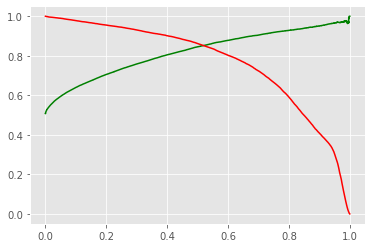

In [143]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [144]:
X_test = X_test[col]
X_test.head()

arpu_7  onnet_mou_7  offnet_mou_7  offnet_mou_8  roam_ic_mou_8  \
20296 -0.041915    -0.612952     -0.809034     -0.764384      -0.258306   
8279  -0.953951    -0.603791     -0.794472     -0.810700      -0.170621   
72269  0.468207    -0.080929      0.976237      1.325059      -0.258306   
65602 -0.182237    -0.470264     -0.230550     -0.270970      -0.258306   
42758 -0.415253     0.293059     -0.561838     -0.806512       0.632555   

       loc_og_mou_7  std_og_mou_8  og_others_8  loc_ic_mou_6  loc_ic_mou_8  \
20296     -0.751257     -0.555265      -0.2135     -0.596765     -0.671336   
8279      -0.764045     -0.563525      -0.2135     -0.755169     -0.817925   
72269      1.897265     -0.036783      -0.2135      0.857230      0.711977   
65602     -0.103727     -0.448598      -0.2135      0.255651     -0.155700   
42758     -0.399363     -0.548485      -0.2135      0.236176     -0.765729   

       std_ic_mou_8  spl_ic_mou_8  total_rech_num_8  last_day_rch_amt_8  \
20296     -0.446066     -0.280405         -0.687243            0.513023   
8279      -0.294030     -0.280405         -0.334532           -0.812621   
72269      0.090021     -0.280405         -0.216962            0.384141   
65602     -0.420584     -0.280405          1.546592           -0.536445   
42758     -0.490445     -0.280405         -0.922383           -0.812621   

       total_rech_data_7  total_rech_data_8  vol_2g_mb_7  vol_2g_mb_8  \
20296          -0.655522          -0.612663    -0.433921    -0.401038   
8279            2.596537           0.562021     0.669976     0.314711   
72269           0.067158          -0.612663    -0.433439    -0.401038   
65602          -0.655522          -0.612663    -0.433921    -0.401038   
42758          -0.294182          -0.612663     0.036503    -0.401038   

       arpu_2g_8  monthly_2g_8       aon  sep_vbc_3g  
20296  -0.433531     -0.384507 -0.559623   -0.218528  
8279   -0.207168     -0.384507 -0.492123   -0.218528  
72269  -0.433531     -0.384507 -1.021579   -0.218528  
65602  -0.433531     -0.384507  0.015184   -0.218528  
42758  -0.433531     -0.384507  0.386436   -0.218528

In [145]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [146]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

20296    0.615583
8279     0.530973
72269    0.109911
65602    0.319719
42758    0.854314
80210    0.070525
67925    0.158568
25034    0.101574
10422    0.061005
43140    0.277754
dtype: float64

In [147]:
# convert all to a dataframe
y_pred_final = pd.DataFrame({'CustID':y_test.index, 'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_pred_final.head()

CustID  Churn  Churn_Prob
20296   20296      1    0.615583
8279     8279      1    0.530973
72269   72269      0    0.109911
65602   65602      0    0.319719
42758   42758      1    0.854314

In [148]:
# reset index
y_pred_final.reset_index(drop=True, inplace=True)
y_pred_final.head()

CustID  Churn  Churn_Prob
0   20296      1    0.615583
1    8279      1    0.530973
2   72269      0    0.109911
3   65602      0    0.319719
4   42758      1    0.854314

In [149]:
# final predition of test data
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.52 else 0)
y_pred_final.head()

CustID  Churn  Churn_Prob  final_predicted
0   20296      1    0.615583                1
1    8279      1    0.530973                1
2   72269      0    0.109911                0
3   65602      0    0.319719                0
4   42758      1    0.854314                1

In [150]:
# Checking the overall accuracy of the predicted set.
print("Accuracy:",metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted))

# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted)
print("\nConfusion Matrix\n",confusion2_test)

Accuracy: 0.8597933562937451

Confusion Matrix
 [[7132 1119]
 [ 143  607]]


In [151]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8093333333333333
Specificity =  0.864380075142407
False Positive Rate =  0.13561992485759303
Precision =  0.35168018539976825
True Negative Prediction Rate =  0.9803436426116838


#### Explaining the results

In [152]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted),2)*100,"%")
print("The Sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a senstivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  86.0 %
The Sensitivity of the predicted model is:  81.0 %

As the model created is based on a senstivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



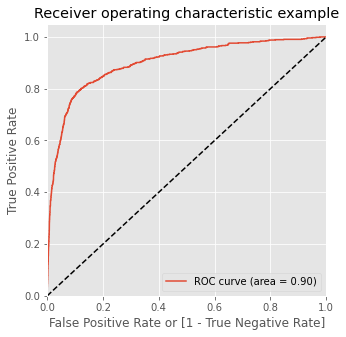

In [153]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Churn,y_pred_final.Churn_Prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.Churn,y_pred_final.Churn_Prob)

The AUC score for train dataset is 0.92 and the test dataset is 0.90.
This model can be considered as a good model.

In [154]:
res.params.sort_values(ascending=False)

og_others_8           0.744049
loc_ic_mou_6          0.537849
offnet_mou_7          0.533140
arpu_7                0.471075
roam_ic_mou_8         0.212612
onnet_mou_7           0.179757
total_rech_data_7     0.135233
vol_2g_mb_7           0.108768
std_ic_mou_8         -0.217846
aon                  -0.331966
arpu_2g_8            -0.404292
total_rech_num_8     -0.406092
std_og_mou_8         -0.424899
loc_og_mou_7         -0.489846
last_day_rch_amt_8   -0.502276
vol_2g_mb_8          -0.517357
spl_ic_mou_8         -0.523944
offnet_mou_8         -0.527473
monthly_2g_8         -0.527998
total_rech_data_8    -0.573305
sep_vbc_3g           -1.078710
loc_ic_mou_8         -1.460676
const                -1.909054
dtype: float64

In [155]:
coef_column = res.params.sort_values(ascending=False).index
coef_data = res.params.sort_values(ascending=False).values

In [156]:
coef_df = pd.DataFrame(data=coef_data, index=coef_column)
coef_df.index.names=['Features']
coef_df.rename(columns={0:'Coefficients'}, inplace=True)
coef_df

Coefficients
Features                        
og_others_8             0.744049
loc_ic_mou_6            0.537849
offnet_mou_7            0.533140
arpu_7                  0.471075
roam_ic_mou_8           0.212612
onnet_mou_7             0.179757
total_rech_data_7       0.135233
vol_2g_mb_7             0.108768
std_ic_mou_8           -0.217846
aon                    -0.331966
arpu_2g_8              -0.404292
total_rech_num_8       -0.406092
std_og_mou_8           -0.424899
loc_og_mou_7           -0.489846
last_day_rch_amt_8     -0.502276
vol_2g_mb_8            -0.517357
spl_ic_mou_8           -0.523944
offnet_mou_8           -0.527473
monthly_2g_8           -0.527998
total_rech_data_8      -0.573305
sep_vbc_3g             -1.078710
loc_ic_mou_8           -1.460676
const                  -1.909054

### 6.2 Apply PCA & Predict Churn

### Model 1 : Logistic Regression using PCA

In [157]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset with MinMaxScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_col = X_train.columns
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train.shape)
print("Dimension of y_train_sm Shape:", y_train.shape)

X_train = pd.DataFrame(data=X_train, columns=num_col)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.head()

Dimension of X_train: (21000, 108)
Dimension of X_test: (9001, 108)
Dimension of X_train_sm Shape: (38582, 108)
Dimension of y_train_sm Shape: (38582,)
X_train.shape: (38582, 108)
y_train.shape: (38582,)


arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.236248  0.379007  0.276889     0.189024     0.337259     0.250770   
1  0.289922  0.200051  0.352981     0.111263     0.090810     0.075304   
2  0.050459  0.077292  0.026799     0.000000     0.000413     0.000000   
3  0.070261  0.072625  0.065110     0.000000     0.000000     0.000000   
4  0.248438  0.245060  0.067219     0.074656     0.056318     0.002473   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0      0.044181      0.089299      0.066644            0.0       0.000000   
1      0.060902      0.043341      0.055122            0.0       0.000000   
2      0.005107      0.023493      0.018654            0.0       0.000000   
3      0.000284      0.001373      0.000000            0.0       0.000000   
4      0.036069      0.023502      0.018116            0.0       0.131534   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
0        0.00000       0.034218       0.000000       0.000000      0.055127   
1        0.00000       0.000000       0.000000       0.000000      0.212647   
2        0.00000       0.000000       0.000000       0.000000      0.004394   
3        0.00000       0.000000       0.000000       0.000000      0.000369   
4        0.16294       0.000000       0.079528       0.105566      0.023083   

   loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
0      0.099050      0.090606      0.138880      0.274225      0.193850   
1      0.168639      0.159393      0.000259      0.003497      0.005276   
2      0.026524      0.004661      0.000000      0.000000      0.000000   
3      0.000000      0.000000      0.000000      0.000000      0.000000   
4      0.010659      0.000000      0.068802      0.044429      0.000000   

   isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
0           0.0           0.0           0.0      0.258036      0.242536   
1           0.0           0.0           0.0      0.008036      0.070498   
2           0.0           0.0           0.0      0.068089      0.259634   
3           0.0           0.0           0.0      0.000000      0.043535   
4           0.0           0.0           0.0      0.210842      0.000000   

   spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
0      0.541578     0.852643          0.0          0.0        0.158055   
1      0.078074     0.203600          0.0          0.0        0.120008   
2      0.510518     0.000000          0.0          0.0        0.003921   
3      0.000000     0.000000          0.0          0.0        0.000207   
4      0.000000     0.000000          0.0          0.0        0.076538   

   total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0        0.297590        0.225442      0.093760      0.112167      0.150267   
1        0.094433        0.088574      0.329894      0.329677      0.346442   
2        0.020134        0.013637      0.074270      0.078791      0.014188   
3        0.001009        0.000000      0.023900      0.013914      0.019732   
4        0.044435        0.000000      0.043546      0.045402      0.000000   

   std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
0      0.234356      0.208737      0.261601        0.153444        0.162334   
1      0.003858      0.010453      0.000000        0.281341        0.278870   
2      0.000000      0.000169      0.000000        0.063064        0.065993   
3      0.020554      0.000439      0.000000        0.026774        0.011774   
4      0.047526      0.048853      0.000000        0.053652        0.054363   

   total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
0        0.208356           0.0      0.000000           0.0           0.0   
1        0.291876           0.0      0.000000           0.0           0.0   
2        0.011953           0.0      0.408163           0.0           0.0   
3        0.016623

In [158]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train)

PCA(random_state=42)

In [159]:
X_train_pca=pca.fit_transform(X_train)
print("Dimension of X_train_sm_pca: ",X_train_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38582, 108)
Dimension of X_test_pca:  (9001, 108)


In [160]:
#Viewing the PCA components
pca.components_

array([[-4.34447130e-02, -3.14216004e-02,  7.73151629e-03, ...,
         1.74143832e-01,  1.40215738e-01,  1.07023015e-01],
       [ 1.65605567e-01,  2.35827208e-01,  2.51672143e-01, ...,
         8.18427896e-02,  8.96704722e-02,  8.61404490e-02],
       [ 1.96783866e-01,  8.61228897e-03, -9.13409257e-02, ...,
         4.44959503e-02,  9.71792670e-03, -1.53096392e-02],
       ...,
       [-4.54572333e-04, -4.83246274e-03,  1.51425700e-03, ...,
         6.42712300e-01,  1.00000081e-01,  6.38274947e-03],
       [-2.55509889e-03,  6.40739962e-03, -7.04688740e-04, ...,
        -4.65074859e-01, -4.86599939e-02, -2.28027170e-03],
       [-1.15185299e-03,  1.43850792e-03, -1.63052212e-03, ...,
        -1.06318579e-01,  7.99219375e-01, -1.80090164e-03]])

Performing Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train)

# making the predictions
y_test_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
print("Dimension of y_pred_df:", y_test_pred_df.shape)

Dimension of y_pred_df: (9001, 1)


In [162]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_test_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_test_pred))

Confusion Matirx for y_test & y_pred
 [[6994 1275]
 [ 125  607]] 

Accuracy of the logistic regression model with PCA:  0.8444617264748361


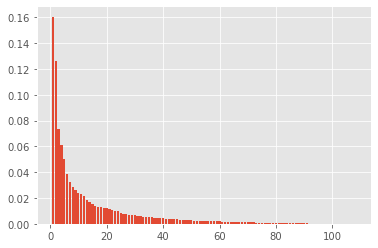

In [163]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

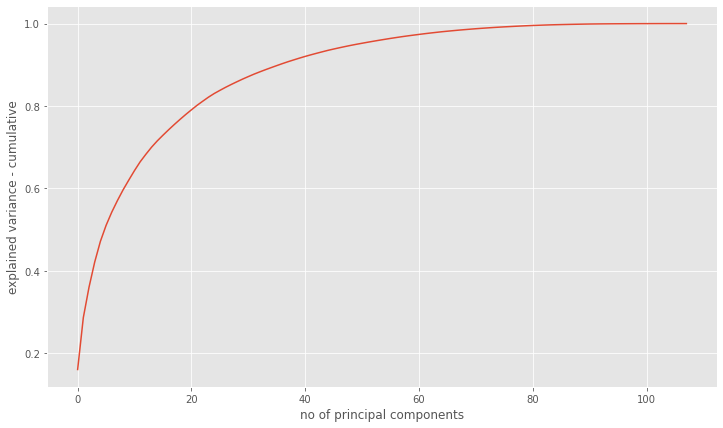

In [164]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [165]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([16. , 28.6, 36. , 42.1, 47.1, 51. , 54.2, 57. , 59.6, 62. , 64.3,
       66.4, 68.2, 69.9, 71.4, 72.8, 74.1, 75.4, 76.6, 77.8, 78.9, 80. ,
       81. , 82. , 82.9, 83.7, 84.4, 85.1, 85.8, 86.4, 87. , 87.6, 88.1,
       88.6, 89.1, 89.6, 90.1, 90.6, 91. , 91.4, 91.8, 92.2, 92.6, 93. ,
       93.4, 93.7, 94. , 94.3, 94.6, 94.9, 95.2, 95.4, 95.6, 95.8, 96. ,
       96.2, 96.4, 96.6, 96.8, 97. , 97.2, 97.4, 97.6, 97.8, 98. , 98.1,
       98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2,
       99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8])

In [166]:
lg_pca_80 = PCA(n_components=80)

lg_train_pca_80 = lg_pca_80.fit_transform(X_train)
print("Dimension for Train dataset using PCA: ", lg_train_pca_80.shape)

lg_test_pca_80 = lg_pca_80.transform(X_test)
print("Dimension for Test dataset using PCA: ", lg_test_pca_80.shape)

Dimension for Train dataset using PCA:  (38582, 80)
Dimension for Test dataset using PCA:  (9001, 80)


In [167]:
logreg_pca_80 = LogisticRegression()
logreg_pca_80.fit(lg_train_pca_80, y_train)

# making the predictions
y_test_lg_pred_80 = logreg_pca_80.predict(lg_test_pca_80)

# converting the prediction into a dataframe
y_test_lg_pred_df_80 = pd.DataFrame(y_test_lg_pred_80)
print("Dimension of y_test_pred_df_80: ", y_test_lg_pred_df_80.shape)

Dimension of y_test_pred_df_80:  (9001, 1)


In [168]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_test_lg_pred_80),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_test_lg_pred_80))

# Checking the Precision, Recall, F1_score and AUC
print("Precision of the logistic regression model with PCA: ", precision_score(y_test,y_test_lg_pred_80))
print("Recall of the logistic regression model with PCA: ", recall_score(y_test,y_test_lg_pred_80))
print("F1 Score of the logistic regression model with PCA: ", f1_score(y_test,y_test_lg_pred_80))
print("AUC of the logistic regression model with PCA: ", roc_auc_score(y_test, logreg_pca_80.predict_proba(lg_test_pca_80)[:, 1]))

Confusion Matirx for y_test & y_pred
 [[6989 1280]
 [ 124  608]] 

Accuracy of the logistic regression model with PCA:  0.8440173314076214
Precision of the logistic regression model with PCA:  0.3220338983050847
Recall of the logistic regression model with PCA:  0.8306010928961749
F1 Score of the logistic regression model with PCA:  0.46412213740458014
AUC of the logistic regression model with PCA:  0.9097134798678587


In [169]:
# metrics data
accuracy = accuracy_score(y_test,y_test_lg_pred_80)
precision = precision_score(y_test,y_test_lg_pred_80)
recall = recall_score(y_test,y_test_lg_pred_80)
f1 = f1_score(y_test,y_test_lg_pred_80)
auc = roc_auc_score(y_test, logreg_pca_80.predict_proba(lg_test_pca_80)[:, 1])

metrics_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'AUC', 'F1']
metrics_data = [['Logistic Regressin(PCA)', accuracy, precision, recall, auc, f1]]

metrics_df = pd.DataFrame(data=metrics_data, columns=metrics_cols)
metrics_df


Model  Accuracy  Precision    Recall       AUC        F1
0  Logistic Regressin(PCA)  0.844017   0.322034  0.830601  0.909713  0.464122

Logistic Regression with PCA gives us an Accuracy of 84.38%

### Model 2: XGBoost Model

In [170]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

Fitting the dataset with the 80 explainable components

In [171]:
pca_80 = PCA(n_components=80)

train_pca_80 = pca_80.fit_transform(X_train)
print("Dimension for Train dataset using PCA: ", train_pca_80.shape)

test_pca_80 = pca_80.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_80.shape)

Dimension for Train dataset using PCA:  (38582, 80)
Dimension for Test dataset using PCA:  (9001, 80)


In [172]:
# fit model on training data with default hyperparameters
clf_xgb = XGBClassifier(random_state=42)
clf_xgb.fit(train_pca_80, y_train)

[00:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [173]:
# evaluate predictions
y_test_pred = clf_xgb.predict(test_pca_80)

In [174]:
def print_model_metrics(y_test,y_pred,model_name):
    cp = confusion_matrix(y_test,y_pred)
    print(cp)
    
    accuracy = round(accuracy_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    precision = round(precision_score(y_test,y_pred),2)
#     auc = round(roc_auc_score(y_test,y_pred),2)
    f1 = round(f1_score(y_test,y_pred),2)
    
    data = [[model_name,accuracy,recall,precision,f1]] 
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','F1'])
    return df

In [175]:
print_model_metrics(y_test, y_test_pred, 'XGBoost(Default)')

[[7799  470]
 [ 299  433]]


Model  Accuracy  Precision  Recall    F1
0  XGBoost(Default)      0.91       0.59    0.48  0.53

In [176]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=clf_xgb.predict_proba(test_pca_80)[:, 1]))

AUC on test data by XGBoost = 0.8793862388128153


In [177]:
# metrics data
accuracy = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
auc = roc_auc_score(y_test, clf_xgb.predict_proba(test_pca_80)[:, 1])

metrics_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'AUC', 'F1']
metrics_data = [['XGBoost(Default)', accuracy, precision, recall, auc, f1]]

xgb_df1= pd.DataFrame(data=metrics_data, columns=metrics_cols)
metrics_df = metrics_df.append(xgb_df1,ignore_index=True)
metrics_df

Model  Accuracy  Precision    Recall       AUC        F1
0  Logistic Regressin(PCA)  0.844017   0.322034  0.830601  0.909713  0.464122
1         XGBoost(Default)  0.914565   0.479513  0.591530  0.879386  0.529664

#### Hyperparameter Tuning in XGBoost

Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

In [178]:
# libraries
from sklearn.model_selection import GridSearchCV

In [179]:
# function for getting optimum hyperparameter tuning 
def tune_hyperparameter(parameters,X_train,y_train,n_folds = 5):
    
    xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1)
    
    xgb_model_cv = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=5,
                                       scoring='accuracy',
                                       verbose=1,
                                       refit=True)

#     rf = GridSearchCV(rf, parameters, cv=n_folds,n_jobs = -1, scoring="accuracy",return_train_score=True)
#     rf.fit(x_train, y_train)
    xgb_model_cv.fit(X_train, y_train)
    scores = xgb_model_cv.cv_results_

    for key in parameters.keys():
        hyperparameters = key
        break

    # plotting accuracies for parameters
    plt.figure(figsize=(16,5))
    # plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[00:37:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


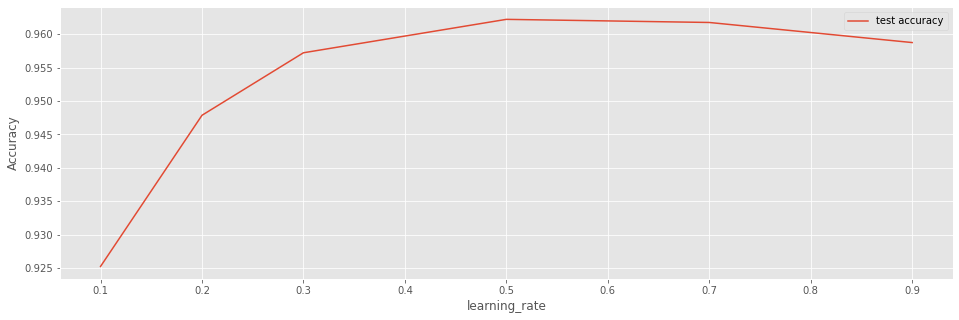

In [180]:
# fit the model with learning_rate parameters
parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]}
tune_hyperparameter(parameters,train_pca_80,y_train)

From the above fig, we can see that from 0.5 to 0.7 there is a pretty good hike in accuracy. So let us take 0.6 for our final model

In [181]:
learning_rate = 0.6

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[00:41:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


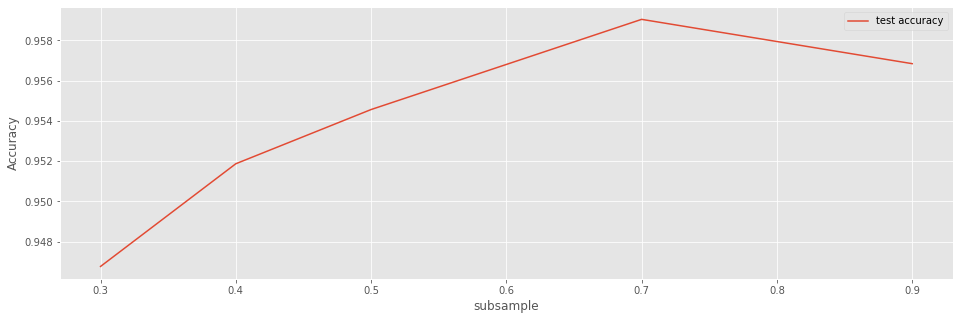

In [182]:
# fit the model with subsample parameters
parameters = {'subsample': [0.3, 0.4, 0.5, 0.7, 0.9]}
tune_hyperparameter(parameters,train_pca_80,y_train)

From the above fig, we can see that from 0.4 to 0.5 there is a pretty good hike in accuracy. So let us take 0.5 for our final model

In [183]:
subsample = 0.5

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[00:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


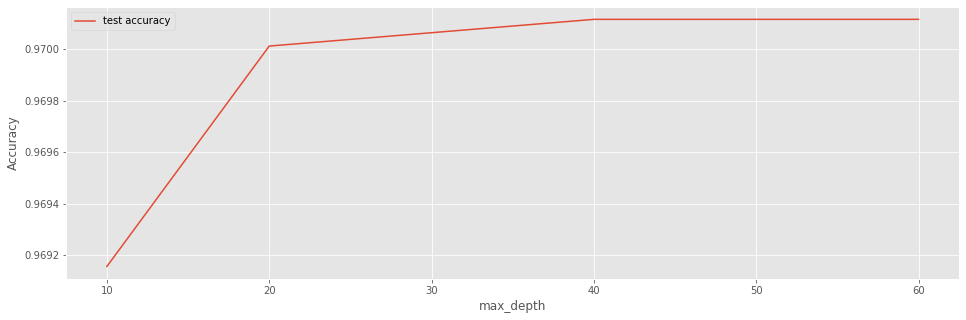

In [184]:
# fit the model with max_depth parameters
parameters = {'max_depth': [10, 20, 40, 60]}
tune_hyperparameter(parameters,train_pca_80,y_train)

From the above fig, we can see that from 40 there is a pretty good trend in accuracy. So let us take 40 for our final model

In [185]:
max_depth = 40

### Optimum Hyperparameter Tuned model

In [186]:
xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1)

# optimum for best hyperparameters
parameters = {'learning_rate': [learning_rate],
              'subsample': [subsample],
              'max_depth': [max_depth]}

xgb_model_cv = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=5,
                                       scoring='accuracy',
                                       verbose=1,
                                       refit=True)

xgb_model_cv.fit(train_pca_80, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[00:54:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=Non

In [187]:
print(xgb_model_cv.best_params_)
print(xgb_model_cv.best_score_)
print(xgb_model_cv.best_estimator_)

{'learning_rate': 0.6, 'max_depth': 40, 'subsample': 0.5}
0.964050674680052
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=40, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [188]:
final_xgb_model = xgb_model_cv.best_estimator_
y_test_pred_80 = final_xgb_model.predict(test_pca_80)

In [189]:
# optimum hyperparametered XGBoost
print_model_metrics(y_test, y_test_pred_80, 'XGBoost(Tuned)')

[[7889  380]
 [ 341  391]]


Model  Accuracy  Precision  Recall    F1
0  XGBoost(Tuned)      0.92       0.53    0.51  0.52

In [190]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=final_xgb_model.predict_proba(train_pca_80)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_xgb_model.predict_proba(test_pca_80)[:, 1]))

AUC on train data by XGBoost = 1.0
AUC on test data by XGBoost = 0.8775943728204691


In [191]:
# Checking the Confusion matrix
print("Confusion Matirx of XGBoost model with PCA:\n",confusion_matrix(y_test,y_test_pred_80),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the XGBoost model with PCA: ",accuracy_score(y_test,y_test_pred_80))

Confusion Matirx of XGBoost model with PCA:
 [[7889  380]
 [ 341  391]] 

Accuracy of the XGBoost model with PCA:  0.9198977891345406


In [192]:
# metrics data
accuracy = accuracy_score(y_test,y_test_pred_80)
precision = precision_score(y_test,y_test_pred_80)
recall = recall_score(y_test,y_test_pred_80)
f1 = f1_score(y_test,y_test_pred_80)
auc = roc_auc_score(y_test, final_xgb_model.predict_proba(test_pca_80)[:, 1])

metrics_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'AUC', 'F1']
metrics_data = [['XGBoost(Tuned)', accuracy, precision, recall, auc, f1]]

xgb_df2= pd.DataFrame(data=metrics_data, columns=metrics_cols)
metrics_df = metrics_df.append(xgb_df2,ignore_index=True)
metrics_df

Model  Accuracy  Precision    Recall       AUC        F1
0  Logistic Regressin(PCA)  0.844017   0.322034  0.830601  0.909713  0.464122
1         XGBoost(Default)  0.914565   0.479513  0.591530  0.879386  0.529664
2           XGBoost(Tuned)  0.919898   0.507134  0.534153  0.877594  0.520293

From the above results we can see that for XGBoost with Hyperparameter tuned. We got Accuracy of 91.4%. This could be considered as best model.

####  Model 3  -  Random Forest with PCA

In [193]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [194]:
%%time
rf.fit(X_train_pca, y_train)

Wall time: 742 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [195]:
rf.oob_score_

0.7256751853195791

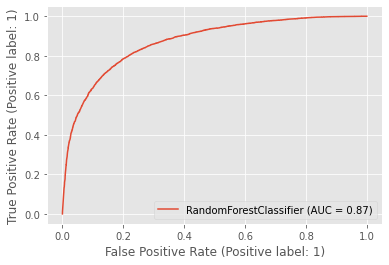

In [196]:
plot_roc_curve(rf, X_train_pca, y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [197]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [198]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [199]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [200]:
%%time
grid_search.fit(X_train_pca, y_train)


Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 9min 45s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [201]:
grid_search.best_score_

0.9499766729255564

In [202]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

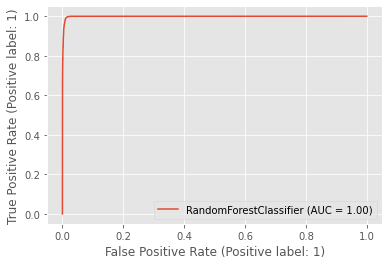

In [203]:
plot_roc_curve(rf_best, X_train_pca, y_train)
plt.show()

Area under curve is 1

In [204]:
rf_best.feature_importances_

array([0.03268217, 0.07140968, 0.11300866, 0.02803038, 0.01932205,
       0.01311334, 0.01866166, 0.02797662, 0.03834089, 0.01547196,
       0.02492859, 0.00650301, 0.0070599 , 0.00743322, 0.00631704,
       0.00672922, 0.00568376, 0.0092571 , 0.01150493, 0.00754369,
       0.01081474, 0.00968624, 0.00505187, 0.00621875, 0.00993984,
       0.00860535, 0.00839857, 0.00512701, 0.00657899, 0.00804252,
       0.00589733, 0.00814461, 0.00937001, 0.00682123, 0.01229973,
       0.00530156, 0.01007641, 0.00493772, 0.00831172, 0.00574142,
       0.00490531, 0.00558178, 0.00526243, 0.00503819, 0.00619884,
       0.00558058, 0.00652017, 0.00801896, 0.00540652, 0.00566002,
       0.00613615, 0.00533367, 0.00396673, 0.00482854, 0.00439468,
       0.00504706, 0.00558449, 0.00491778, 0.00492369, 0.00423243,
       0.00507644, 0.00544381, 0.00406719, 0.00423273, 0.00491845,
       0.00477269, 0.00430996, 0.00425221, 0.00516059, 0.00443634,
       0.00446861, 0.00376094, 0.00361806, 0.0039576 , 0.00446

#### Making Predictions

In [205]:
rf.fit(X_train_pca,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [206]:
y_train_pred = rf.predict(X_train_pca)

In [207]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19291
           1       1.00      1.00      1.00     19291

    accuracy                           1.00     38582
   macro avg       1.00      1.00      1.00     38582
weighted avg       1.00      1.00      1.00     38582



In [208]:
print(accuracy_score(y_train,y_train_pred))

1.0


#### Predicions on Test data

In [209]:
y_test_pred = rf.predict(X_test_pca)

In [210]:
auc = roc_auc_score(y_test, rf.predict_proba(X_test_pca)[:, 1])
auc

0.8935093677287017

In [211]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8269
           1       0.54      0.46      0.50       732

    accuracy                           0.92      9001
   macro avg       0.75      0.71      0.73      9001
weighted avg       0.92      0.92      0.92      9001



In [212]:
print(accuracy_score(y_test,y_test_pred))

0.9241195422730808


In [213]:
# metrics data
accuracy = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
auc = roc_auc_score(y_test, rf.predict_proba(X_test_pca)[:, 1])

metrics_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'AUC', 'F1']
metrics_data = [['Random Forest', accuracy, precision, recall, auc, f1]]

rf_pca = pd.DataFrame(data=metrics_data, columns=metrics_cols)

metrics_df = metrics_df.append(rf_pca,ignore_index=True)
metrics_df

Model  Accuracy  Precision    Recall       AUC        F1
0  Logistic Regressin(PCA)  0.844017   0.322034  0.830601  0.909713  0.464122
1         XGBoost(Default)  0.914565   0.479513  0.591530  0.879386  0.529664
2           XGBoost(Tuned)  0.919898   0.507134  0.534153  0.877594  0.520293
3            Random Forest  0.924120   0.539200  0.460383  0.893509  0.496684

## Recommendations

 ###  Best Model
 - On comparing the 4 models with PCA & without PCA, 'Random Forest' can be considered the best model in terms of accuracy,Precision,Recall,auc and F1 metrics

### Suggestions :

#### Top Best Predictors for Telecom Chun Model are:
- Top features that predict the churn of the High valued customers are:
    1. og_others_8
    2. loc_ic_mou_6
    3. offnet_mou_7
    4. arpu_7 
    5. roam_ic_mou_8
    6. onnet_mou_7 
    7. total_rech_data_7 
    8. vol_2g_mb_7
    
- Features need Focus to predict churn are:
    1. std_ic_mou_8
    2. aon        
    3. arpu_2g_8
    4. total_rech_num_8 
    5. std_og_mou_8 
    6. loc_og_mou_7
    7. last_day_rch_amt_8 
    8. vol_2g_mb_8  
    9. spl_ic_mou_8 
    10. offnet_mou_8 
    11. monthly_2g_8
    12. total_rech_data_8 
    13. sep_vbc_3g    
    14. loc_ic_mou_8 

- To reduce the telecom churn rate, telecom company has to closely monitor the customers good period phase ie, 6 & 7th month  outgoing calls, minutes of usage, offnet,onnet,total internet usage and provide those customers with 3 or 6 months outgoing calls & internet packages at special discount rate to avoid churn.

- Aug/8 month has the declining incoming,outgoing & data reachr amounts and hence its late to predict churn & its advisible to to monitor/predict churn by end of good phase or 7th month.

- It is highly recommended to revise local,std,roaming,ISD,other,2g & 3g data charges periodically to avoid churn. 

- Gather monthly feedback & Suggestions to improve the network quality, services and data.

- To attract customers introduce 3 or 6 months offers with free talk time minutes, free internet in the night or in the weekends
 

#                                                   Thank You


Gayathri. M & T.Karan Sai